<a href="https://colab.research.google.com/github/MQasim-Zafar/Research-Project-Influencer-Sentiment-Analysis/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Setup

In [ ]:
!pip install emoji
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import emoji
import seaborn as sns
from sklearn.metrics import mean_squared_error , mean_absolute_error, mean_absolute_percentage_error, r2_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set consistent plotting style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)
line_width = 2
bar_width = 0.2
colors = ['skyblue', 'lightgreen', 'salmon']

# Global config: Models and Metrics
MODELS = ["RoBERTa", "DistilBERT", "VADER"]
METRICS_LABEL = ["Accuracy", "Precision", "Recall", "F1 Score"]
METRICS_SCORE = ["MAD", "MAE", "MSE", "RMSE"]

print("Environment setup complete.")


#Data Cleaning and Preperation

In [ ]:
sampled_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Analysis/Sampled QUestionnaire Comments.csv")
responses_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Analysis/Questionnaire Responses.csv")

In [ ]:
#Normalizing VADER scores
def normalize(score, alpha=15):
    """
    Normalize the score to be between -1 and 1 using an alpha that
    approximates the max expected value
    """
    norm_score = score / math.sqrt((score * score) + alpha)
    if norm_score < -1.0:
        return -1.0
    elif norm_score > 1.0:
        return 1.0
    else:
        return norm_score

# Apply the normalize function to the 'VADER_Score_emoji' column in sampled_df
sampled_df['norm_VADER_Score_emoji'] = sampled_df['VADER_Score_emoji'].apply(normalize)

In [ ]:
#Cocenating sampled_df and responses_df to make survey_df
survey_df = sampled_df.merge(responses_df[['response_polarity', 'response_score']], left_index=True, right_index=True)

In [ ]:
# Normalize response_score column
min_score = survey_df['response_score'].min()
max_score = survey_df['response_score'].max()
survey_df['response_score'] = (survey_df['response_score'] - min_score) / (max_score - min_score)



In [ ]:
# Multiply response_score by -1 if response_polarity is Negative
survey_df['response_score'] = np.where(survey_df['response_polarity'] == 'Negative', survey_df['response_score'] * -1, survey_df['response_score'])

# Filter the DataFrame for rows where 'response_polarity' is negative
negative_responses = survey_df[survey_df['response_polarity'] == 'Negative']

# Print the filtered DataFrame
negative_responses.head()

Unnamed: 0                                            Comment Unnamed: 2  \
8            9  😢😢why i'm focus with the way you wear your wat...        NaN   
12          13                                     my struggle..😢        NaN   
14          15          takes longer for pizza with new drivers 😂        NaN   
18          19                    why windows wallpaper on macos😂        NaN   
25          26  two changes. higher price. charger disappearan...        NaN   

           Brand                                        Simple_Text  \
8   unboxtherapy     why I'm focus with the way you wear your watch   
12         mkbhd                                      My struggle..   
14   techunicorn           Takes longer for pizza with new drivers    
18         mkbhd                     Why windows wallpaper on macos   
25    techsmartt  Two changes. Higher price. Charger disappearan...   

    Emoji_Count                                          Prep_Text Bert_Label  \
8             4     why i'm focus with the way you wear your watch   POSITIVE   
12            1                                      my struggle..   NEGATIVE   
14            1           takes longer for pizza with new drivers    NEGATIVE   
18            1                     why windows wallpaper on macos   NEGATIVE   
25            1  two changes. higher price. charger disappearan...   POSITIVE   

    Bert_Score Simple_Bert_Label  ...  roberta_Score Simple_roBerta_Label  \
8     0.998204          POSITIVE  ...       0.481507              neutral   
12   -0.983770          NEGATIVE  ...      -0.814429              neutral   
14   -0.997453          NEGATIVE  ...       0.675398              neutral   
18   -0.969421          NEGATIVE  ...      -0.484131              neutral   
25    0.999547          POSITIVE  ...       0.953155             positive   

    Simple_roBerta_Score VADER_compound  VADER_Score_emoji  VADER_sentiment  \
8               0.848611         0.0000              0.028          neutral   
12              0.477354        -0.3182             -1.293         negative   
14              0.721459         0.0000              0.221          neutral   
18              0.579704         0.0000              0.221          neutral   
25              0.904118         0.6588              4.042         positive   

    VADER_sentiment_emoji norm_VADER_Score_emoji response_polarity  \
8                positive               0.007229          Negative   
12               negative              -0.316670          Negative   
14               positive               0.056969          Negative   
18               positive               0.056969          Negative   
25               positive               0.722042          Negative   

    response_score  
8        -0.666667  
12       -0.666667  
14       -0.666667  
18       -0.666667  
25       -1.000000  

[5 rows x 22 columns]

In [ ]:
# Rename columns in survey_df
survey_df = survey_df.rename(columns={
    'response_score': 'Survey Responses Scores',

    'norm_VADER_Score_emoji': 'VADER Scores with Emojis',
    'Bert_Score': 'BERT Scores with Emojis',
    'roberta_Score': 'RoBERTa Scores with Emojis',

    'VADER_compound': 'VADER Scores without Emojis',
    'Simple_Bert_Score': 'BERT Scores without Emojis',
    'Simple_roBerta_Score': 'RoBERTa Scores without Emojis',

    'response_polarity': 'Survey Responses Labels',

    'VADER_sentiment_emoji': 'VADER Labels with Emojis',
    'Bert_Label': 'BERT Labels with Emojis',
    'roberta_Label': 'RoBERTa Labels with Emojis',

    'VADER_sentiment': 'VADER Labels without Emojis',
    'Simple_Bert_Label': 'BERT Labels without Emojis',
    'Simple_roBerta_Label': 'RoBERTa Labels without Emojis'

})

survey_df.columns

Index(['Unnamed: 0', 'Comment', 'Unnamed: 2', 'Brand', 'Simple_Text',
       'Emoji_Count', 'Prep_Text', 'BERT Labels with Emojis',
       'BERT Scores with Emojis', 'BERT Labels without Emojis',
       'BERT Scores without Emojis', 'RoBERTa Labels with Emojis',
       'RoBERTa Scores with Emojis', 'RoBERTa Labels without Emojis',
       'RoBERTa Scores without Emojis', 'VADER Scores without Emojis',
       'VADER_Score_emoji', 'VADER Labels without Emojis',
       'VADER Labels with Emojis', 'VADER Scores with Emojis',
       'Survey Responses Labels', 'Survey Responses Scores'],
      dtype='object')

In [ ]:
#survey_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Final Analysis/survey_df.csv', index=False)

# Survey results Analysis


## Brand counts

It's important to ensure that there is a relatively equal distribuition of influncers in the sampled dataframe to ensure conformity in results

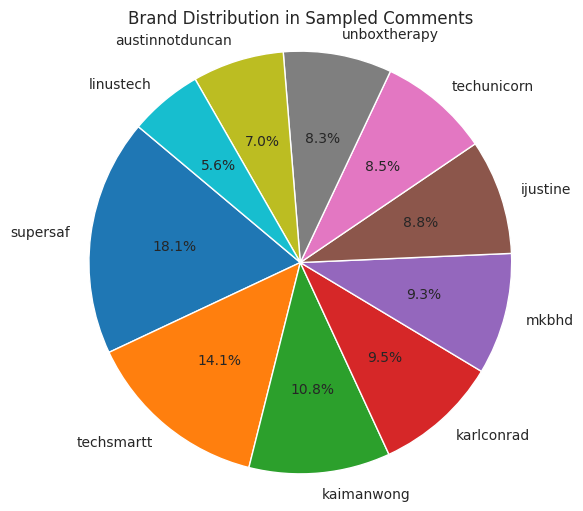

In [ ]:
# Count the occurrences of each brand
brand_counts = survey_df['Brand'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand Distribution in Sampled Comments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Histograms

Comparing survey results with model performance using histograms, first with Emojis included and then without.

With Emojis

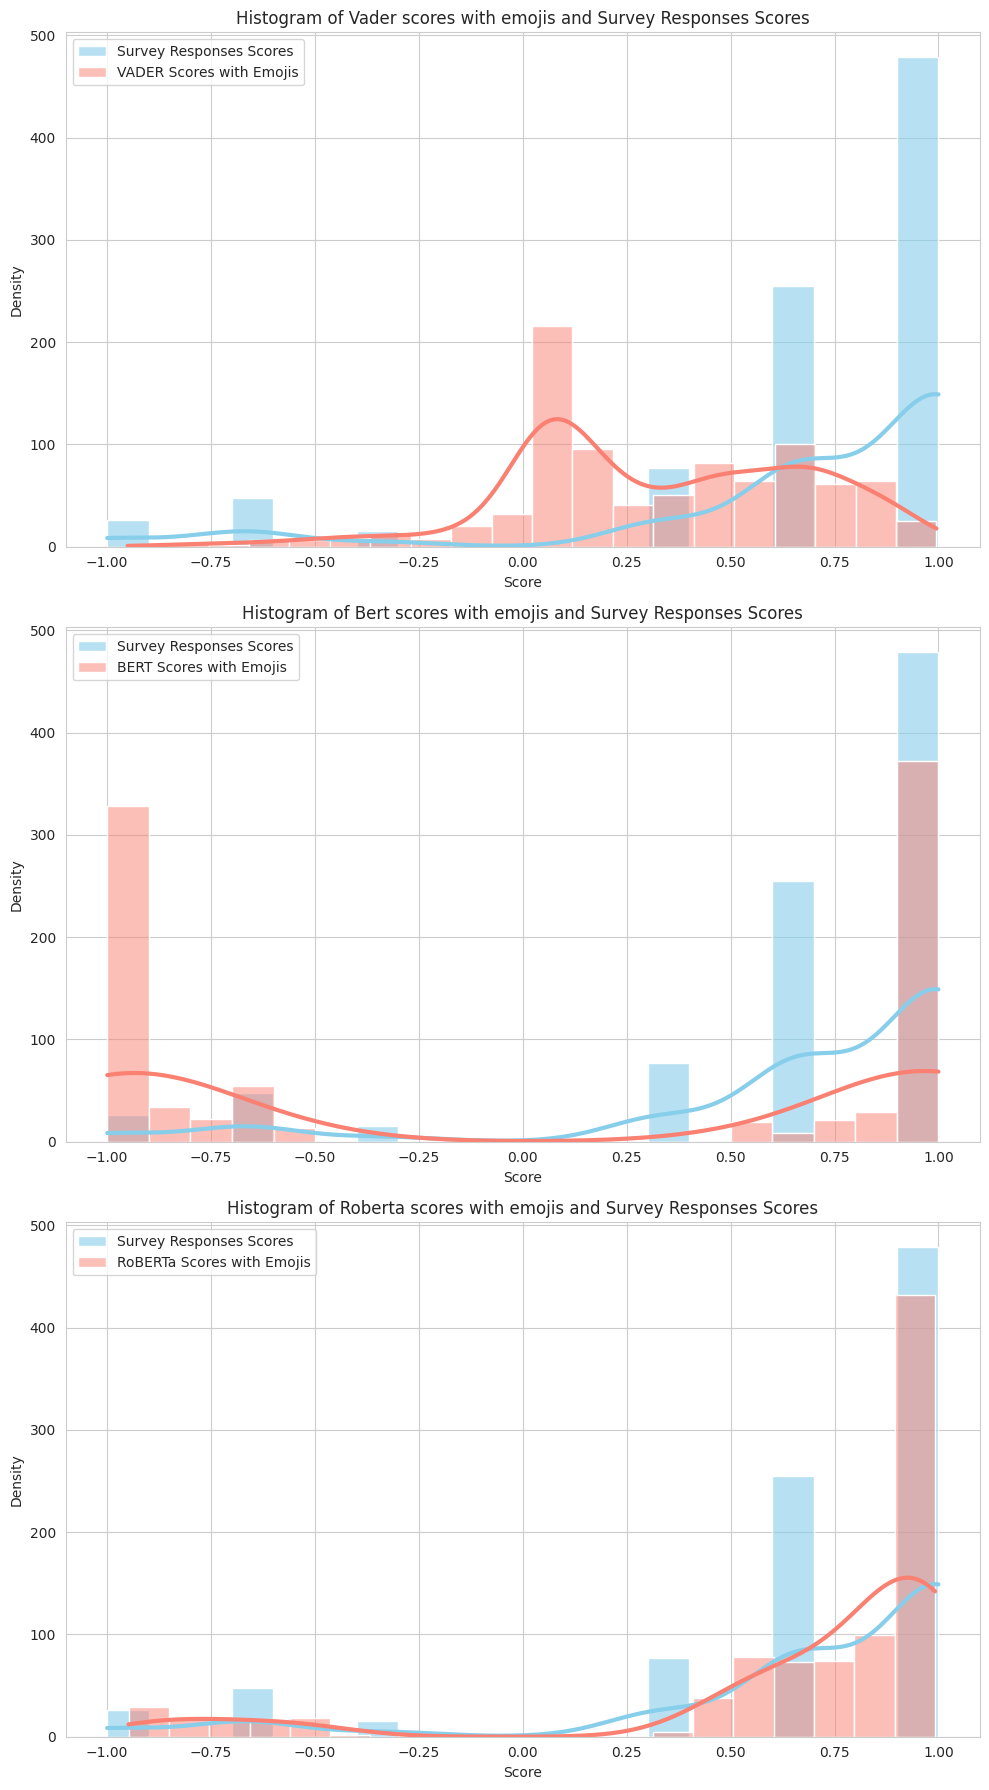

In [ ]:
# Define the scores to overlay
scores_to_overlay = ['VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Create separate subplots for each pair of scores
fig, axes = plt.subplots(nrows=len(scores_to_overlay), ncols=1, figsize=(10, 6 * len(scores_to_overlay)))

# Plot overlaid histograms for each pair of scores
for i, score_column in enumerate(scores_to_overlay):
    ax = axes[i]
    sns.histplot(survey_df['Survey Responses Scores'], bins=20, alpha=0.6, color='skyblue', label='Survey Responses Scores', kde=True, ax=ax, line_kws={'linewidth': 3, 'color': 'dark blue'})
    sns.histplot(survey_df[score_column], bins=20, alpha=0.5, color='salmon', label=score_column, kde=True, ax=ax, line_kws={'linewidth': 3, 'color': 'dark red'})
    ax.set_xlabel('Score')
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram of {score_column.capitalize()} and Survey Responses Scores')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Without emojis

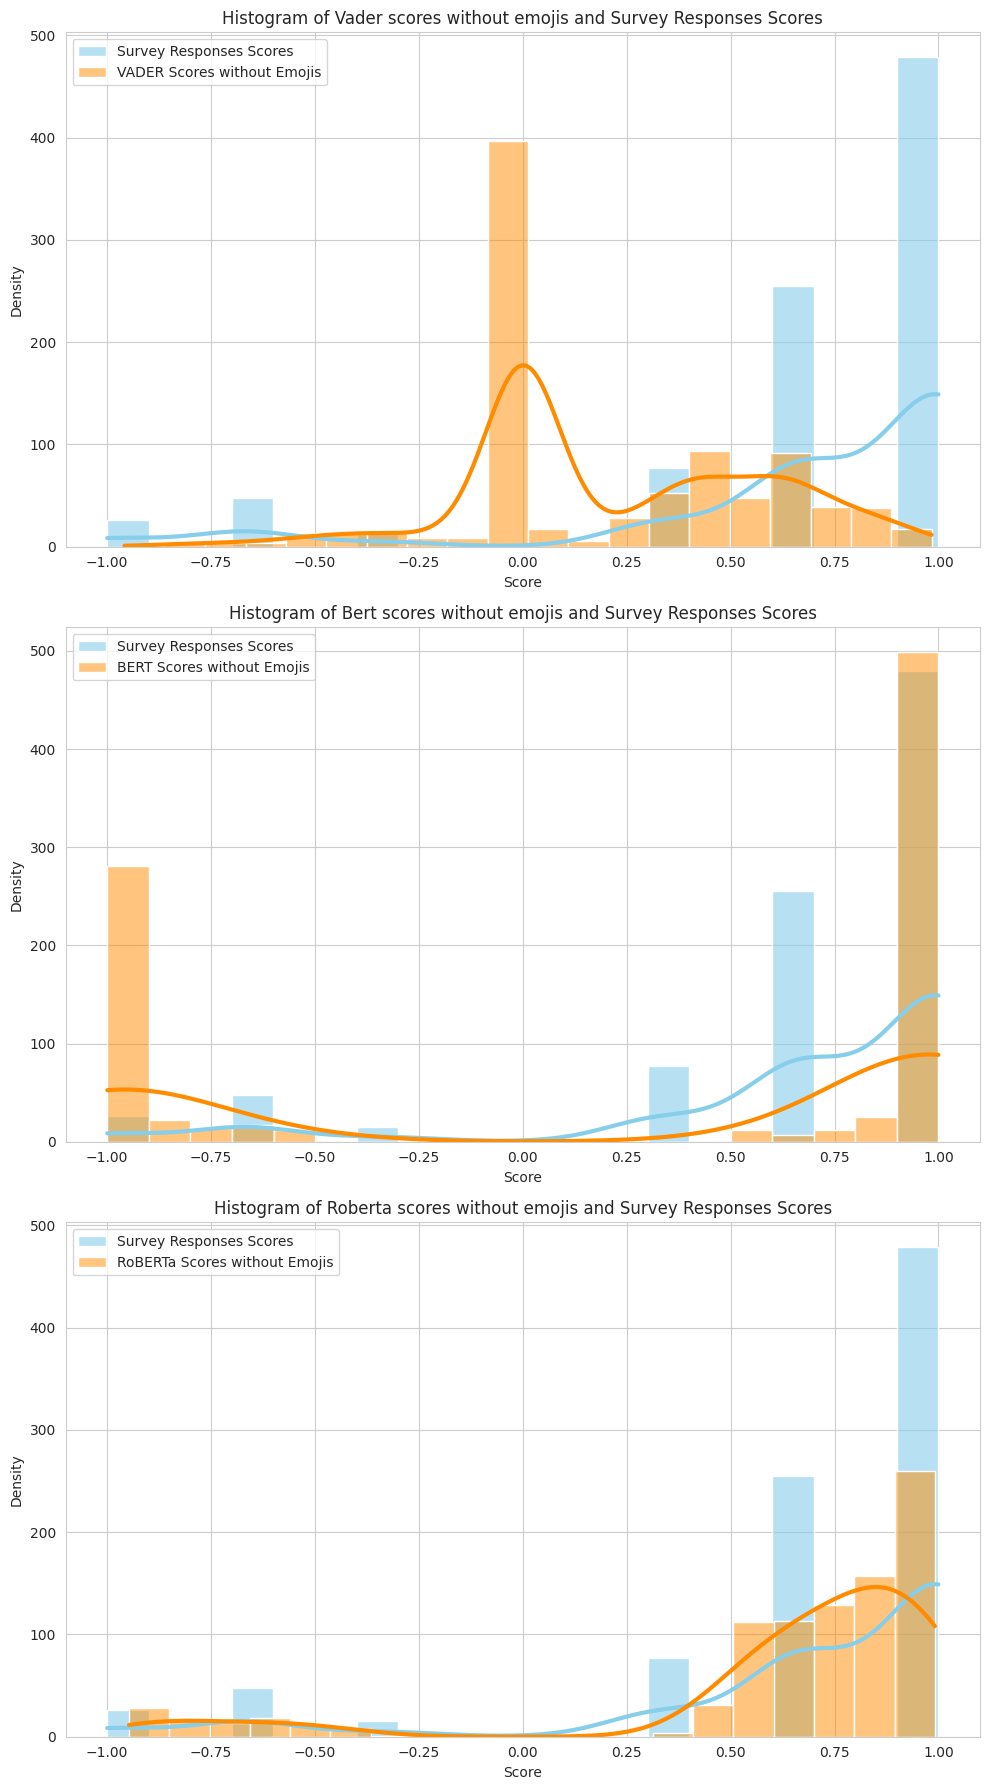

In [ ]:
# Define the scores to overlay
scores_to_overlay = [ 'VADER Scores without Emojis', 'BERT Scores without Emojis', 'RoBERTa Scores without Emojis']

# Create separate subplots for each pair of scores
fig, axes = plt.subplots(nrows=len(scores_to_overlay), ncols=1, figsize=(10, 6 * len(scores_to_overlay)))

# Plot overlaid histograms for each pair of scores
for i, score_column in enumerate(scores_to_overlay):
    ax = axes[i]
    sns.histplot(survey_df['Survey Responses Scores'], bins=20, alpha=0.6, color='skyblue', label='Survey Responses Scores', kde=True, ax=ax, line_kws={'linewidth': 3, 'color': 'dark blue'})
    sns.histplot(survey_df[score_column], bins=20, alpha=0.5, color='darkorange', label=score_column, kde=True, ax=ax, line_kws={'linewidth': 3, 'color': 'red'})
    ax.set_xlabel('Score')
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram of {score_column.capitalize()} and Survey Responses Scores')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Model Performance Evaluation-Error Metrics

Calculating MAD, MAE, MSE, RMSE for models both including emojis and excluding them.

Further classified model performances in positively labeled sentiment category and negatively labeled sentiment category to compare models in sentiment category labeling

## Error Metrics for models including Emojis

In [ ]:
# Define the true labels
true_labels = survey_df['Survey Responses Scores']

# Calculate evaluation metrics for VADER
vader_emoji_mse = mean_squared_error(true_labels, survey_df['VADER Scores with Emojis'])
vader_emoji_mae = mean_absolute_error(true_labels, survey_df['VADER Scores with Emojis'])
vader_emoji_mad = np.mean(np.abs(true_labels - survey_df['VADER Scores with Emojis']))

# Calculate evaluation metrics for RoBERTa
roberta_emoji_mse = mean_squared_error(true_labels, survey_df['RoBERTa Scores with Emojis'])
roberta_emoji_mae = mean_absolute_error(true_labels, survey_df['RoBERTa Scores with Emojis'])
roberta_emoji_r2 = r2_score(true_labels, survey_df['RoBERTa Scores with Emojis'])
roberta_emoji_mad = np.mean(np.abs(true_labels - survey_df['RoBERTa Scores with Emojis']))

# Filter out instances with neutral values (0)
survey_df_filtered = survey_df[survey_df['Survey Responses Scores'] != 0]

# Define the true labels for filtered BERT data
true_labels_bert_filtered = survey_df_filtered['Survey Responses Scores']

# Calculate evaluation metrics for filtered BERT
bert_predicted_labels_filtered = survey_df_filtered['BERT Scores with Emojis']
bert_emoji_mse_filtered = mean_squared_error(true_labels_bert_filtered, bert_predicted_labels_filtered)
bert_emoji_mae_filtered = mean_absolute_error(true_labels_bert_filtered, bert_predicted_labels_filtered)
bert_emoji_mad_filtered = np.mean(np.abs(true_labels_bert_filtered - bert_predicted_labels_filtered))

# Create total_error_df
total_error_df = pd.DataFrame(columns=['Model', 'Total MAE', 'Total MAD', 'Total MSE', 'Total RMSE'])

# Append to total_error_df
total_error_df = total_error_df.append({
    'Model': 'VADER with Emojis',
    'Total MAE': vader_emoji_mae,
    'Total MAD': vader_emoji_mad,
    'Total MSE': vader_emoji_mse,
    'Total RMSE': np.sqrt(vader_emoji_mse)
}, ignore_index=True)

total_error_df = total_error_df.append({
    'Model': 'BERT with Emojis',
    'Total MAE': bert_emoji_mae_filtered,
    'Total MAD': bert_emoji_mad_filtered,
    'Total MSE': bert_emoji_mse_filtered,
    'Total RMSE': np.sqrt(bert_emoji_mse_filtered)
}, ignore_index=True)

total_error_df = total_error_df.append({
    'Model': 'RoBERTa with Emojis',
    'Total MAE': roberta_emoji_mae,
    'Total MAD': roberta_emoji_mad,
    'Total MSE': roberta_emoji_mse,
    'Total RMSE': np.sqrt(roberta_emoji_mse)
}, ignore_index=True)

total_error_df

<ipython-input-10-640d0c061526>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_error_df = total_error_df.append({
<ipython-input-10-640d0c061526>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_error_df = total_error_df.append({
<ipython-input-10-640d0c061526>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_error_df = total_error_df.append({


Model  Total MAE  Total MAD  Total MSE  Total RMSE
0    VADER with Emojis   0.551059   0.551059   0.428004    0.654220
1     BERT with Emojis   0.844602   0.844602   1.342745    1.158769
2  RoBERTa with Emojis   0.318538   0.318538   0.293519    0.541774

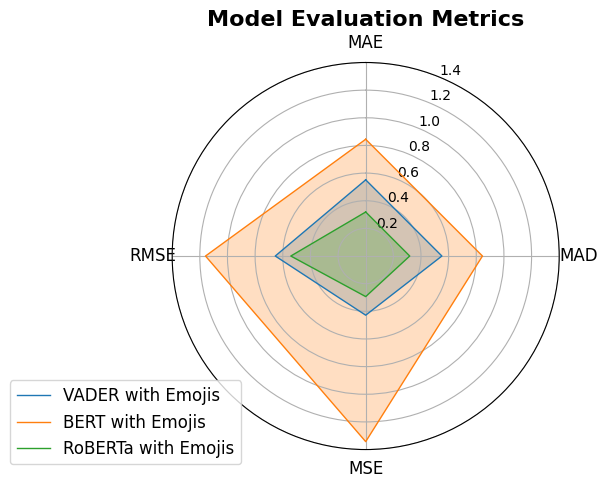

In [ ]:
# Define the metrics and models
metrics = ['MAE', 'MAD', 'MSE', 'RMSE']
models = ['VADER with Emojis', 'BERT with Emojis', 'RoBERTa with Emojis']

# Define the scores for each model
scores = {
    'VADER with Emojis': [0.551059, 0.551059, 0.428004, 0.654220],
    'BERT with Emojis': [0.844602, 0.844602, 1.342745, 1.158769],
    'RoBERTa with Emojis': [0.318538, 0.318538, 0.293519, 0.541774]
}


num_metrics = len(metrics)

# Compute angle for each metric
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], metrics, fontsize=12)

# Plot each model's scores
for model in models:
    model_scores = scores[model]
    model_scores += model_scores[:1]  # Complete the loop
    ax.plot(angles, model_scores, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, model_scores, alpha=0.25)

ax.set_ylim(0, 1.4)

# Add legend with adjusted position and fontsize
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 0.2), fontsize=12)

# Adjust title fontsize and weight
plt.title('Model Evaluation Metrics', fontsize=16, fontweight='bold')


plt.tight_layout()
plt.show()


### Evaluation Metrics for positively Labeled Comments with Emojis

In [ ]:
# Create survey_df_pos that only contains positive values from columns
survey_df_pos = survey_df[(survey_df['VADER Scores with Emojis'] > 0) &
                          (survey_df['RoBERTa Scores with Emojis'] > 0) &
                          (survey_df['BERT Scores with Emojis'] > 0) &
                          (survey_df['Survey Responses Scores'] > 0)]

# Define the true labels
true_labels = survey_df_pos['Survey Responses Scores']

# Calculate evaluation metrics for VADER
pos_vader_emoji_mse = mean_squared_error(true_labels, survey_df_pos['VADER Scores with Emojis'])
pos_vader_emoji_mae = mean_absolute_error(true_labels, survey_df_pos['VADER Scores with Emojis'])
pos_vader_emoji_mad = np.mean(np.abs(true_labels - survey_df_pos['VADER Scores with Emojis']))

# Calculate evaluation metrics for RoBERTa
pos_roberta_emoji_mse = mean_squared_error(true_labels, survey_df_pos['RoBERTa Scores with Emojis'])
pos_roberta_emoji_mae = mean_absolute_error(true_labels, survey_df_pos['RoBERTa Scores with Emojis'])
pos_roberta_emoji_r2 = r2_score(true_labels, survey_df_pos['RoBERTa Scores with Emojis'])
pos_roberta_emoji_mad = np.mean(np.abs(true_labels - survey_df_pos['RoBERTa Scores with Emojis']))

# Filter out instances with neutral values (0) for BERT
pos_survey_df_filtered = survey_df_pos[survey_df_pos['Survey Responses Scores'] != 0]

# Define the true labels for filtered BERT data
true_labels_bert_filtered = pos_survey_df_filtered['Survey Responses Scores']

# Calculate evaluation metrics for BERT
pos_bert_predicted_labels_filtered = pos_survey_df_filtered['BERT Scores with Emojis']
pos_bert_emoji_mse_filtered = mean_squared_error(true_labels_bert_filtered, pos_bert_predicted_labels_filtered)
pos_bert_emoji_mae_filtered = mean_absolute_error(true_labels_bert_filtered, pos_bert_predicted_labels_filtered)
pos_bert_emoji_mad_filtered = np.mean(np.abs(true_labels_bert_filtered - pos_bert_predicted_labels_filtered))

# Create pos_error_df DataFrame
pos_error_df = pd.DataFrame(columns=['Model', 'Positive Scores MAE', 'Positive Scores MAD', 'Positive Scores MSE', 'Positive Scores RMSE'])

# Append to pos_error_df
pos_error_df = pos_error_df.append({
    'Model': 'VADER with Emojis',
    'Positive Scores MAE': pos_vader_emoji_mae,
    'Positive Scores MAD': pos_vader_emoji_mad,
    'Positive Scores MSE': pos_vader_emoji_mse,
    'Positive Scores RMSE': np.sqrt(pos_vader_emoji_mse)
}, ignore_index=True)

pos_error_df = pos_error_df.append({
    'Model': 'BERT with Emojis',
    'Positive Scores MAE': pos_bert_emoji_mae_filtered,
    'Positive Scores MAD': pos_bert_emoji_mad_filtered,
    'Positive Scores MSE': pos_bert_emoji_mse_filtered,
    'Positive Scores RMSE': np.sqrt(pos_bert_emoji_mse_filtered)
}, ignore_index=True)

pos_error_df = pos_error_df.append({
    'Model': 'RoBERTa with Emojis',
    'Positive Scores MAE': pos_roberta_emoji_mae,
    'Positive Scores MAD': pos_roberta_emoji_mad,
    'Positive Scores MSE': pos_roberta_emoji_mse,
    'Positive Scores RMSE': np.sqrt(pos_roberta_emoji_mse)
}, ignore_index=True)

pos_error_df

<ipython-input-87-2aa0b16cc24f>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_error_df = pos_error_df.append({
<ipython-input-87-2aa0b16cc24f>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_error_df = pos_error_df.append({
<ipython-input-87-2aa0b16cc24f>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_error_df = pos_error_df.append({


Model  Positive Scores MAE  Positive Scores MAD  \
0    VADER with Emojis             0.430198             0.430198   
1     BERT with Emojis             0.148163             0.148163   
2  RoBERTa with Emojis             0.150916             0.150916   

   Positive Scores MSE  Positive Scores RMSE  
0             0.263398              0.513223  
1             0.055924              0.236482  
2             0.047423              0.217768

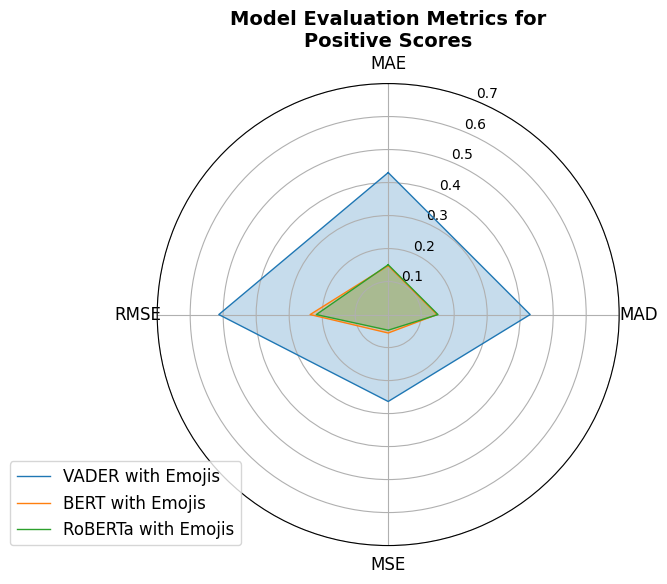

In [ ]:
# Define the metrics and models
metrics = ['MAE', 'MAD', 'MSE', 'RMSE']
models = ['VADER with Emojis', 'BERT with Emojis', 'RoBERTa with Emojis']

# Define the scores for each model
scores = {
    'VADER with Emojis': [0.430198, 0.430198, 0.263398, 0.513223],
    'BERT with Emojis': [0.148163, 0.148163, 0.055924, 0.236482],
    'RoBERTa with Emojis': [0.150916, 0.150916, 0.047423, 0.217768]
}

# Number of metrics
num_metrics = len(metrics)

# Compute angle for each metric
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" by appending the start angle to the end
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], metrics, fontsize=12, rotation=45, )

# Plot each model's scores
for model in models:
    model_scores = scores[model]
    model_scores += model_scores[:1]  # Complete the loop
    ax.plot(angles, model_scores, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, model_scores, alpha=0.25)
ax.set_ylim(0, 0.7)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 0.2), fontsize=12)

plt.title('Model Evaluation Metrics for\nPositive Scores', fontsize=14, fontweight='bold')
plt.show()

###Evaluation metrics for Negatively labeled comments with Emojis

In [ ]:
# Create survey_df_pos that only contains positive values from columns
vsurvey_df_neg = survey_df[(survey_df['VADER Scores with Emojis'] < 0)]
rsurvey_df_neg = survey_df[(survey_df['RoBERTa Scores with Emojis'] < 0)]
bsurvey_df_neg = survey_df[(survey_df['BERT Scores with Emojis'] < 0)]
ssurvey_df_neg = survey_df[(survey_df['Survey Responses Scores'] < 0)]

# Define the true label
vtrue_labels = vsurvey_df_neg['Survey Responses Scores']
rtrue_labels = rsurvey_df_neg['Survey Responses Scores']
btrue_labels = bsurvey_df_neg['Survey Responses Scores']
strue_labels = ssurvey_df_neg['Survey Responses Scores']

# Calculate evaluation metrics for VADER
neg_vader_emoji_mse = mean_squared_error(vtrue_labels, vsurvey_df_neg['VADER Scores with Emojis'])
neg_vader_emoji_mae = mean_absolute_error(vtrue_labels, vsurvey_df_neg['VADER Scores with Emojis'])
neg_vader_emoji_mad = np.mean(np.abs(vtrue_labels - vsurvey_df_neg['VADER Scores with Emojis']))

# Calculate evaluation metrics for RoBERTa
neg_roberta_emoji_mse = mean_squared_error(rtrue_labels, rsurvey_df_neg['RoBERTa Scores with Emojis'])
neg_roberta_emoji_mae = mean_absolute_error(rtrue_labels, rsurvey_df_neg['RoBERTa Scores with Emojis'])
neg_roberta_emoji_r2 = r2_score(rtrue_labels, rsurvey_df_neg['RoBERTa Scores with Emojis'])
neg_roberta_emoji_mad = np.mean(np.abs(rtrue_labels - rsurvey_df_neg['RoBERTa Scores with Emojis']))

# Filter out instances with neutral values (0) for BERT
neg_survey_df_filtered = bsurvey_df_neg[bsurvey_df_neg['Survey Responses Scores'] != 0]

# Define the true labels for filtered BERT data
true_labels_bert_filtered = neg_survey_df_filtered['Survey Responses Scores']

# Calculate evaluation metrics for BERT
neg_bert_predicted_labels_filtered = neg_survey_df_filtered['BERT Scores with Emojis']
neg_bert_emoji_mse_filtered = mean_squared_error(true_labels_bert_filtered, neg_bert_predicted_labels_filtered)
neg_bert_emoji_mae_filtered = mean_absolute_error(true_labels_bert_filtered, neg_bert_predicted_labels_filtered)
neg_bert_emoji_mad_filtered = np.mean(np.abs(true_labels_bert_filtered - neg_bert_predicted_labels_filtered))

# Create neg_error_df DataFrame
neg_error_df = pd.DataFrame(columns=['Model', 'Negative Scores MAE', 'Negative Scores MAD', 'Negative Scores MSE', 'Negative Scores RMSE'])

# Append to neg_error_df
neg_error_df = neg_error_df.append({
    'Model': 'VADER with Emojis',
    'Negative Scores MAE': neg_vader_emoji_mae,
    'Negative Scores MAD': neg_vader_emoji_mad,
    'Negative Scores MSE': neg_vader_emoji_mse,
    'Negative Scores RMSE': np.sqrt(neg_vader_emoji_mse)
}, ignore_index=True)

neg_error_df = neg_error_df.append({
    'Model': 'BERT with Emojis',
    'Negative Scores MAE': neg_bert_emoji_mae_filtered,
    'Negative Scores MAD': neg_bert_emoji_mad_filtered,
    'Negative Scores MSE': neg_bert_emoji_mse_filtered,
    'Negative Scores RMSE': np.sqrt(neg_bert_emoji_mse_filtered)
}, ignore_index=True)

neg_error_df = neg_error_df.append({
    'Model': 'RoBERTa with Emojis',
    'Negative Scores MAE': neg_roberta_emoji_mae,
    'Negative Scores MAD': neg_roberta_emoji_mad,
    'Negative Scores MSE': neg_roberta_emoji_mse,
    'Negative Scores RMSE': np.sqrt(neg_roberta_emoji_mse)
}, ignore_index=True)

neg_error_df

<ipython-input-69-6743de9a94e0>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neg_error_df = neg_error_df.append({
<ipython-input-69-6743de9a94e0>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neg_error_df = neg_error_df.append({
<ipython-input-69-6743de9a94e0>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neg_error_df = neg_error_df.append({


Model  Negative Scores MAE  Negative Scores MAD  \
0    VADER with Emojis             0.902131             0.902131   
1     BERT with Emojis             1.473611             1.473611   
2  RoBERTa with Emojis             0.904104             0.904104   

   Negative Scores MSE  Negative Scores RMSE  
0             0.980752              0.990329  
1             2.512670              1.585140  
2             1.238929              1.113072

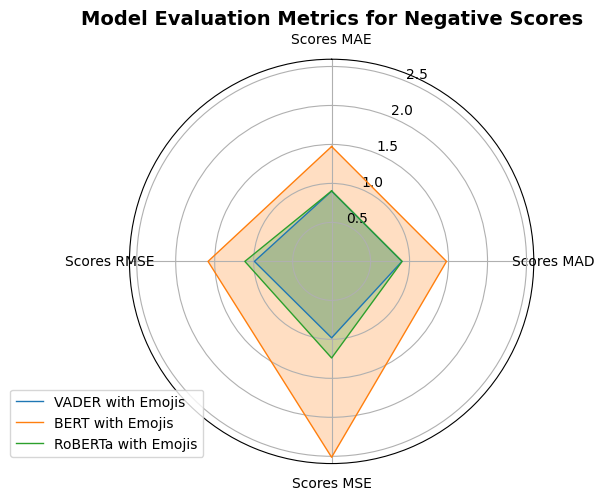

In [ ]:
# Define the metrics and models
metrics = ['Scores MAE', 'Scores MAD', 'Scores MSE', 'Scores RMSE']
models = ['VADER with Emojis', 'BERT with Emojis', 'RoBERTa with Emojis']

# Define the scores for each model
scores = {
    'VADER with Emojis': [0.902131,	0.902131,	0.980752,	0.990329],
    'BERT with Emojis': [1.473611,	1.473611,	2.512670,	1.585140],
    'RoBERTa with Emojis': [0.904104,	0.904104,	1.238929,	1.113072]
}

# Number of metrics
num_metrics = len(metrics)

# Compute angle for each metric
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" by appending the start angle to the end
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], metrics, fontsize=10, rotation=45)

# Plot each model's scores
for model in models:
    model_scores = scores[model]
    model_scores += model_scores[:1]  # Complete the loop
    ax.plot(angles, model_scores, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, model_scores, alpha=0.25)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 0.2))

plt.title('Model Evaluation Metrics for Negative Scores', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


##Error Metrics for models excluding Emojis

Total values (Both positive and negatively labeled comments)

In [ ]:
# Drop rows with NaN values
sim_survey_df = survey_df.dropna(subset=['Survey Responses Scores', 'VADER Scores without Emojis', 'BERT Scores without Emojis', 'RoBERTa Scores without Emojis'])

# Define the true labels
true_labels = sim_survey_df['Survey Responses Scores']

# Calculate evaluation metrics for VADER
sim_vader_mse = mean_squared_error(true_labels, sim_survey_df['VADER Scores without Emojis'])
sim_vader_mae = mean_absolute_error(true_labels, sim_survey_df['VADER Scores without Emojis'])
sim_vader_mape = mean_absolute_percentage_error(true_labels, sim_survey_df['VADER Scores without Emojis'])
sim_vader_mad = np.mean(np.abs(true_labels - sim_survey_df['VADER Scores without Emojis']))

# Calculate evaluation metrics for RoBERTa
sim_roberta_mse = mean_squared_error(true_labels, sim_survey_df['RoBERTa Scores without Emojis'])
sim_roberta_mae = mean_absolute_error(true_labels, sim_survey_df['RoBERTa Scores without Emojis'])
sim_roberta_mape = mean_absolute_percentage_error(true_labels, sim_survey_df['RoBERTa Scores without Emojis'])
sim_roberta_mad = np.mean(np.abs(true_labels - sim_survey_df['RoBERTa Scores without Emojis']))

# Filter out instances with neutral values (0) for BERT
sim_survey_df_filtered = sim_survey_df[sim_survey_df['Survey Responses Scores'] != 0]

# Define the true labels for filtered BERT data
sim_true_labels_bert_filtered = sim_survey_df_filtered['Survey Responses Scores']

# Calculate evaluation metrics for BERT
sim_bert_predicted_labels_filtered = sim_survey_df_filtered['BERT Scores without Emojis']
sim_bert_mse_filtered = mean_squared_error(sim_true_labels_bert_filtered, sim_bert_predicted_labels_filtered)
sim_bert_mae_filtered = mean_absolute_error(sim_true_labels_bert_filtered, sim_bert_predicted_labels_filtered)
sim_bert_mad_filtered = np.mean(np.abs(sim_true_labels_bert_filtered - sim_bert_predicted_labels_filtered))

# Create total_error_df
sim_total_error_df = pd.DataFrame(columns=['Model', 'Total MAE', 'Total MAD', 'Total MSE', 'Total RMSE'])

# Append results
sim_total_error_df = sim_total_error_df.append({
    'Model': 'VADER without Emojis',
    'Total MSE': sim_vader_mse,
    'Total MAE': sim_vader_mae,
    'Total MAD': sim_vader_mad,
    'Total RMSE': np.sqrt(sim_vader_mse)
}, ignore_index=True)

sim_total_error_df = sim_total_error_df.append({
    'Model': 'BERT without Emojis',
    'Total MSE': sim_bert_mse_filtered,
    'Total MAE': sim_bert_mae_filtered,
    'Total MAD': sim_bert_mad_filtered,
    'Total RMSE': np.sqrt(sim_bert_mse_filtered)
}, ignore_index=True)

sim_total_error_df = sim_total_error_df.append({
    'Model': 'RoBERTa without Emojis',
    'Total MSE': sim_roberta_mse,
    'Total MAE': sim_roberta_mae,
    'Total MAD': sim_roberta_mad,
    'Total RMSE': np.sqrt(sim_roberta_mse)
}, ignore_index=True)

sim_total_error_df


<ipython-input-11-cba700075dab>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_total_error_df = sim_total_error_df.append({
<ipython-input-11-cba700075dab>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_total_error_df = sim_total_error_df.append({
<ipython-input-11-cba700075dab>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_total_error_df = sim_total_error_df.append({


Model  Total MAE  Total MAD  Total MSE  Total RMSE
0    VADER without Emojis   0.632130   0.632130   0.530431    0.728307
1     BERT without Emojis   0.696709   0.696709   1.075885    1.037249
2  RoBERTa without Emojis   0.364938   0.364938   0.337870    0.581266

###Evaluation Metrics for Negatively Labeled Comments with Emojis

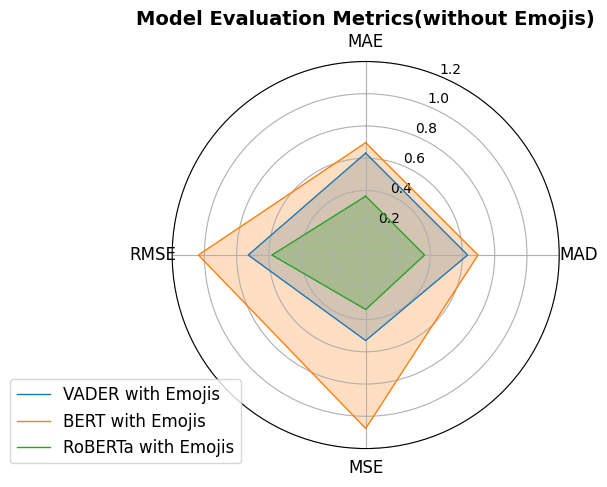

In [ ]:
# Define the metrics and models
metrics = ['MAE', 'MAD', 'MSE', 'RMSE']
models = ['VADER with Emojis', 'BERT with Emojis', 'RoBERTa with Emojis']

# Define the scores for each model
scores = {
    'VADER with Emojis': [0.632130,	0.632130,	0.530431,	0.728307],
    'BERT with Emojis': [0.696709,	0.696709,	1.075885,	1.037249],
    'RoBERTa with Emojis': [0.364938,	0.364938,	0.337870,	0.581266]
}

# Number of metrics
num_metrics = len(metrics)

# Compute angle for each metric
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], metrics, fontsize=12)

# Plot each model's scores
for model in models:
    model_scores = scores[model]
    model_scores += model_scores[:1]  # Complete the loop
    ax.plot(angles, model_scores, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, model_scores, alpha=0.25)

ax.set_ylim(0, 1.2)

# Add legend with adjusted position and fontsize
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 0.2), fontsize=12)

# Adjust title fontsize and weight
plt.title('Model Evaluation Metrics(without Emojis)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

###Evaluation Metrics for Positively Labeled Comments with Emojis

In [ ]:
# Create survey_df_pos that only contains positive values from columns
sim_survey_df_pos = survey_df[(survey_df['VADER Scores without Emojis'] > 0) &
                          (survey_df['RoBERTa Scores without Emojis'] > 0) &
                          (survey_df['BERT Scores without Emojis'] > 0) &
                          (survey_df['Survey Responses Scores'] > 0)]

# Define the true labels
true_labels = sim_survey_df_pos['Survey Responses Scores']

# Calculate evaluation metrics for VADER
sim_pos_vader_mse = mean_squared_error(true_labels, sim_survey_df_pos['VADER Scores with Emojis'])
sim_pos_vader_mae = mean_absolute_error(true_labels, sim_survey_df_pos['VADER Scores with Emojis'])
sim_pos_vader_mad = np.mean(np.abs(true_labels - sim_survey_df_pos['VADER Scores with Emojis']))

# Calculate evaluation metrics for RoBERTa
sim_pos_roberta_mse = mean_squared_error(true_labels, sim_survey_df_pos['RoBERTa Scores with Emojis'])
sim_pos_roberta_mae = mean_absolute_error(true_labels, sim_survey_df_pos['RoBERTa Scores with Emojis'])
sim_pos_roberta_mad = np.mean(np.abs(true_labels - sim_survey_df_pos['RoBERTa Scores with Emojis']))

# Filter out instances with neutral values (0) for BERT
sim_pos_survey_df_filtered = sim_survey_df_pos[sim_survey_df_pos['Survey Responses Scores'] != 0]

# Define the true labels for filtered BERT data
sim_true_labels_bert_filtered = sim_pos_survey_df_filtered['Survey Responses Scores']

# Calculate evaluation metrics for BERT
sim_pos_bert_predicted_labels_filtered = sim_pos_survey_df_filtered['BERT Scores with Emojis']
sim_pos_bert_mse_filtered = mean_squared_error(sim_true_labels_bert_filtered, sim_pos_bert_predicted_labels_filtered)
sim_pos_bert_mae_filtered = mean_absolute_error(sim_true_labels_bert_filtered, sim_pos_bert_predicted_labels_filtered)
sim_pos_bert_mad_filtered = np.mean(np.abs(sim_true_labels_bert_filtered - sim_pos_bert_predicted_labels_filtered))

# Create sim_pos_error_df DataFrame
sim_pos_error_df = pd.DataFrame(columns=['Model', 'Positive Scores MAE', 'Positive Scores MAD', 'Positive Scores MSE', 'Positive Scores RMSE'])

# Append to pos_error_df
sim_pos_error_df = sim_pos_error_df.append({
    'Model': 'VADER without Emojis',
    'Positive Scores MAE': sim_pos_vader_mae,
    'Positive Scores MAD': sim_pos_vader_mad,
    'Positive Scores MSE': sim_pos_vader_mse,
    'Positive Scores RMSE': np.sqrt(sim_pos_vader_mse)
}, ignore_index=True)

sim_pos_error_df = sim_pos_error_df.append({
    'Model': 'BERT without Emojis',
    'Positive Scores MAE': sim_pos_bert_mae_filtered,
    'Positive Scores MAD': sim_pos_bert_mad_filtered,
    'Positive Scores MSE': sim_pos_bert_mse_filtered,
    'Positive Scores RMSE': np.sqrt(sim_pos_bert_mse_filtered)
}, ignore_index=True)

sim_pos_error_df = sim_pos_error_df.append({
    'Model': 'RoBERTa without Emojis',
    'Positive Scores MAE': sim_pos_roberta_mae,
    'Positive Scores MAD': sim_pos_roberta_mad,
    'Positive Scores MSE': sim_pos_roberta_mse,
    'Positive Scores RMSE': np.sqrt(sim_pos_roberta_mse)
}, ignore_index=True)

sim_pos_error_df

<ipython-input-98-a092780f99ea>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_pos_error_df = sim_pos_error_df.append({
<ipython-input-98-a092780f99ea>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_pos_error_df = sim_pos_error_df.append({
<ipython-input-98-a092780f99ea>:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_pos_error_df = sim_pos_error_df.append({


Model  Positive Scores MAE  Positive Scores MAD  \
0    VADER without Emojis             0.289311             0.289311   
1     BERT without Emojis             0.331114             0.331114   
2  RoBERTa without Emojis             0.156243             0.156243   

   Positive Scores MSE  Positive Scores RMSE  
0             0.115619              0.340027  
1             0.418246              0.646719  
2             0.059957              0.244861

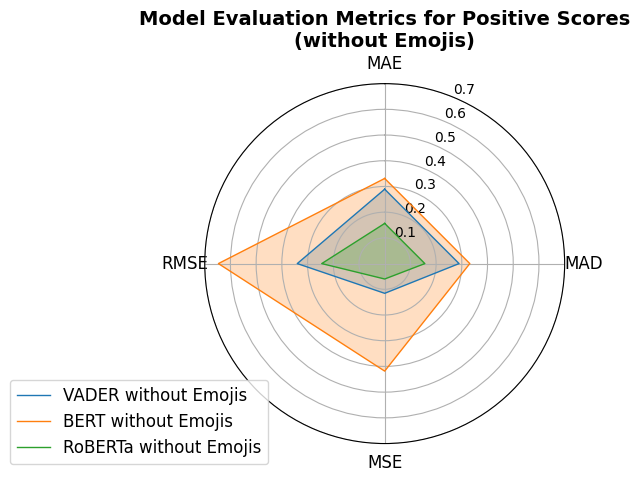

In [ ]:
# Define the metrics and models
metrics = ['MAE', 'MAD', 'MSE', 'RMSE']
models = ['VADER without Emojis', 'BERT without Emojis', 'RoBERTa without Emojis']

# Define the scores for each model
scores = {
    'VADER without Emojis': [0.289311, 0.289311, 0.115619, 0.340027],
    'BERT without Emojis': [0.331114, 0.331114, 0.418246, 0.646719],
    'RoBERTa without Emojis': [0.156243, 0.156243, 0.059957, 0.244861]
}


# Number of metrics
num_metrics = len(metrics)

# Compute angle for each metric
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" by appending the start angle to the end
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], metrics, fontsize=12)

# Plot each model's scores
for model in models:
    model_scores = scores[model]
    model_scores += model_scores[:1]  # Complete the loop
    ax.plot(angles, model_scores, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, model_scores, alpha=0.25)

ax.set_ylim(0, 0.7)  # Set y-axis limits to range from 0 to 1.4

# Add legend with adjusted position and fontsize
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 0.2), fontsize=12)

# Adjust title fontsize and weight
plt.title('Model Evaluation Metrics for Positive Scores\n(without Emojis)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

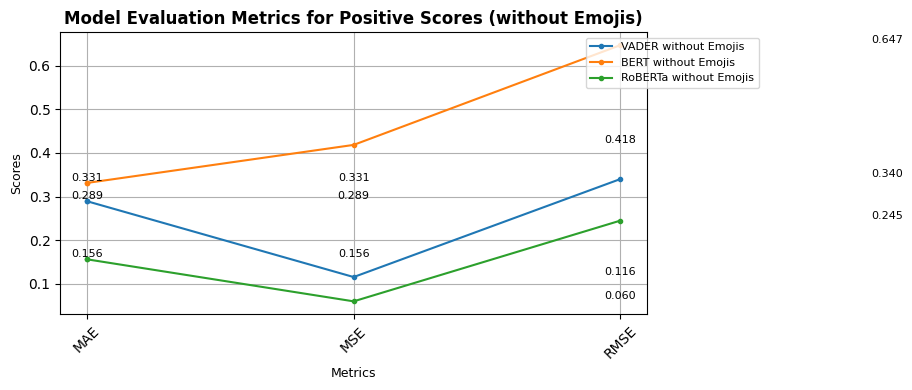

In [ ]:
# Define the metrics and models
metrics = ['MAE', 'MAE', 'MSE', 'RMSE']
models = ['VADER without Emojis', 'BERT without Emojis', 'RoBERTa without Emojis']

# Define the scores for each model
scores = {
    'VADER without Emojis': [0.289311, 0.289311, 0.115619, 0.340027],
    'BERT without Emojis': [0.331114, 0.331114, 0.418246, 0.646719],
    'RoBERTa without Emojis': [0.156243, 0.156243, 0.059957, 0.244861]
}

# Plot the line chart
plt.figure(figsize=(10, 4))

# Plot each model's scores
for model in models:
    model_scores = scores[model]
    plt.plot(metrics, model_scores, marker='o', label=model, markersize=3)  # Set markevery to 1

    # Annotate each data point with its value
    for i, score in enumerate(model_scores):
        plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=8)  # Set fontsize to 8

# Add labels and title
plt.xlabel('Metrics', fontsize=9)
plt.ylabel('Scores', fontsize=9)
plt.title('Model Evaluation Metrics for Positive Scores (without Emojis)', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=8)  # Set fontsize to 8

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Negative Values without Emojis

In [ ]:
# Create survey_df_pos that only contains positive values from columns
v_sim_survey_df_neg = survey_df[survey_df['VADER Scores without Emojis'] < 0]
r_sim_survey_df_neg = survey_df[survey_df['RoBERTa Scores without Emojis'] < 0]
b_sim_survey_df_neg =  survey_df[survey_df['BERT Scores without Emojis'] < 0]
s_sim_survey_df_neg = survey_df[survey_df['Survey Responses Scores'] < 0]

# Define the true labels
v_true_labels = v_sim_survey_df_neg['Survey Responses Scores']
r_true_labels = r_sim_survey_df_neg['Survey Responses Scores']
b_true_labels = b_sim_survey_df_neg['Survey Responses Scores']
s_true_labels = s_sim_survey_df_neg['Survey Responses Scores']

# Calculate evaluation metrics for VADER
sim_neg_vader_emoji_mse = mean_squared_error(v_true_labels, v_sim_survey_df_neg['VADER Scores without Emojis'])
sim_neg_vader_emoji_mae = mean_absolute_error(v_true_labels, v_sim_survey_df_neg['VADER Scores without Emojis'])
sim_neg_vader_emoji_mad = np.mean(np.abs(v_true_labels - v_sim_survey_df_neg['VADER Scores without Emojis']))

# Calculate evaluation metrics for RoBERTa
sim_neg_roberta_emoji_mse = mean_squared_error(r_true_labels, r_sim_survey_df_neg['RoBERTa Scores without Emojis'])
sim_neg_roberta_emoji_mae = mean_absolute_error(r_true_labels, r_sim_survey_df_neg['RoBERTa Scores without Emojis'])
sim_neg_roberta_emoji_r2 = r2_score(r_true_labels, r_sim_survey_df_neg['RoBERTa Scores without Emojis'])
sim_neg_roberta_emoji_mad = np.mean(np.abs(r_true_labels - r_sim_survey_df_neg['RoBERTa Scores without Emojis']))

# Filter out instances with neutral values (0) for BERT
sim_neg_survey_df_filtered = b_sim_survey_df_neg[b_sim_survey_df_neg['Survey Responses Scores'] != 0]

# Define the true labels for filtered BERT data
sim_true_labels_bert_filtered = sim_neg_survey_df_filtered['Survey Responses Scores']

# Calculate evaluation metrics for BERT
sim_neg_bert_predicted_labels_filtered = sim_neg_survey_df_filtered['BERT Scores without Emojis']
sim_neg_bert_emoji_mse_filtered = mean_squared_error(sim_true_labels_bert_filtered, sim_neg_bert_predicted_labels_filtered)
sim_neg_bert_emoji_mae_filtered = mean_absolute_error(sim_true_labels_bert_filtered, sim_neg_bert_predicted_labels_filtered)
sim_neg_bert_emoji_mad_filtered = np.mean(np.abs(sim_true_labels_bert_filtered - sim_neg_bert_predicted_labels_filtered))

# Create neg_error_df DataFrame
sim_neg_error_df = pd.DataFrame(columns=['Model', 'Negative Scores MAE', 'Negative Scores MAD', 'Negative Scores MSE', 'Negative Scores RMSE'])

# Append to neg_error_df
sim_neg_error_df = sim_neg_error_df.append({
    'Model': 'VADER without Emojis',
    'Negative Scores MAE': sim_neg_vader_emoji_mae,
    'Negative Scores MAD': sim_neg_vader_emoji_mad,
    'Negative Scores MSE': sim_neg_vader_emoji_mse,
    'Negative Scores RMSE': np.sqrt(sim_neg_vader_emoji_mse)
}, ignore_index=True)

sim_neg_error_df = sim_neg_error_df.append({
    'Model': 'BERT without Emojis',
    'Negative Scores MAE': sim_neg_bert_emoji_mae_filtered,
    'Negative Scores MAD': sim_neg_bert_emoji_mad_filtered,
    'Negative Scores MSE': sim_neg_bert_emoji_mse_filtered,
    'Negative Scores RMSE': np.sqrt(sim_neg_bert_emoji_mse_filtered)
}, ignore_index=True)

sim_neg_error_df = sim_neg_error_df.append({
    'Model': 'RoBERTa without Emojis',
    'Negative Scores MAE': sim_neg_roberta_emoji_mae,
    'Negative Scores MAD': sim_neg_roberta_emoji_mad,
    'Negative Scores MSE': sim_neg_roberta_emoji_mse,
    'Negative Scores RMSE': np.sqrt(sim_neg_roberta_emoji_mse)
}, ignore_index=True)

sim_neg_error_df

<ipython-input-62-60fd18072809>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_neg_error_df = sim_neg_error_df.append({
<ipython-input-62-60fd18072809>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_neg_error_df = sim_neg_error_df.append({
<ipython-input-62-60fd18072809>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sim_neg_error_df = sim_neg_error_df.append({


Model  Negative Scores MAE  Negative Scores MAD  \
0    VADER without Emojis             0.990360             0.990360   
1     BERT without Emojis             1.454080             1.454080   
2  RoBERTa without Emojis             1.026357             1.026357   

   Negative Scores MSE  Negative Scores RMSE  
0             1.180748              1.086622  
1             2.489806              1.577912  
2             1.480885              1.216916

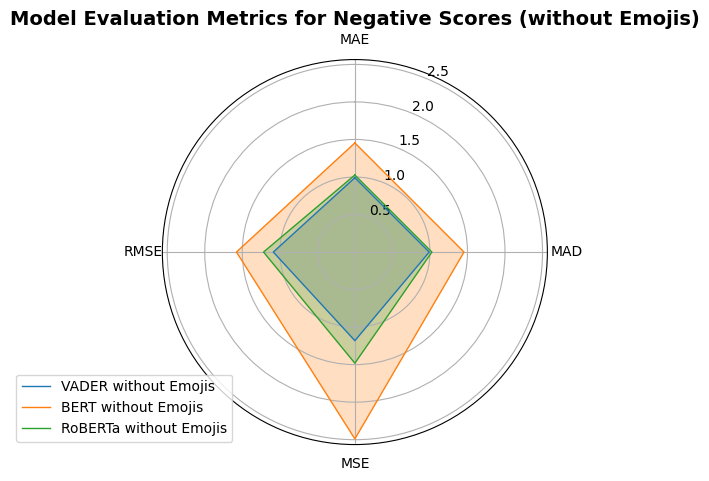

In [ ]:
# Define the metrics and models
metrics = ['MAE', 'MAD', 'MSE', 'RMSE']
models = ['VADER without Emojis', 'BERT without Emojis', 'RoBERTa without Emojis']

# Define the scores for each model
scores = {
    'VADER without Emojis': [sim_neg_vader_emoji_mae, sim_neg_vader_emoji_mad, sim_neg_vader_emoji_mse, np.sqrt(sim_neg_vader_emoji_mse)],
    'BERT without Emojis': [sim_neg_bert_emoji_mae_filtered, sim_neg_bert_emoji_mad_filtered, sim_neg_bert_emoji_mse_filtered, np.sqrt(sim_neg_bert_emoji_mse_filtered)],
    'RoBERTa without Emojis': [sim_neg_roberta_emoji_mae, sim_neg_roberta_emoji_mad, sim_neg_roberta_emoji_mse, np.sqrt(sim_neg_roberta_emoji_mse)]
}

# Number of metrics
num_metrics = len(metrics)

# Compute angle for each metric
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" by appending the start angle to the end
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], metrics, )

# Plot each model's scores
for model in models:
    model_scores = scores[model]
    model_scores += model_scores[:1]  # Complete the loop
    ax.plot(angles, model_scores, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, model_scores, alpha=0.25)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 0.2))

plt.title('Model Evaluation Metrics for Negative Scores (without Emojis)', fontsize=14, fontweight='bold')
plt.show()


#Visualizations

###Bar chart with emojis

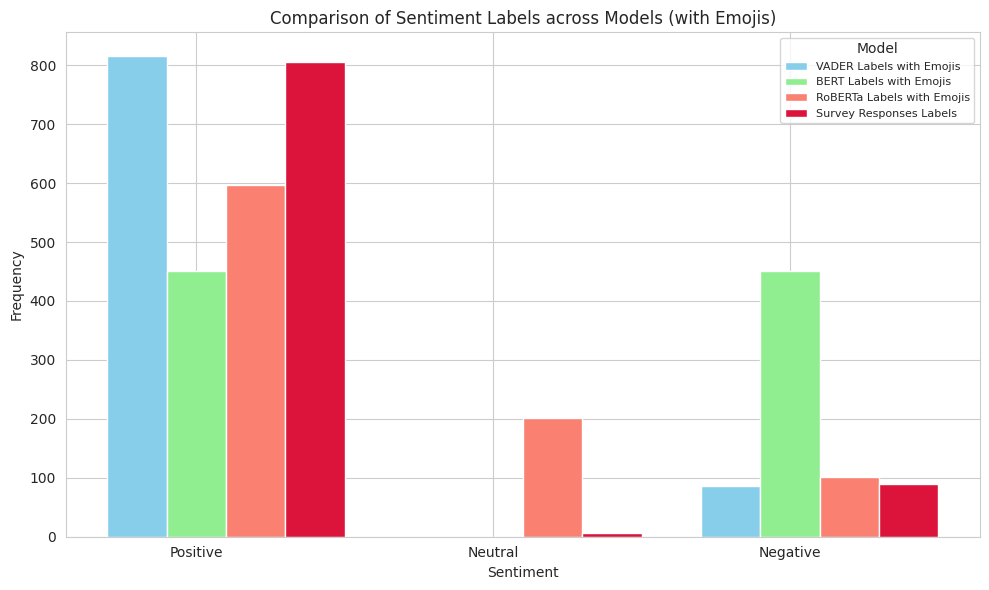

In [ ]:
# Define the columns of interest
columns_of_interest = ['VADER Labels with Emojis', 'BERT Labels with Emojis', 'RoBERTa Labels with Emojis', 'Survey Responses Labels']

# Initialize lists to store frequency data
sentiments = ['Positive', 'Neutral', 'Negative']
data = {'Sentiment': [], 'Model': [], 'Frequency': []}

# Define a function to standardize the labels
def standardize_labels(labels):
    standardized_labels = []
    for label in labels:
        if label.lower() == 'positive':
            standardized_labels.append('Positive')
        elif label.lower() == 'negative':
            standardized_labels.append('Negative')
        elif label.lower() == 'neutral':
            standardized_labels.append('Neutral')
    return standardized_labels

# Calculate frequencies for each column
for column in columns_of_interest:
    standardized_labels = standardize_labels(survey_df[column])
    for sentiment in sentiments:
        count = (np.array(standardized_labels) == sentiment).sum()
        data['Sentiment'].append(sentiment)
        data['Model'].append(column)
        data['Frequency'].append(count)

# Create a DataFrame to store the frequency data
plot_data = pd.DataFrame(data)

# Set the colors for each model
colors = ['skyblue', 'lightgreen', 'salmon', 'crimson']  # Adding 'red' for the new model

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r = range(len(sentiments))

# Plot the bars for each model and sentiment
plt.figure(figsize=(10, 6))
for i, model in enumerate(columns_of_interest):
    plt.bar([x + bar_width * i for x in r], plot_data[plot_data['Model'] == model]['Frequency'],
            width=bar_width, color=colors[i], label=model)

# Add labels and title
plt.xlabel('Sentiment', fontweight='light')
plt.ylabel('Frequency', fontweight='light')
plt.title('Comparison of Sentiment Labels across Models (with Emojis)', fontweight='light')
plt.xticks([r + bar_width for r in range(len(sentiments))], sentiments)
plt.legend(title='Model', prop={'size': 8})

plt.tight_layout()
plt.show()

###Barcharts without Emojis

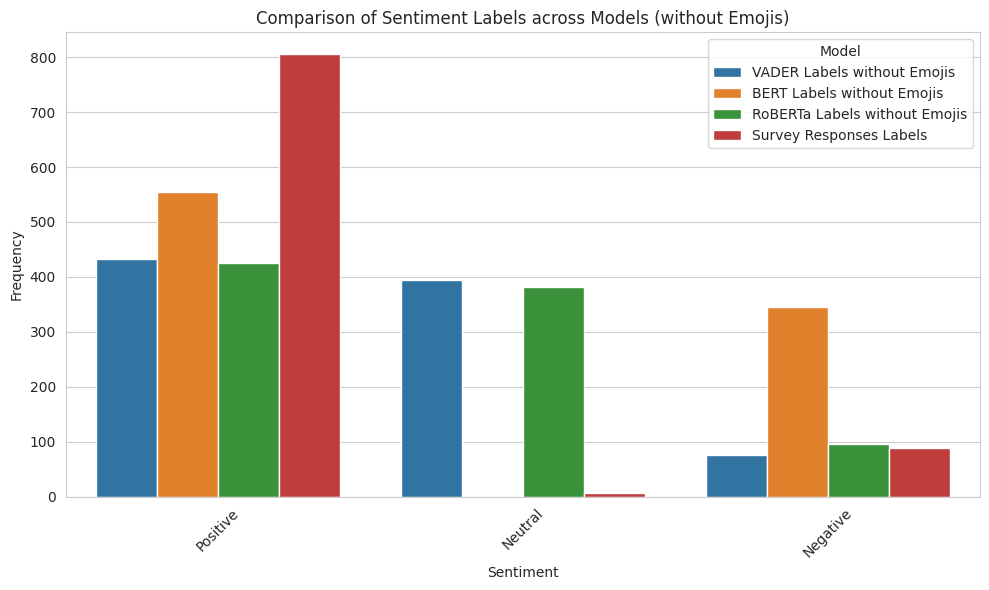

In [ ]:
# Define the columns of interest
columns_of_interest = ['VADER Labels without Emojis', 'BERT Labels without Emojis', 'RoBERTa Labels without Emojis', 'Survey Responses Labels']

# Initialize lists to store frequency data
sentiments = ['Positive', 'Neutral', 'Negative']
data = {'Sentiment': [], 'Model': [], 'Frequency': []}

# Define a function to standardize the labels
def standardize_labels(labels):
    standardized_labels = []
    for label in labels:
        if label.lower() == 'positive':
            standardized_labels.append('Positive')
        elif label.lower() == 'neutral':
            standardized_labels.append('Neutral')
        elif label.lower() == 'negative':
            standardized_labels.append('Negative')
    return standardized_labels

# Calculate frequencies for each column
for column in columns_of_interest:
    standardized_labels = standardize_labels(survey_df[column])
    for sentiment in sentiments:
        count = (np.array(standardized_labels) == sentiment).sum()
        data['Sentiment'].append(sentiment)
        data['Model'].append(column)
        data['Frequency'].append(count)

# Create a DataFrame to store the frequency data
plot_data = pd.DataFrame(data)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Sentiment', y='Frequency', hue='Model')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Comparison of Sentiment Labels across Models (without Emojis)')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

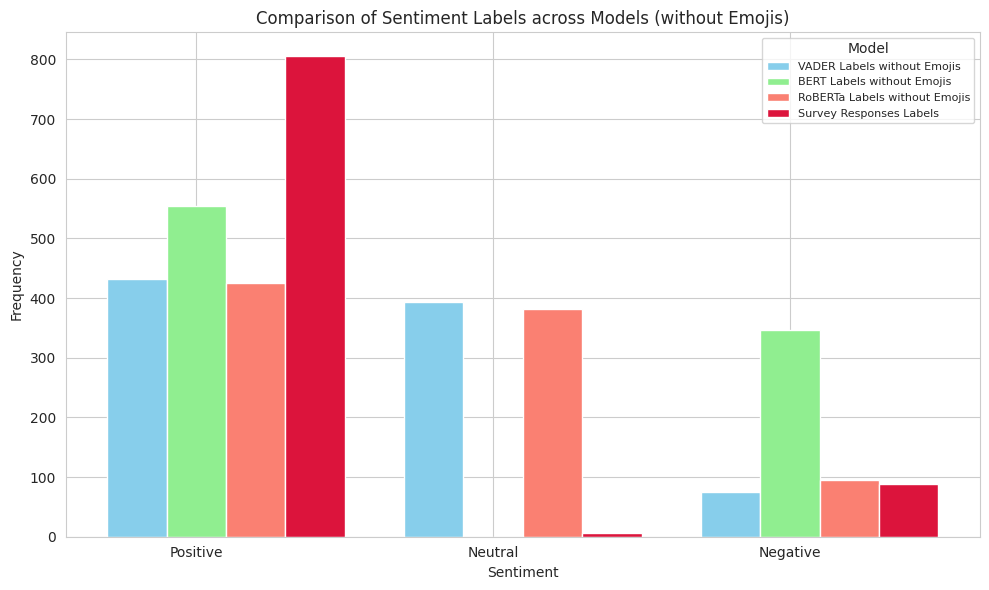

In [ ]:
# Define the columns of interest
columns_of_interest = ['VADER Labels without Emojis', 'BERT Labels without Emojis', 'RoBERTa Labels without Emojis', 'Survey Responses Labels']

# Initialize lists to store frequency data
sentiments = ['Positive', 'Neutral', 'Negative']
data = {'Sentiment': [], 'Model': [], 'Frequency': []}

# Define a function to standardize the labels
def standardize_labels(labels):
    standardized_labels = []
    for label in labels:
        if label.lower() == 'positive':
            standardized_labels.append('Positive')
        elif label.lower() == 'neutral':
            standardized_labels.append('Neutral')
        elif label.lower() == 'negative':
            standardized_labels.append('Negative')
    return standardized_labels

# Calculate frequencies for each column
for column in columns_of_interest:
    standardized_labels = standardize_labels(survey_df[column])
    for sentiment in sentiments:
        count = (np.array(standardized_labels) == sentiment).sum()
        data['Sentiment'].append(sentiment)
        data['Model'].append(column)
        data['Frequency'].append(count)

# Create a DataFrame to store the frequency data
plot_data = pd.DataFrame(data)
# Set the colors for each model
colors = ['skyblue', 'lightgreen', 'salmon', 'crimson']  # Adding 'red' for the new model

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r = range(len(sentiments))

# Plot the bars for each model and sentiment
plt.figure(figsize=(10, 6))
for i, model in enumerate(columns_of_interest):
    plt.bar([x + bar_width * i for x in r], plot_data[plot_data['Model'] == model]['Frequency'],
            width=bar_width, color=colors[i], label=model)

# Add labels and title
plt.xlabel('Sentiment', fontweight='light')
plt.ylabel('Frequency', fontweight='light')
plt.title('Comparison of Sentiment Labels across Models (without Emojis)', fontweight='light')
plt.xticks([r + bar_width for r in range(len(sentiments))], sentiments)
plt.legend(title='Model', prop={'size': 8})

plt.tight_layout()
plt.show()

###Confusion matrixes with emojis

In [ ]:
# Convert both columns to lowercase to make the comparison case insensitive
survey_df['VADER Labels with Emojis'] = survey_df['VADER Labels with Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Create a confusion matrix
confusion_matrix = pd.crosstab(survey_df['VADER Labels with Emojis'], survey_df['Survey Responses Labels'])

# Filter out rows and columns containing "no match" values
confusion_matrix = confusion_matrix.loc[~confusion_matrix.index.str.contains('no match'), ~confusion_matrix.columns.str.contains('no match')]


# Print the confusion matrix
confusion_matrix


Survey Responses Labels   negative  neutral  positive
VADER Labels with Emojis                             
negative                        18       14        69
neutral                          0        1         0
positive                        73       64       760

In [ ]:
# Convert both columns to lowercase to make the comparison case insensitive
survey_df['BERT Labels with Emojis'] = survey_df['BERT Labels with Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Create a confusion matrix
confusion_matrix = pd.crosstab(survey_df['BERT Labels with Emojis'], survey_df['Survey Responses Labels'])

# Filter out rows and columns containing "no match" values
confusion_matrix = confusion_matrix.loc[~confusion_matrix.index.str.contains('no match'), ~confusion_matrix.columns.str.contains('no match')]

# Filter out neutral labels and values
confusion_matrix = confusion_matrix.loc[~confusion_matrix.index.str.contains('neutral'), ~confusion_matrix.columns.str.contains('neutral')]

# Print the confusion matrix
confusion_matrix

Survey Responses Labels  negative  positive
BERT Labels with Emojis                    
negative                       72       387
positive                       19       442

In [ ]:
# Convert both columns to lowercase to make the comparison case insensitive
survey_df['RoBERTa Labels with Emojis'] = survey_df['RoBERTa Labels with Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Create a confusion matrix
confusion_matrix = pd.crosstab(survey_df['RoBERTa Labels with Emojis'], survey_df['Survey Responses Labels'])

# Filter out rows and columns containing "no match" values
confusion_matrix = confusion_matrix.loc[~confusion_matrix.index.str.contains('no match'), ~confusion_matrix.columns.str.contains('no match')]

# Print the confusion matrix
confusion_matrix

Survey Responses Labels     negative  neutral  positive
RoBERTa Labels with Emojis                             
negative                          42        1        59
neutral                           30        3       169
positive                          17        2       577

All confusion matrices for models with emojis

In [ ]:
# Convert both columns to lowercase to make the comparison case insensitive
survey_df['VADER Labels with Emojis'] = survey_df['VADER Labels with Emojis'].str.lower()
survey_df['BERT Labels with Emojis'] = survey_df['BERT Labels with Emojis'].str.lower()
survey_df['RoBERTa Labels with Emojis'] = survey_df['RoBERTa Labels with Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Create confusion matrices for each model
confusion_matrix_vader = pd.crosstab(survey_df['VADER Labels with Emojis'], survey_df['Survey Responses Labels'])
confusion_matrix_bert = pd.crosstab(survey_df['BERT Labels with Emojis'][~survey_df['BERT Labels with Emojis'].str.contains('neutral')], survey_df['Survey Responses Labels'])
confusion_matrix_roberta = pd.crosstab(survey_df['RoBERTa Labels with Emojis'], survey_df['Survey Responses Labels'])

# Filter out rows and columns containing "no match" values
confusion_matrix_vader = confusion_matrix_vader.loc[~confusion_matrix_vader.index.str.contains('no match'), ~confusion_matrix_vader.columns.str.contains('no match')]
confusion_matrix_bert = confusion_matrix_bert.loc[~confusion_matrix_bert.index.str.contains('no match'), ~confusion_matrix_bert.columns.str.contains('no match')]
confusion_matrix_roberta = confusion_matrix_roberta.loc[~confusion_matrix_roberta.index.str.contains('no match'), ~confusion_matrix_roberta.columns.str.contains('no match')]

# Concatenate the confusion matrices
merged_confusion_matrix = pd.concat([confusion_matrix_vader, confusion_matrix_bert, confusion_matrix_roberta], axis=1)

# Create a MultiIndex for columns
columns = pd.MultiIndex.from_product([['VADER', 'BERT ', 'RoBERTa '], ['Negative', 'Neutral', 'Positive']])

# Rename columns with model names
merged_confusion_matrix.columns = columns

# Print the merged confusion matrix
merged_confusion_matrix

VADER                     BERT                   RoBERTa           \
         Negative Neutral Positive Negative Neutral Positive Negative Neutral   
negative       18      14       69     72.0    64.0    387.0       42      22   
neutral         0       1        0      NaN     NaN      NaN       31      37   
positive       73      64      760     19.0    15.0    442.0       18      20   

                   
         Positive  
negative       61  
neutral       173  
positive      595

###Confusion matrixes without Emojis

In [ ]:
# Convert both columns to lowercase to make the comparison case insensitive
survey_df['VADER Labels without Emojis'] = survey_df['VADER Labels without Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Create a confusion matrix
confusion_matrix = pd.crosstab(survey_df['VADER Labels without Emojis'], survey_df['Survey Responses Labels'])

# Filter out rows and columns containing "no match" values
confusion_matrix = confusion_matrix.loc[~confusion_matrix.index.str.contains('no match'), ~confusion_matrix.columns.str.contains('no match')]

# Print the confusion matrix
confusion_matrix

Survey Responses Labels      negative  neutral  positive
VADER Labels without Emojis                             
negative                           14        0        61
neutral                            47        4       343
positive                           28        2       401

In [ ]:
# Convert both columns to lowercase to make the comparison case insensitive
survey_df['BERT Labels without Emojis'] = survey_df['BERT Labels without Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Create a confusion matrix
confusion_matrix = pd.crosstab(survey_df['BERT Labels without Emojis'], survey_df['Survey Responses Labels'])

# Filter out rows and columns containing "no match" values
confusion_matrix = confusion_matrix.loc[~confusion_matrix.index.str.contains('no match'), ~confusion_matrix.columns.str.contains('no match')]

# Filter out rows and columns containing "neutral" values or titles
confusion_matrix = confusion_matrix.loc[~confusion_matrix.index.str.contains('neutral', case=False), ~confusion_matrix.columns.str.contains('neutral', case=False)]

# Print the confusion matrix
confusion_matrix

Survey Responses Labels     negative  positive
BERT Labels without Emojis                    
negative                          63       289
positive                          28       540

In [ ]:
# Convert both columns to lowercase to make the comparison case insensitive
survey_df['RoBERTa Labels without Emojis'] = survey_df['RoBERTa Labels without Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Create a confusion matrix
confusion_matrix = pd.crosstab(survey_df['RoBERTa Labels without Emojis'], survey_df['Survey Responses Labels'])

# Filter out rows and columns containing "no match" values
confusion_matrix = confusion_matrix.loc[~confusion_matrix.index.str.contains('no match'), ~confusion_matrix.columns.str.contains('no match')]

# Print the confusion matrix
confusion_matrix

Survey Responses Labels        negative  neutral  positive
RoBERTa Labels without Emojis                             
negative                             33        0        62
neutral                              46        6       329
positive                             10        0       414

In [ ]:
# Convert both columns to lowercase to make the comparison case insensitive
survey_df['VADER Labels without Emojis'] = survey_df['VADER Labels without Emojis'].str.lower()
survey_df['BERT Labels without Emojis'] = survey_df['BERT Labels without Emojis'].str.lower()
survey_df['RoBERTa Labels without Emojis'] = survey_df['RoBERTa Labels without Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Create confusion matrices for each model
confusion_matrix_vader = pd.crosstab(survey_df['VADER Labels without Emojis'], survey_df['Survey Responses Labels'])
confusion_matrix_bert = pd.crosstab(survey_df['BERT Labels without Emojis'], survey_df['Survey Responses Labels'])
confusion_matrix_roberta = pd.crosstab(survey_df['RoBERTa Labels without Emojis'], survey_df['Survey Responses Labels'])

# Filter out rows and columns containing "no match" values
confusion_matrix_vader = confusion_matrix_vader.loc[~confusion_matrix_vader.index.str.contains('no match'), ~confusion_matrix_vader.columns.str.contains('no match')]
confusion_matrix_bert = confusion_matrix_bert.loc[~confusion_matrix_bert.index.str.contains('no match'), ~confusion_matrix_bert.columns.str.contains('no match')]
confusion_matrix_roberta = confusion_matrix_roberta.loc[~confusion_matrix_roberta.index.str.contains('no match'), ~confusion_matrix_roberta.columns.str.contains('no match')]

# Concatenate the confusion matrices
merged_confusion_matrix = pd.concat([confusion_matrix_vader, confusion_matrix_bert, confusion_matrix_roberta], axis=1)

# Create a MultiIndex for columns
columns = pd.MultiIndex.from_product([['VADER without Emojis', 'BERT without Emojis', 'RoBERTa without Emojis'], ['Negative', 'Neutral', 'Positive']])

# Rename columns with model names
merged_confusion_matrix.columns = columns

# Print the merged confusion matrix
merged_confusion_matrix

VADER without Emojis                  BERT without Emojis          \
                     Negative Neutral Positive            Negative Neutral   
negative                   14      12       63                63.0    60.0   
neutral                    49      44      355                 NaN     NaN   
positive                   28      23      411                28.0    19.0   

                  RoBERTa without Emojis                   
         Positive               Negative Neutral Positive  
negative    289.0                     33      14       64  
neutral       NaN                     48      58      341  
positive    540.0                     10       7      424

#Statistical measures of accuracy for Model Classification labels

Accuracy, Precision, Recall and F1 Score for Models classification labeling comments into Positive Neutral or Negative

##Models including Emojis

In [ ]:
# Convert all label columns to lowercase for case-insensitive comparison
survey_df['VADER Labels with Emojis'] = survey_df['VADER Labels with Emojis'].str.lower()
survey_df['BERT Labels with Emojis'] = survey_df['BERT Labels with Emojis'].str.lower()
survey_df['RoBERTa Labels with Emojis'] = survey_df['RoBERTa Labels with Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Initialize counters for TP, FP, TN, and FN for each model
vader_TP, vader_FP, vader_TN, vader_FN = 0, 0, 0, 0
bert_TP, bert_FP, bert_TN, bert_FN = 0, 0, 0, 0
roberta_TP, roberta_FP, roberta_TN, roberta_FN = 0, 0, 0, 0

# Iterate over each row in the DataFrame
for index, row in survey_df.iterrows():
    # Extract labels for each model and the survey responses
    vader_label = row['VADER Labels with Emojis']
    bert_label = row['BERT Labels with Emojis']
    roberta_label = row['RoBERTa Labels with Emojis']
    survey_label = row['Survey Responses Labels']

    # Compare labels for each model with survey responses and update TP, FP, TN, FN counts
    if vader_label == survey_label:
        if vader_label == 'positive':
            vader_TP += 1
        else:
            vader_TN += 1
    else:
        if vader_label == 'positive':
            vader_FP += 1
        else:
            vader_FN += 1

    if bert_label == survey_label:
        if bert_label == 'positive':
            bert_TP += 1
        else:
            bert_TN += 1
    else:
        if bert_label == 'positive':
            bert_FP += 1
        else:
            bert_FN += 1

    if roberta_label == survey_label:
        if roberta_label == 'positive':
            roberta_TP += 1
        else:
            roberta_TN += 1
    else:
        if roberta_label == 'positive':
            roberta_FP += 1
        else:
            roberta_FN += 1

# Define TP, FP, TN, FN for VADER model
TP_vader = vader_TP
FP_vader = vader_FP
TN_vader = vader_TN
FN_vader = vader_FN

# Calculate accuracy for VADER model
accuracy_vader = (TP_vader + TN_vader) / (TP_vader + FP_vader + TN_vader + FN_vader)

# Calculate precision for VADER model
precision_vader = TP_vader / (TP_vader + FP_vader)

# Calculate recall for VADER model
recall_vader = TP_vader / (TP_vader + FN_vader)

# Calculate F1 score for VADER model
f1_score_vader = 2 * (precision_vader * recall_vader) / (precision_vader + recall_vader)

# Define TP, FP, TN, FN for RoBERTa model
TP_roberta = roberta_TP
FP_roberta = roberta_FP
TN_roberta = roberta_TN
FN_roberta = roberta_FN

# Calculate accuracy for RoBERTa model
accuracy_roberta = (TP_roberta + TN_roberta) / (TP_roberta + FP_roberta + TN_roberta + FN_roberta)

# Calculate precision for RoBERTa model
precision_roberta = TP_roberta / (TP_roberta + FP_roberta)

# Calculate recall for RoBERTa model
recall_roberta = TP_roberta / (TP_roberta + FN_roberta)

# Calculate F1 score for RoBERTa model
f1_score_roberta = 2 * (precision_roberta * recall_roberta) / (precision_roberta + recall_roberta)

# Define TP, FP, TN, FN for BERT model
TP_bert = bert_TP
FP_bert = bert_FP
TN_bert = bert_TN
FN_bert = bert_FN

# Calculate accuracy for BERT model
accuracy_bert = (TP_bert + TN_bert) / (TP_bert + FP_bert + TN_bert + FN_bert)

# Calculate precision for BERT model
precision_bert = TP_bert / (TP_bert + FP_bert)

# Calculate recall for BERT model
recall_bert = TP_bert / (TP_bert + FN_bert)

# Calculate F1 score for BERT model
f1_score_bert = 2 * (precision_bert * recall_bert) / (precision_bert + recall_bert)

# Define the scores and create df
scores = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df = pd.DataFrame(columns=scores)

# Add VADER model metrics to DataFrame
metrics_df.loc['VADER with Emojis'] = [accuracy_vader, precision_vader, recall_vader, f1_score_vader]

# Add BERT model metrics to DataFrame
metrics_df.loc['BERT with Emojis'] = [accuracy_bert, precision_bert, recall_bert, f1_score_bert]

# Add RoBERTa model metrics to DataFrame
metrics_df.loc['RoBERTa with Emojis'] = [accuracy_roberta, precision_roberta, recall_roberta, f1_score_roberta]

# Display the DataFrame
metrics_df

Accuracy  Precision    Recall  F1 Score
VADER with Emojis    0.839068   0.905521  0.915633  0.910549
BERT with Emojis     0.553829   0.953333  0.529630  0.680952
RoBERTa with Emojis  0.690344   0.966499  0.690191  0.805304

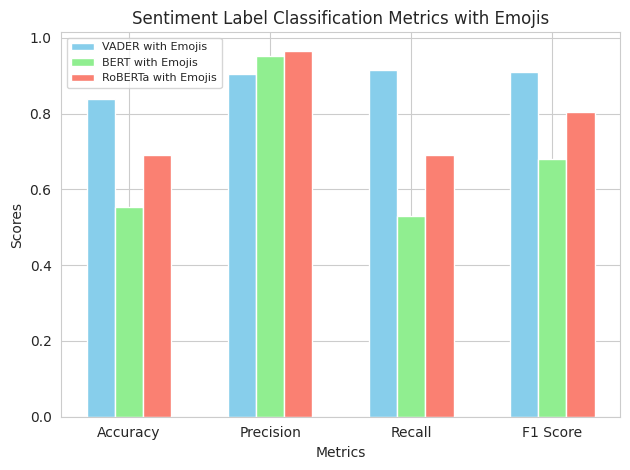

In [ ]:
# Create the DataFrame from the provided metrics
metrics_df = pd.DataFrame({
    'Model': ['VADER with Emojis', 'BERT with Emojis', 'RoBERTa with Emojis'],
    'Accuracy': [0.839068, 0.553829, 0.690344],
    'Precision': [0.905521, 0.953333, 0.966499],
    'Recall': [0.915633, 0.529630, 0.690191],
    'F1 Score': [0.910549, 0.680952, 0.805304]
})

# Define the metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['VADER with Emojis', 'BERT with Emojis', 'RoBERTa with Emojis']

# Set the colors for each model
colors = ['skyblue', 'lightgreen', 'salmon']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r = range(len(metrics))

# Plot the bars for each model and metric
for i, model in enumerate(models):
    plt.bar([x + bar_width * i for x in r], metrics_df.loc[metrics_df['Model'] == model, metrics].values[0],
            width=bar_width, color=colors[i], label=model)

# Add labels and title
plt.xlabel('Metrics', fontweight='light')
plt.ylabel('Scores', fontweight='light')
plt.title('Sentiment Label Classification Metrics with Emojis', fontweight='light')
plt.xticks([r + bar_width for r in range(len(metrics))], metrics)
plt.legend(prop={'size':8})

plt.tight_layout()
plt.show()


##Models excluding Emojis

In [ ]:
# Convert all label columns to lowercase for case-insensitive comparison
survey_df['VADER Labels without Emojis'] = survey_df['VADER Labels without Emojis'].str.lower()
survey_df['BERT Labels without Emojis'] = survey_df['BERT Labels without Emojis'].str.lower()
survey_df['RoBERTa Labels without Emojis'] = survey_df['RoBERTa Labels without Emojis'].str.lower()
survey_df['Survey Responses Labels'] = survey_df['Survey Responses Labels'].str.lower()

# Initialize counters for TP, FP, TN, and FN for each model
vader_TP, vader_FP, vader_TN, vader_FN = 0, 0, 0, 0
bert_TP, bert_FP, bert_TN, bert_FN = 0, 0, 0, 0
roberta_TP, roberta_FP, roberta_TN, roberta_FN = 0, 0, 0, 0

# Iterate over each row in the DataFrame
for index, row in survey_df.iterrows():
    # Extract labels for each model and the survey responses
    vader_label = row['VADER Labels without Emojis']
    bert_label = row['BERT Labels without Emojis']
    roberta_label = row['RoBERTa Labels without Emojis']
    survey_label = row['Survey Responses Labels']

    # Compare labels for each model with survey responses and update TP, FP, TN, FN counts
    if vader_label == survey_label:
        if vader_label == 'positive':
            vader_TP += 1
        else:
            vader_TN += 1
    else:
        if vader_label == 'positive':
            vader_FP += 1
        else:
            vader_FN += 1

    if bert_label == survey_label:
        if bert_label == 'positive':
            bert_TP += 1
        else:
            bert_TN += 1
    else:
        if bert_label == 'positive':
            bert_FP += 1
        else:
            bert_FN += 1

    if roberta_label == survey_label:
        if roberta_label == 'positive':
            roberta_TP += 1
        else:
            roberta_TN += 1
    else:
        if roberta_label == 'positive':
            roberta_FP += 1
        else:
            roberta_FN += 1

# Define TP, FP, TN, FN for VADER model
TP_vader = vader_TP
FP_vader = vader_FP
TN_vader = vader_TN
FN_vader = vader_FN

# Calculate accuracy for VADER model
accuracy_vader = (TP_vader + TN_vader) / (TP_vader + FP_vader + TN_vader + FN_vader)

# Calculate precision for VADER model
precision_vader = TP_vader / (TP_vader + FP_vader)

# Calculate recall for VADER model
recall_vader = TP_vader / (TP_vader + FN_vader)

# Calculate F1 score for VADER model
f1_score_vader = 2 * (precision_vader * recall_vader) / (precision_vader + recall_vader)

# Define TP, FP, TN, FN for RoBERTa model
TP_roberta = roberta_TP
FP_roberta = roberta_FP
TN_roberta = roberta_TN
FN_roberta = roberta_FN

# Calculate accuracy for RoBERTa model
accuracy_roberta = (TP_roberta + TN_roberta) / (TP_roberta + FP_roberta + TN_roberta + FN_roberta)

# Calculate precision for RoBERTa model
precision_roberta = TP_roberta / (TP_roberta + FP_roberta)

# Calculate recall for RoBERTa model
recall_roberta = TP_roberta / (TP_roberta + FN_roberta)

# Calculate F1 score for RoBERTa model
f1_score_roberta = 2 * (precision_roberta * recall_roberta) / (precision_roberta + recall_roberta)

# Define TP, FP, TN, FN for BERT model
TP_bert = bert_TP
FP_bert = bert_FP
TN_bert = bert_TN
FN_bert = bert_FN

# Calculate accuracy for BERT model
accuracy_bert = (TP_bert + TN_bert) / (TP_bert + FP_bert + TN_bert + FN_bert)

# Calculate precision for BERT model
precision_bert = TP_bert / (TP_bert + FP_bert)

# Calculate recall for BERT model
recall_bert = TP_bert / (TP_bert + FN_bert)

# Calculate F1 score for BERT model
f1_score_bert = 2 * (precision_bert * recall_bert) / (precision_bert + recall_bert)

# Define the scores and create df
scores = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df = pd.DataFrame(columns=scores)

# Add VADER model metrics to DataFrame
metrics_df.loc['VADER without Emojis'] = [accuracy_vader, precision_vader, recall_vader, f1_score_vader]

# Add BERT model metrics to DataFrame
metrics_df.loc['BERT without Emojis'] = [accuracy_bert, precision_bert, recall_bert, f1_score_bert]

# Add RoBERTa model metrics to DataFrame
metrics_df.loc['RoBERTa without Emojis'] = [accuracy_roberta, precision_roberta, recall_roberta, f1_score_roberta]

# Display the DataFrame
metrics_df


Accuracy  Precision    Recall  F1 Score
VADER without Emojis       0.469   0.887689  0.461798  0.607539
BERT without Emojis        0.603   0.918367  0.607424  0.731212
RoBERTa without Emojis     0.515   0.959276  0.475870  0.636159

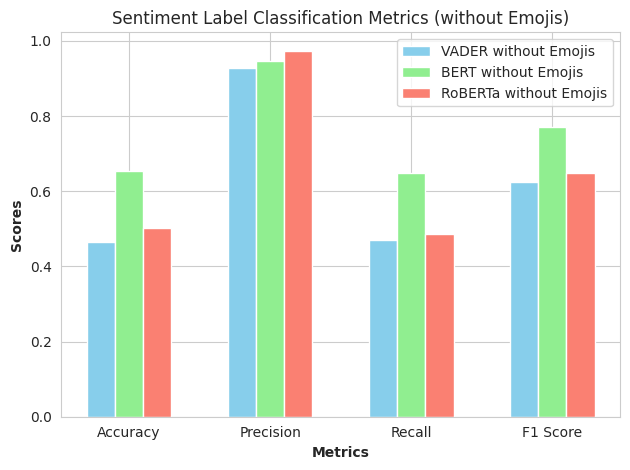

In [ ]:
# Create the DataFrame from the provided metrics
metrics_df = pd.DataFrame({
    'Model': ['VADER without Emojis', 'BERT without Emojis', 'RoBERTa without Emojis'],
    'Accuracy': [0.465039, 0.652608, 0.502775],
    'Precision': [0.928241, 0.947748, 0.974118],
    'Recall': [0.470657, 0.649383, 0.486486],
    'F1 Score': [0.624611, 0.770696, 0.648903]
})

# Define the metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['VADER without Emojis', 'BERT without Emojis', 'RoBERTa without Emojis']

# Set the colors for each model
colors = ['skyblue', 'lightgreen', 'salmon']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r = range(len(metrics))

# Plot the bars for each model and metric
for i, model in enumerate(models):
    plt.bar([x + bar_width * i for x in r], metrics_df.loc[metrics_df['Model'] == model, metrics].values[0],
            width=bar_width, color=colors[i], label=model)

# Add labels and title
plt.xlabel('Metrics', fontweight='light')
plt.ylabel('Scores', fontweight='light')
plt.title('Sentiment Label Classification Metrics (without Emojis)', fontweight='light')
plt.xticks([r + bar_width for r in range(len(metrics))], metrics)
plt.legend()

plt.tight_layout()
plt.show()


#Influencer evaluation using survey results

###Statistical Analysis

In [ ]:
# Group the DataFrame by 'Brand' and calculate the metrics for each group
metrics_df = survey_df.groupby('Brand')['Survey Responses Scores'].agg(['mean'])
metrics_df.columns = ['Survey Mean Score']

# Sort the DataFrame by 'Survey Mean Score' in descending order
metrics_df_sorted = metrics_df.sort_values(by='Survey Mean Score', ascending=False)

# Display the calculated metrics for each influencer
metrics_df_sorted


Survey Mean Score
Brand                             
karlconrad                0.822222
kaimanwong                0.782178
supersaf                  0.755020
austinnotduncan           0.708995
techunicorn               0.701754
ijustine                  0.650000
unboxtherapy              0.641791
linustech                 0.641026
mkbhd                     0.566667
techsmartt                0.489418

In [ ]:
# Calculate mean, mode, and standard deviation scores for each influencer brand
mean_scores = survey_df.groupby('Brand').mean()
mode_scores = survey_df.groupby('Brand').agg(lambda x: x.mode().iloc[0])
std_dev_scores = survey_df.groupby('Brand').std()

# Create a DataFrame to store the calculated metrics
metrics_df = pd.DataFrame({
    'Mean_Score_VADER': mean_scores['VADER Scores with Emojis'],
    'Mean_Score_BERT': mean_scores['BERT Scores with Emojis'],
    'Mean_Score_RoBERTa': mean_scores['RoBERTa Scores with Emojis'],

    'Mode_Score_VADER': mode_scores['VADER Scores with Emojis'],
    'Std_Dev_VADER': std_dev_scores['VADER Scores with Emojis'],

    'Mode_Score_BERT': mode_scores['BERT Scores with Emojis'],
    'Std_Dev_BERT': std_dev_scores['BERT Scores with Emojis'],
    'Mode_Score_RoBERTa': mode_scores['RoBERTa Scores with Emojis'],
    'Std_Dev_RoBERTa': std_dev_scores['RoBERTa Scores with Emojis']
})

# Rank influencer brands based on mean, mode, and standard deviation scores
for column in metrics_df.columns:
    # Sort influencer brands based on the respective metric in descending order
    sorted_brands = metrics_df[column].sort_values(ascending=False)

    # Create a new column in 'metrics_df' containing the ranked influencer brands
    metrics_df[f'Rank_{column}'] = sorted_brands

# Drop the original scores columns from the metrics_df
metrics_df.drop(['Mean_Score_VADER', 'Mean_Score_BERT', 'Mean_Score_RoBERTa',
                 'Mode_Score_VADER', 'Mode_Score_BERT', 'Mode_Score_RoBERTa',
                 'Std_Dev_VADER', 'Std_Dev_BERT', 'Std_Dev_RoBERTa'], axis=1, inplace=True)

# Display the ranked DataFrame
metrics_df


<ipython-input-65-785abd3f9708>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = survey_df.groupby('Brand').mean()
<ipython-input-65-785abd3f9708>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_dev_scores = survey_df.groupby('Brand').std()


Rank_Mean_Score_VADER  Rank_Mean_Score_BERT  \
Brand                                                          
austinnotduncan               0.170348             -0.290997   
ijustine                      0.421088              0.013488   
kaimanwong                    0.246337             -0.078587   
karlconrad                    0.365951              0.089274   
linustech                     0.220433             -0.208384   
mkbhd                         0.248465             -0.182958   
supersaf                      0.389047              0.140296   
techsmartt                    0.270257             -0.050812   
techunicorn                   0.354906              0.016283   
unboxtherapy                  0.345223              0.001059   

                 Rank_Mean_Score_RoBERTa  Rank_Mode_Score_VADER  \
Brand                                                             
austinnotduncan                 0.565281               0.056969   
ijustine                        0.609078               0.056969   
kaimanwong                      0.664575               0.056969   
karlconrad                      0.793117               0.035867   
linustech                       0.481722               0.056969   
mkbhd                           0.446054               0.056969   
supersaf                        0.721238               0.056969   
techsmartt                      0.515522               0.056969   
techunicorn                     0.726216               0.035867   
unboxtherapy                    0.707133               0.056969   

                 Rank_Std_Dev_VADER  Rank_Mode_Score_BERT  Rank_Std_Dev_BERT  \
Brand                                                                          
austinnotduncan            0.346469             -0.999565           0.896266   
ijustine                   0.348881             -0.697057           0.959991   
kaimanwong                 0.396728             -0.697057           0.949720   
karlconrad                 0.292564             -0.697057           0.936854   
linustech                  0.360023             -0.697057           0.925319   
mkbhd                      0.371500             -0.697057           0.933247   
supersaf                   0.359427             -0.785059           0.936954   
techsmartt                 0.323158             -0.697057           0.900652   
techunicorn                0.342239             -0.697057           0.931282   
unboxtherapy               0.334196             -0.697057           0.942079   

                 Rank_Mode_Score_RoBERTa  Rank_Std_Dev_RoBERTa  
Brand                                                           
austinnotduncan                -0.905460              0.541453  
ijustine                       -0.927791              0.574449  
kaimanwong                     -0.930857              0.510448  
karlconrad                     -0.769227              0.380283  
linustech                      -0.935612              0.626865  
mkbhd                          -0.907372              0.653599  
supersaf                       -0.930853              0.423558  
techsmartt                     -0.948698              0.641977  
techunicorn                    -0.917731              0.451967  
unboxtherapy                    0.952165              0.446110

In [ ]:
# Calculate mean, mode, and standard deviation scores for each influencer brand
mean_scores = survey_df.groupby('Brand').mean()
mode_scores = survey_df.groupby('Brand').agg(lambda x: x.mode().iloc[0])
std_dev_scores = survey_df.groupby('Brand').std()

# Create a DataFrame to store the calculated metrics
metrics_df = pd.DataFrame({
    'Mean_Score_VADER': mean_scores['VADER Scores with Emojis'],
    'Mean_Score_BERT': mean_scores['BERT Scores with Emojis'],
    'Mean_Score_RoBERTa': mean_scores['RoBERTa Scores with Emojis'],

    'Mode_Score_VADER': mode_scores['VADER Scores with Emojis'],
    'Std_Dev_VADER (decending)': std_dev_scores['VADER Scores with Emojis'],

    'Mode_Score_BERT': mode_scores['BERT Scores with Emojis'],
    'Std_Dev_BERT': std_dev_scores['BERT Scores with Emojis'],
    'Mode_Score_RoBERTa': mode_scores['RoBERTa Scores with Emojis'],
    'Std_Dev_RoBERTa': std_dev_scores['RoBERTa Scores with Emojis']
})

# Rank influencer brands based on mean, mode, and standard deviation scores
for column in metrics_df.columns:
    # Sort influencer brands based on the respective metric in descending order
    sorted_brands = metrics_df[column].sort_values(ascending=False).index

    # Create a new column in 'metrics_df' containing the ranked influencer brands
    metrics_df[f'Rank_{column}'] = sorted_brands

# Create 'brands_ranked' DataFrame containing the rankings
brands_ranked = metrics_df.filter(like='Rank_')
brands_ranked = brands_ranked.rename(columns={
    'Rank_Mean_Score_VADER': 'Influencers Ranked by VADER Mean Scores',
    'Rank_Mean_Score_BERT': 'Influencers Ranked by BERT Mean Scores',
    'Rank_Mean_Score_RoBERTa': 'Influencers Ranked by RoBERTa Mean Scores'

})

# Calculate mean survey scores for each brand
mean_survey_scores = survey_df.groupby('Brand')['Survey Responses Scores'].mean()

# Sort the brands based on mean survey scores
sorted_brands_survey = mean_survey_scores.sort_values(ascending=False).index

# Create a new column in 'brands_ranked' containing the ranked influencer brands based on survey scores
brands_ranked['Influencers Ranked by Survey Scores'] = sorted_brands_survey
cols = list(brands_ranked.columns)
cols = ['Influencers Ranked by Survey Scores'] + [col for col in cols if col != 'Brands Ranked by Survey Scores']
brands_ranked = brands_ranked[cols]
# Display the ranked DataFrame
brands_ranked.insert(0, 'Rank', range(1, 11))
brands_ranked

<ipython-input-100-9aaa231d50fb>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = survey_df.groupby('Brand').mean()
<ipython-input-100-9aaa231d50fb>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_dev_scores = survey_df.groupby('Brand').std()


Rank Influencers Ranked by Survey Scores  \
Brand                                                       
austinnotduncan     1                          karlconrad   
ijustine            2                          kaimanwong   
kaimanwong          3                            supersaf   
karlconrad          4                     austinnotduncan   
linustech           5                         techunicorn   
mkbhd               6                            ijustine   
supersaf            7                        unboxtherapy   
techsmartt          8                           linustech   
techunicorn         9                               mkbhd   
unboxtherapy       10                          techsmartt   

                Influencers Ranked by VADER Mean Scores  \
Brand                                                     
austinnotduncan                                ijustine   
ijustine                                       supersaf   
kaimanwong                                   karlconrad   
karlconrad                                  techunicorn   
linustech                                  unboxtherapy   
mkbhd                                        techsmartt   
supersaf                                          mkbhd   
techsmartt                                   kaimanwong   
techunicorn                                   linustech   
unboxtherapy                            austinnotduncan   

                Influencers Ranked by BERT Mean Scores  \
Brand                                                    
austinnotduncan                               supersaf   
ijustine                                    karlconrad   
kaimanwong                                 techunicorn   
karlconrad                                    ijustine   
linustech                                 unboxtherapy   
mkbhd                                       techsmartt   
supersaf                                    kaimanwong   
techsmartt                                       mkbhd   
techunicorn                                  linustech   
unboxtherapy                           austinnotduncan   

                Influencers Ranked by RoBERTa Mean Scores  \
Brand                                                       
austinnotduncan                                karlconrad   
ijustine                                      techunicorn   
kaimanwong                                       supersaf   
karlconrad                                   unboxtherapy   
linustech                                      kaimanwong   
mkbhd                                            ijustine   
supersaf                                  austinnotduncan   
techsmartt                                     techsmartt   
techunicorn                                     linustech   
unboxtherapy                                        mkbhd   

                Rank_Mode_Score_VADER Rank_Std_Dev_VADER (decending)  \
Brand                                                                  
austinnotduncan       austinnotduncan                     kaimanwong   
ijustine                     ijustine                          mkbhd   
kaimanwong                 kaimanwong                      linustech   
karlconrad                  linustech                       supersaf   
linustech                       mkbhd                       ijustine   
mkbhd                        supersaf                austinnotduncan   
supersaf                   techsmartt                    techunicorn   
techsmartt               unboxtherapy                   unboxtherapy   
techunicorn                karlconrad                     techsmartt   
unboxtherapy              techunicorn                     karlconrad   

                Rank_Mode_Score_BERT Rank_Std_Dev_BERT  \
Brand                                                    
austinnotduncan             ijustine          ijustine   
ijustine                  kaimanwong        kaimanwong   
kaimanwong                karlconrad      unboxt

In [ ]:
# Calculate mean, mode, and standard deviation scores for each influencer brand
mean_scores = survey_df.groupby('Brand').mean()
mode_scores = survey_df.groupby('Brand').agg(lambda x: x.mode().iloc[0])
std_dev_scores = survey_df.groupby('Brand').std()

# Create a DataFrame to store the calculated metrics
metrics_df = pd.DataFrame({
    'Mean_Score_VADER': mean_scores['VADER Scores with Emojis'],
    'Mean_Score_BERT': mean_scores['BERT Scores with Emojis'],
    'Mean_Score_RoBERTa': mean_scores['RoBERTa Scores with Emojis'],

    'Mode_Score_VADER': mode_scores['VADER Scores with Emojis'],
    'Std_Dev_VADER (decending)': std_dev_scores['VADER Scores with Emojis'],

    'Mode_Score_BERT': mode_scores['BERT Scores with Emojis'],
    'Std_Dev_BERT': std_dev_scores['BERT Scores with Emojis'],
    'Mode_Score_RoBERTa': mode_scores['RoBERTa Scores with Emojis'],
    'Std_Dev_RoBERTa': std_dev_scores['RoBERTa Scores with Emojis']
})

# Rank influencer brands based on mean, mode, and standard deviation scores
for column in metrics_df.columns:
    # Sort influencer brands based on the respective metric in descending order
    sorted_brands = metrics_df[column].sort_values(ascending=False).index

    # Create a new column in 'metrics_df' containing the ranked influencer brands
    metrics_df[f'Rank_{column}'] = sorted_brands

# Create 'brands_ranked' DataFrame containing the rankings
brands_ranked = metrics_df.filter(like='Rank_')
brands_ranked = brands_ranked.rename(columns={
    'Rank_Mean_Score_VADER': 'Influencers Ranked by VADER Mean Scores',
    'Rank_Mean_Score_BERT': 'Influencers Ranked by BERT Mean Scores',
    'Rank_Mean_Score_RoBERTa': 'Influencers Ranked by RoBERTa Mean Scores'

})

# Calculate mean survey scores for each brand
mean_survey_scores = survey_df.groupby('Brand')['Survey Responses Scores'].mean()

# Sort the brands based on mean survey scores
sorted_brands_survey = mean_survey_scores.sort_values(ascending=False).index

# Create a new column in 'brands_ranked' containing the ranked influencer brands based on survey scores
brands_ranked['Influencers Ranked by Survey Scores'] = sorted_brands_survey
cols = list(brands_ranked.columns)
cols = ['Influencers Ranked by Survey Scores'] + [col for col in cols if col != 'Brands Ranked by Survey Scores']
brands_ranked = brands_ranked[cols]
# Display the ranked DataFrame
brands_ranked.insert(0, 'Rank', range(1, 11))
brands_ranked

<ipython-input-132-f99baa408310>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = survey_df.groupby('Brand').mean()
<ipython-input-132-f99baa408310>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_dev_scores = survey_df.groupby('Brand').std()


Rank Influencers Ranked by Survey Scores  \
Brand                                                       
austinnotduncan     1                          karlconrad   
ijustine            2                          kaimanwong   
kaimanwong          3                            supersaf   
karlconrad          4                     austinnotduncan   
linustech           5                         techunicorn   
mkbhd               6                            ijustine   
supersaf            7                        unboxtherapy   
techsmartt          8                           linustech   
techunicorn         9                               mkbhd   
unboxtherapy       10                          techsmartt   

                Influencers Ranked by VADER Mean Scores  \
Brand                                                     
austinnotduncan                                ijustine   
ijustine                                       supersaf   
kaimanwong                                 unboxtherapy   
karlconrad                                   karlconrad   
linustech                                   techunicorn   
mkbhd                                             mkbhd   
supersaf                                     techsmartt   
techsmartt                                   kaimanwong   
techunicorn                                   linustech   
unboxtherapy                            austinnotduncan   

                Influencers Ranked by BERT Mean Scores  \
Brand                                                    
austinnotduncan                               supersaf   
ijustine                                  unboxtherapy   
kaimanwong                                  karlconrad   
karlconrad                                 techunicorn   
linustech                                     ijustine   
mkbhd                                       techsmartt   
supersaf                                    kaimanwong   
techsmartt                                       mkbhd   
techunicorn                                  linustech   
unboxtherapy                           austinnotduncan   

                Influencers Ranked by RoBERTa Mean Scores  \
Brand                                                       
austinnotduncan                                karlconrad   
ijustine                                     unboxtherapy   
kaimanwong                                    techunicorn   
karlconrad                                       supersaf   
linustech                                      kaimanwong   
mkbhd                                            ijustine   
supersaf                                  austinnotduncan   
techsmartt                                          mkbhd   
techunicorn                                     linustech   
unboxtherapy                                   techsmartt   

                Rank_Mode_Score_VADER Rank_Std_Dev_VADER (decending)  \
Brand                                                                  
austinnotduncan       austinnotduncan                     kaimanwong   
ijustine                     ijustine                      linustech   
kaimanwong                 kaimanwong                       supersaf   
karlconrad                  linustech                    techunicorn   
linustech                       mkbhd                          mkbhd   
mkbhd                        supersaf                       ijustine   
supersaf                   techsmartt                     techsmartt   
techsmartt               unboxtherapy                austinnotduncan   
techunicorn                karlconrad                   unboxtherapy   
unboxtherapy              techunicorn                     karlconrad   

                Rank_Mode_Score_BERT Rank_Std_Dev_BERT  \
Brand                                                    
austinnotduncan             ijustine          ijustine   
ijustine                  kaimanwong        kaimanwong   
kaimanwong                karlconrad            

In [ ]:
metrics_df

Mean_Score_VADER  Mean_Score_BERT  Mean_Score_RoBERTa  \
Brand                                                                    
austinnotduncan          0.200292        -0.275524            0.614113   
ijustine                 0.407659         0.035678            0.644601   
kaimanwong               0.259109        -0.054574            0.686623   
karlconrad               0.378459         0.089871            0.796935   
linustech                0.226270        -0.150127            0.496386   
mkbhd                    0.295030        -0.104202            0.497331   
supersaf                 0.396056         0.205752            0.741637   
techsmartt               0.279320        -0.030118            0.493948   
techunicorn              0.363834         0.051377            0.763379   
unboxtherapy             0.391779         0.110040            0.769959   

                 Mode_Score_VADER  Std_Dev_VADER (decending)  Mode_Score_BERT  \
Brand                                                                           
austinnotduncan          0.056969                   0.332030        -0.999565   
ijustine                 0.056969                   0.337534         0.999748   
kaimanwong               0.056969                   0.400296        -0.697057   
karlconrad               0.035867                   0.294570        -0.697057   
linustech                0.056969                   0.368672        -0.697057   
mkbhd                    0.056969                   0.343775        -0.697057   
supersaf                 0.056969                   0.360242        -0.785059   
techsmartt               0.056969                   0.336614        -0.697057   
techunicorn              0.035867                   0.347239        -0.697057   
unboxtherapy             0.056969                   0.319005        -0.697057   

                 Std_Dev_BERT  Mode_Score_RoBERTa  Std_Dev_RoBERTa  \
Brand                                                                
austinnotduncan      0.896548           -0.905460         0.483816   
ijustine             0.959181           -0.927791         0.546125   
kaimanwong           0.952140           -0.930857         0.488796   
karlconrad           0.940639           -0.769227         0.388543   
linustech            0.935268           -0.935612         0.624205   
mkbhd                0.943655           -0.907372         0.626603   
supersaf             0.923494           -0.930853         0.402193   
techsmartt           0.906217           -0.948698         0.667253   
techunicorn          0.929117           -0.917731         0.422174   
unboxtherapy         0.939865            0.952165         0.390139   

                Rank_Mean_Score_VADER Rank_Mean_Score_BERT  \
Brand                                                        
austinnotduncan              ijustine             supersaf   
ijustine                     supersaf         unboxtherapy   
kaimanwong               unboxtherapy           karlconrad   
karlconrad                 karlconrad          techunicorn   
linustech                 techunicorn             ijustine   
mkbhd                           mkbhd           techsmartt   
supersaf                   techsmartt           kaimanwong   
techsmartt                 kaimanwong                mkbhd   
techunicorn                 linustech            linustech   
unboxtherapy          austinnotduncan      austinnotduncan   

                Rank_Mean_Score_RoBERTa Rank_Mode_Score_VADER  \
Brand                                                           
austinnotduncan              karlconrad       austinnotduncan   
ijustine                   unboxtherapy              ijustine   
kaimanwong                  techunicorn            kaimanwong   
karlconrad                     supersaf             linustech   
linustech                    kaimanwong                 mkbhd   
mkbhd                          ijustine              supersaf   
supersaf                austinnotduncan          

In [ ]:
# Selecting only the relevant columns for mean scores
mean_scores = survey_df[['VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis', 'Survey Responses Scores']]

# Calculate mean scores for each influencer brand
mean_scores = mean_scores.groupby(survey_df['Brand']).mean()

# Rank influencer brands based on mean scores
rankings = mean_scores.rank(ascending=False)

# Create 'brands_ranked' DataFrame containing the rankings
brands_ranked = pd.DataFrame(index=mean_scores.index)
brands_ranked['Rank'] = range(1, len(mean_scores) + 1)

# Add rankings based on mean scores
for column in mean_scores.columns:
    column_name = column.split('_')[0]  # Extracting model name from column name
    brands_ranked[f'Influencers Ranked by {column_name} Mean Scores'] = rankings[column].values

# Display the ranked DataFrame
brands_ranked


Rank  \
Brand                   
austinnotduncan     1   
ijustine            2   
kaimanwong          3   
karlconrad          4   
linustech           5   
mkbhd               6   
supersaf            7   
techsmartt          8   
techunicorn         9   
unboxtherapy       10   

                 Influencers Ranked by VADER Scores with Emojis Mean Scores  \
Brand                                                                         
austinnotduncan                                               10.0            
ijustine                                                       1.0            
kaimanwong                                                     8.0            
karlconrad                                                     4.0            
linustech                                                      9.0            
mkbhd                                                          6.0            
supersaf                                                       2.0            
techsmartt                                                     7.0            
techunicorn                                                    5.0            
unboxtherapy                                                   3.0            

                 Influencers Ranked by BERT Scores with Emojis Mean Scores  \
Brand                                                                        
austinnotduncan                                               10.0           
ijustine                                                       5.0           
kaimanwong                                                     7.0           
karlconrad                                                     3.0           
linustech                                                      9.0           
mkbhd                                                          8.0           
supersaf                                                       1.0           
techsmartt                                                     6.0           
techunicorn                                                    4.0           
unboxtherapy                                                   2.0           

                 Influencers Ranked by RoBERTa Scores with Emojis Mean Scores  \
Brand                                                                           
austinnotduncan                                                7.0              
ijustine                                                       6.0              
kaimanwong                                                     5.0              
karlconrad                                                     1.0              
linustech                                                      9.0              
mkbhd                                                          8.0              
supersaf                                                       4.0              
techsmartt                                                    10.0              
techunicorn                                                    3.0              
unboxtherapy                                                   2.0              

                 Influencers Ranked by Survey Responses Scores Mean Scores  
Brand                                                                       
austinnotduncan                                                4.0          
ijustine                                                       6.0          
kaimanwong                                                     2.0          
karlconrad                                                     1.0          
linustech                                                      8.0          
mkbhd                                                          9.0          
supersaf                                                       3.0          
techsmartt                                                    10.0          
techunicorn                                                    5.0          
unboxthera

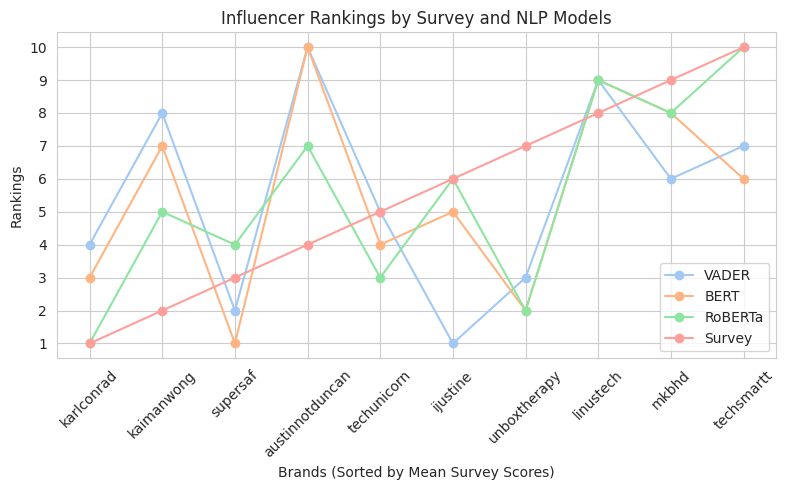

In [ ]:
# Sort brands_ranked DataFrame based on survey scores
sorted_brands_ranked = brands_ranked.sort_values(by='Influencers Ranked by Survey Responses Scores Mean Scores')

# Set Seaborn style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Data for the line chart
brands = sorted_brands_ranked.index.tolist()  # Brands sorted by survey scores
vader_ranks = sorted_brands_ranked['Influencers Ranked by VADER Scores with Emojis Mean Scores'].tolist()
bert_ranks = sorted_brands_ranked['Influencers Ranked by BERT Scores with Emojis Mean Scores'].tolist()
roberta_ranks = sorted_brands_ranked['Influencers Ranked by RoBERTa Scores with Emojis Mean Scores'].tolist()
survey_ranks = sorted_brands_ranked['Influencers Ranked by Survey Responses Scores Mean Scores'].tolist()

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(brands, vader_ranks, marker='o', label='VADER', color=palette[0])
plt.plot(brands, bert_ranks, marker='o', label='BERT', color=palette[1])
plt.plot(brands, roberta_ranks, marker='o', label='RoBERTa', color=palette[2])
plt.plot(brands, survey_ranks, marker='o', label='Survey', color=palette[3])

# Adding labels and title
plt.xlabel('Influencers (Sorted by Mean Survey Scores)')
plt.ylabel('Rankings')
plt.title('Influencer Rankings by Survey and NLP Models')
plt.xticks(rotation=45)
plt.yticks(range(1, len(brands) + 1))  # Setting y-axis labels from 1 to the number of brands
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
mean_scores

Brand  VADER Scores with Emojis  BERT Scores with Emojis  \
0  austinnotduncan                  0.708995                 1.123952   
1         ijustine                  0.650000                 3.044950   
2       kaimanwong                  0.782178                 1.513020   
3       karlconrad                  0.822222                 2.207222   
4        linustech                  0.641026                 1.225885   
5            mkbhd                  0.566667                 1.758713   
6         supersaf                  0.755020                 2.415476   
7       techsmartt                  0.489418                 1.422087   
8      techunicorn                  0.701754                 2.018987   
9     unboxtherapy                  0.641791                 2.850806   

   RoBERTa Scores with Emojis  Survey Responses Scores  
0                    0.200292                 0.632130  
1                    0.407659                 0.696709  
2                    0.259109                 0.364938  
3                    0.378459                 0.289311  
4                    0.226270                 0.331114  
5                    0.295030                 0.156243  
6                    0.396056                 0.289311  
7                    0.279320                 0.331114  
8                    0.363834                 0.156243  
9                    0.391779                 0.289311

In [ ]:
# Create separate columns for each sentiment score metric containing the influencer brands sorted by mean sentiment score
for column in [ 'VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']:
    # Calculate the mean sentiment score for each influencer brand
    mean_scores = comments_df.groupby('Brand')[column].mean()

    # Sort the influencer brands based on the mean sentiment score in descending order
    sorted_brands = mean_scores.sort_values(ascending=False).index

    # Create a new column in 'metrics_df' containing the sorted influencer brands
    metrics_df[f'Brand {column.split()[0]}'] = sorted_brands

# Display the updated DataFrame
metrics_df


Mean Sentiment Score  Median Sentiment Score  \
Brand                                                           
austinnotduncan              0.708995                0.666667   
ijustine                     0.650000                1.000000   
kaimanwong                   0.782178                1.000000   
karlconrad                   0.822222                1.000000   
linustech                    0.641026                0.666667   
mkbhd                        0.566667                0.666667   
supersaf                     0.755020                1.000000   
techsmartt                   0.489418                0.833333   
techunicorn                  0.701754                1.000000   
unboxtherapy                 0.641791                1.000000   

                 Standard Deviation (SD)  Range of Sentiment Score  \
Brand                                                                
austinnotduncan                 0.429604                  2.000000   
ijustine                        0.524773                  1.666667   
kaimanwong                      0.357260                  2.000000   
karlconrad                      0.357547                  1.666667   
linustech                       0.484380                  2.000000   
mkbhd                           0.586774                  2.000000   
supersaf                        0.376353                  2.000000   
techsmartt                      0.726252                  2.000000   
techunicorn                     0.463733                  2.000000   
unboxtherapy                    0.589794                  2.000000   

                     Brand VADER       Brand BERT    Brand RoBERTa  
Brand                                                               
austinnotduncan         supersaf       karlconrad       karlconrad  
ijustine              kaimanwong       kaimanwong       kaimanwong  
kaimanwong              ijustine      techunicorn         supersaf  
karlconrad           techunicorn         ijustine      techunicorn  
linustech             karlconrad         supersaf         ijustine  
mkbhd               unboxtherapy     unboxtherapy     unboxtherapy  
supersaf                   mkbhd  austinnotduncan  austinnotduncan  
techsmartt            techsmartt       techsmartt       techsmartt  
techunicorn      austinnotduncan            mkbhd        linustech  
unboxtherapy           linustech        linustech            mkbhd

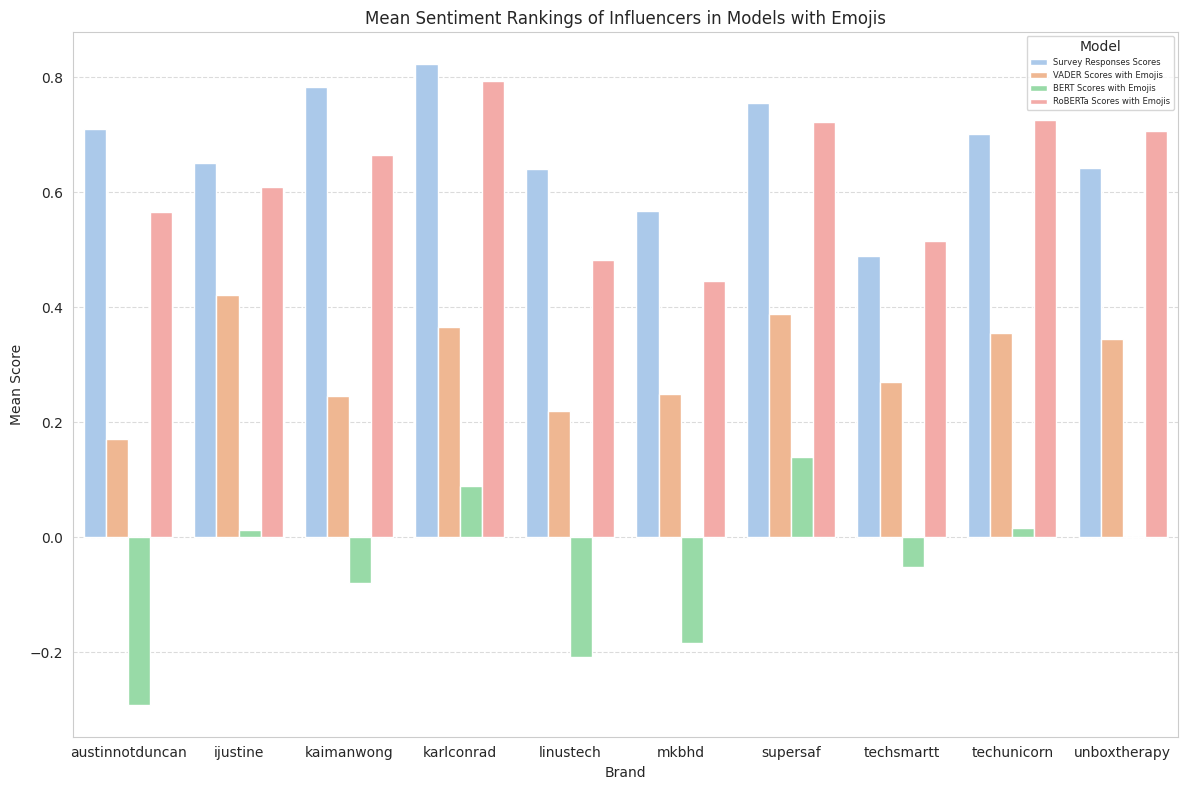

In [ ]:
# Select relevant columns
columns_of_interest = ['Brand', 'Survey Responses Scores', 'VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Create a copy of the DataFrame with selected columns
data_for_plot = survey_df[columns_of_interest].copy()

# Group the scores by brand and calculate the mean
grouped_data = data_for_plot.groupby('Brand').mean().reset_index()

# Melt the DataFrame to have a single column for the scores and another for the models
melted_data = pd.melt(grouped_data, id_vars=['Brand'], var_name='Model', value_name='Mean Score')

# Define a seaborn color palette with pastel colors
pastel_palette = sns.color_palette("pastel", len(columns_of_interest) - 1)  # Exclude 'Brand' column

# Create a dictionary to map models to pastel colors
palette_dict = {model: pastel_palette[i] for i, model in enumerate(columns_of_interest[1:])}  # Exclude 'Brand' column

# Plot the bar chart with lines connecting the tops of the bars
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x='Brand', y='Mean Score', hue='Model', data=melted_data, palette=palette_dict, dodge=0.9)  # Adjust dodge parameter
plt.title('Mean Sentiment Rankings of Influencers in Models with Emojis')
plt.xlabel('Brand')
plt.ylabel('Mean Score')
plt.xticks()
plt.legend(title='Model', prop={'size': 6})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


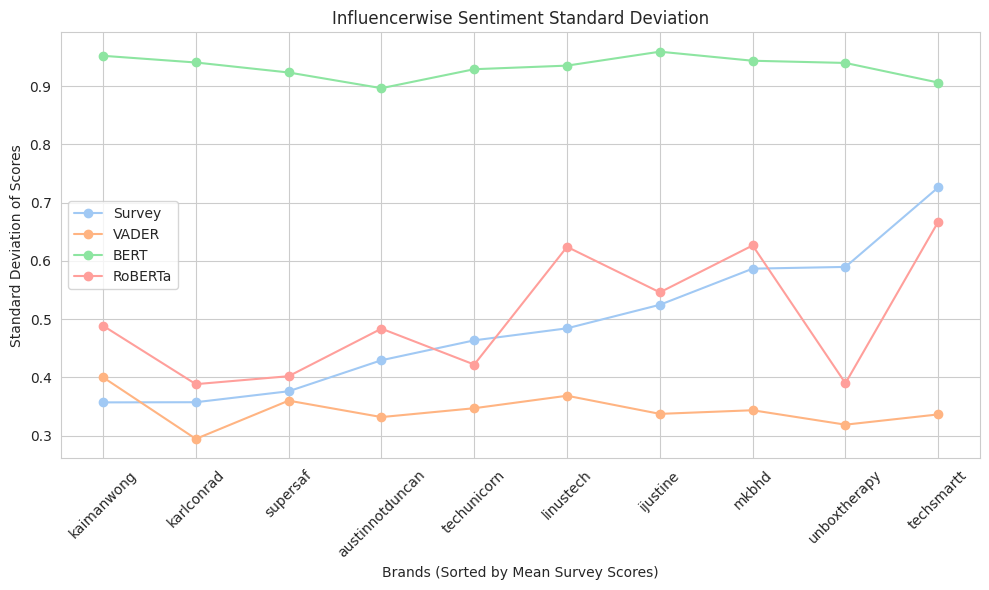

In [ ]:
# Select relevant columns
columns_of_interest = ['Brand', 'Survey Responses Scores', 'VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Create a copy of the DataFrame with selected columns
data_for_plot = survey_df[columns_of_interest].copy()

# Group the scores by brand and calculate the standard deviation
grouped_data = data_for_plot.groupby('Brand').std()

# Sort the grouped data by survey scores
sorted_grouped_data = grouped_data.loc[grouped_data.index.intersection(sorted_brands_ranked.index)]
sorted_grouped_data = sorted_grouped_data.sort_values(by='Survey Responses Scores')  # Sorting by survey scores

# Set Seaborn style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Data for the line chart
brands = sorted_grouped_data.index.tolist()  # Brands sorted by survey scores
survey_std_dev = sorted_grouped_data['Survey Responses Scores'].tolist()
vader_std_dev = sorted_grouped_data['VADER Scores with Emojis'].tolist()
bert_std_dev = sorted_grouped_data['BERT Scores with Emojis'].tolist()
roberta_std_dev = sorted_grouped_data['RoBERTa Scores with Emojis'].tolist()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(brands, survey_std_dev, marker='o', label='Survey', color=palette[0])
plt.plot(brands, vader_std_dev, marker='o', label='VADER', color=palette[1])
plt.plot(brands, bert_std_dev, marker='o', label='BERT', color=palette[2])
plt.plot(brands, roberta_std_dev, marker='o', label='RoBERTa', color=palette[3])

# Adding labels and title
plt.xlabel('Brands (Sorted by Mean Survey Scores)')
plt.ylabel('Standard Deviation of Scores')
plt.title('Influencerwise Sentiment Standard Deviation')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


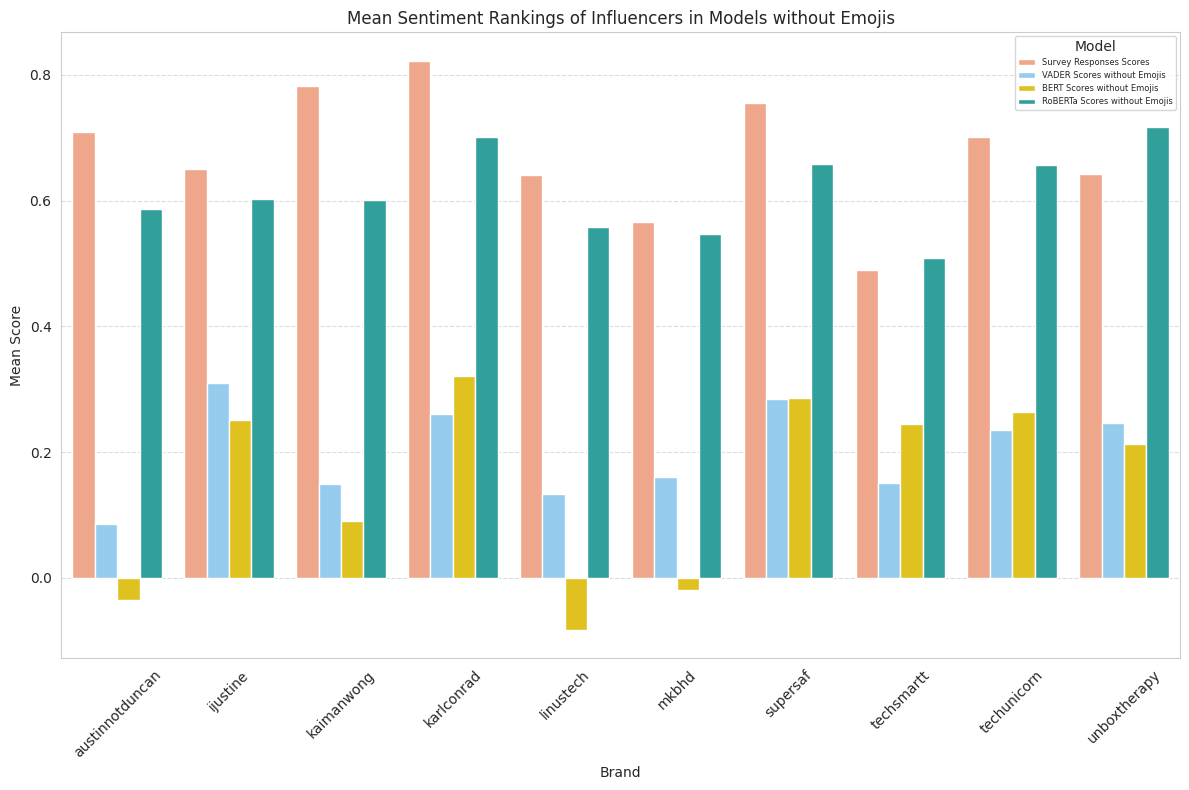

In [ ]:
# Select relevant columns for models without emojis
columns_of_interest_no_emojis = ['Brand', 'Survey Responses Scores', 'VADER Scores without Emojis', 'BERT Scores without Emojis', 'RoBERTa Scores without Emojis']

# Create a copy of the DataFrame with selected columns for models without emojis
data_for_plot_no_emojis = survey_df[columns_of_interest_no_emojis].copy()

# Group the scores by brand and calculate the mean for models without emojis
grouped_data_no_emojis = data_for_plot_no_emojis.groupby('Brand').mean().reset_index()

# Melt the DataFrame to have a single column for the scores and another for the models for models without emojis
melted_data_no_emojis = pd.melt(grouped_data_no_emojis, id_vars=['Brand'], var_name='Model', value_name='Mean Score')

# Define a seaborn color palette with different colors but the same tone
custom_palette = ['#FFA07A', '#87CEFA', '#FFD700', '#20B2AA']  # Custom colors from pastel palette

# Create a dictionary to map models to colors for models without emojis
palette_dict_no_emojis = {model: custom_palette[i] for i, model in enumerate(columns_of_interest_no_emojis[1:])}  # Exclude 'Brand' column

# Plot the bar chart with lines connecting the tops of the bars for models without emojis
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x='Brand', y='Mean Score', hue='Model', data=melted_data_no_emojis, palette=palette_dict_no_emojis, dodge=0.9)  # Adjust dodge parameter
plt.title('Mean Sentiment Rankings of Influencers in Models without Emojis')
plt.xlabel('Brand')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Model', prop={'size': 6})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Selecting only the relevant columns for mean scores
sim_mean_scores = survey_df[['VADER Scores without Emojis', 'BERT Scores without Emojis', 'RoBERTa Scores without Emojis', 'Survey Responses Scores']]

# Calculate mean scores for each influencer brand
sim_mean_scores = sim_mean_scores.groupby(survey_df['Brand']).mean()

# Rank influencer brands based on mean scores
rankings = sim_mean_scores.rank(ascending=False)

# Create 'brands_ranked' DataFrame containing the rankings
brands_ranked = pd.DataFrame(index=sim_mean_scores.index)
brands_ranked['Rank'] = range(1, len(sim_mean_scores) + 1)

# Add rankings based on mean scores
for column in sim_mean_scores.columns:
    column_name = column.split('_')[0]  # Extracting model name from column name
    brands_ranked[f'Influencers Ranked by {column_name} Mean Scores without Emojis'] = rankings[column].values

# Display the ranked DataFrame
brands_ranked

Rank  \
Brand                   
austinnotduncan     1   
ijustine            2   
kaimanwong          3   
karlconrad          4   
linustech           5   
mkbhd               6   
supersaf            7   
techsmartt          8   
techunicorn         9   
unboxtherapy       10   

                 Influencers Ranked by VADER Scores without Emojis Mean Scores without Emojis  \
Brand                                                                                           
austinnotduncan                                               10.0                              
ijustine                                                       1.0                              
kaimanwong                                                     8.0                              
karlconrad                                                     3.0                              
linustech                                                      9.0                              
mkbhd                                                          6.0                              
supersaf                                                       2.0                              
techsmartt                                                     7.0                              
techunicorn                                                    5.0                              
unboxtherapy                                                   4.0                              

                 Influencers Ranked by BERT Scores without Emojis Mean Scores without Emojis  \
Brand                                                                                          
austinnotduncan                                                9.0                             
ijustine                                                       4.0                             
kaimanwong                                                     7.0                             
karlconrad                                                     1.0                             
linustech                                                     10.0                             
mkbhd                                                          8.0                             
supersaf                                                       2.0                             
techsmartt                                                     5.0                             
techunicorn                                                    3.0                             
unboxtherapy                                                   6.0                             

                 Influencers Ranked by RoBERTa Scores without Emojis Mean Scores without Emojis  \
Brand                                                                                             
austinnotduncan                                                7.0                                
ijustine                                                       5.0                                
kaimanwong                                                     6.0                                
karlconrad                                                     2.0                                
linustech                                                      8.0                                
mkbhd                                                          9.0                                
supersaf                                                       3.0                                
techsmartt                                                    10.0                                
techunicorn                                                    4.0                                
unboxtherapy                                                   1.0                                

                 Influencers Ranked by Survey Responses Scores Mean Scores without Emojis  
Brand                                                                                      
austinnotduncan          

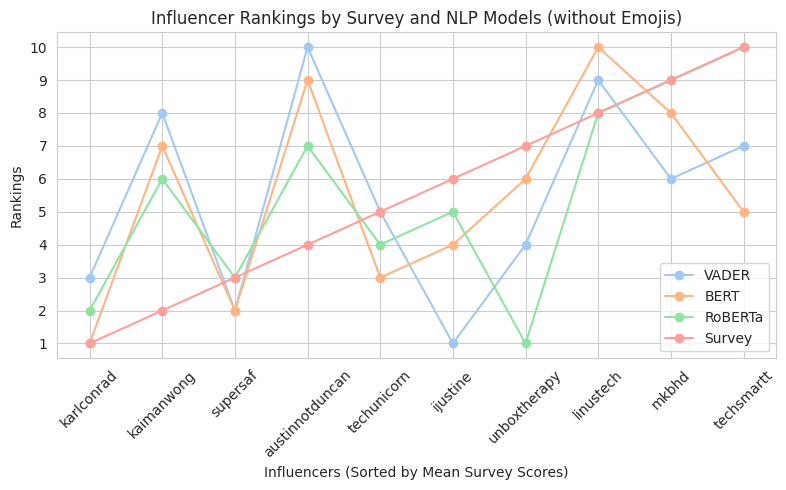

In [ ]:
# Sort brands_ranked DataFrame based on survey scores
sorted_brands_ranked = brands_ranked.sort_values(by='Influencers Ranked by Survey Responses Scores Mean Scores without Emojis')

# Set Seaborn style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Data for the line chart
brands = sorted_brands_ranked.index.tolist()  # Brands sorted by survey scores
vader_ranks = sorted_brands_ranked['Influencers Ranked by VADER Scores without Emojis Mean Scores without Emojis'].tolist()
bert_ranks = sorted_brands_ranked['Influencers Ranked by BERT Scores without Emojis Mean Scores without Emojis'].tolist()
roberta_ranks = sorted_brands_ranked['Influencers Ranked by RoBERTa Scores without Emojis Mean Scores without Emojis'].tolist()
survey_ranks = sorted_brands_ranked['Influencers Ranked by Survey Responses Scores Mean Scores without Emojis'].tolist()

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(brands, vader_ranks, marker='o', label='VADER', color=palette[0])
plt.plot(brands, bert_ranks, marker='o', label='BERT', color=palette[1])
plt.plot(brands, roberta_ranks, marker='o', label='RoBERTa', color=palette[2])
plt.plot(brands, survey_ranks, marker='o', label='Survey', color=palette[3])

# Adding labels and title
plt.xlabel('Influencers (Sorted by Mean Survey Scores)')
plt.ylabel('Rankings')
plt.title('Influencer Rankings by Survey and NLP Models (without Emojis)')
plt.xticks(rotation=45)
plt.yticks(range(1, len(brands) + 1))  # Setting y-axis labels from 1 to the number of brands
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Assuming you have lists for rank and influencer
rank = [1, 2, 3, 4, 5, 6, 7, 8,9,10]
influencer = ['karlconrad', 'kaimanwong', 'supersaf', 'techunicorn', 'ijustine', 'unboxtherapy', 'austinnotducan', 'techsmartt', 'linustech', 'mkbhd']

# Creating a DataFrame
df = pd.DataFrame({'Rank': rank, 'Influencer Rank by RoBERTa': influencer})

# Displaying the DataFrame
df


Rank Influencer Rank by RoBERTa
0     1                 karlconrad
1     2                 kaimanwong
2     3                   supersaf
3     4                techunicorn
4     5                   ijustine
5     6               unboxtherapy
6     7             austinnotducan
7     8                 techsmartt
8     9                  linustech
9    10                      mkbhd

In [ ]:
# Sort brands_ranked DataFrame based on survey scores
sorted_brands_ranked = brands_ranked.sort_values(by='Influencers Ranked by Survey Responses Scores Mean Scores')

# Set Seaborn style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Data for the line chart
brands = sorted_brands_ranked.index.tolist()  # Brands sorted by survey scores
vader_ranks = sorted_brands_ranked['Influencers Ranked by VADER Scores with Emojis Mean Scores'].tolist()
bert_ranks = sorted_brands_ranked['Influencers Ranked by BERT Scores with Emojis Mean Scores'].tolist()
roberta_ranks = sorted_brands_ranked['Influencers Ranked by RoBERTa Scores with Emojis Mean Scores'].tolist()
survey_ranks = sorted_brands_ranked['Influencers Ranked by Survey Responses Scores Mean Scores'].tolist()

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(brands, vader_ranks, marker='o', label='VADER', color=palette[0])
plt.plot(brands, bert_ranks, marker='o', label='BERT', color=palette[1])
plt.plot(brands, roberta_ranks, marker='o', label='RoBERTa', color=palette[2])
plt.plot(brands, survey_ranks, marker='o', label='Survey', color=palette[3])

# Adding labels and title
plt.xlabel('Influencers (Sorted by Mean Survey Scores)')
plt.ylabel('Rankings')
plt.title('Influencer Rankings by Survey and NLP Models')
plt.xticks(rotation=45)
plt.yticks(range(1, len(brands) + 1))  # Setting y-axis labels from 1 to the number of brands
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Sort brands_ranked DataFrame based on survey scores
sorted_brands_ranked = brands_ranked.sort_values(by='Influencers Ranked by Survey Responses Scores Mean Scores')

# Set Seaborn style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Data for the line chart
brands = sorted_brands_ranked.index.tolist()  # Brands sorted by survey scores
vader_ranks = sorted_brands_ranked['Influencers Ranked by VADER Scores with Emojis Mean Scores'].tolist()
bert_ranks = sorted_brands_ranked['Influencers Ranked by BERT Scores with Emojis Mean Scores'].tolist()
roberta_ranks = sorted_brands_ranked['Influencers Ranked by RoBERTa Scores with Emojis Mean Scores'].tolist()
survey_ranks = sorted_brands_ranked['Influencers Ranked by Survey Responses Scores Mean Scores'].tolist()

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(brands, vader_ranks, marker='o', label='VADER', color=palette[0])
plt.plot(brands, bert_ranks, marker='o', label='BERT', color=palette[1])
plt.plot(brands, roberta_ranks, marker='o', label='RoBERTa', color=palette[2])
plt.plot(brands, survey_ranks, marker='o', label='Survey', color=palette[3])

# Adding labels and title
plt.xlabel('Influencers (Sorted by Mean Survey Scores)')
plt.ylabel('Rankings')
plt.title('Influencer Rankings by Survey and NLP Models')
plt.xticks(rotation=45)
plt.yticks(range(1, len(brands) + 1))  # Setting y-axis labels from 1 to the number of brands
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
sim_mean_scores

Brand  Survey Responses Scores  VADER Scores without Emojis  \
0  austinnotduncan                 0.708995                     0.085839   
1         ijustine                 0.650000                     0.310141   
2       kaimanwong                 0.782178                     0.148956   
3       karlconrad                 0.822222                     0.260567   
4        linustech                 0.641026                     0.133925   
5            mkbhd                 0.566667                     0.160596   
6         supersaf                 0.755020                     0.285320   
7       techsmartt                 0.489418                     0.150880   
8      techunicorn                 0.701754                     0.235091   
9     unboxtherapy                 0.641791                     0.247172   

   BERT Scores without Emojis  RoBERTa Scores without Emojis  
0                   -0.035343                       0.586144  
1                    0.250500                       0.602588  
2                    0.090608                       0.600124  
3                    0.321665                       0.701439  
4                   -0.082377                       0.558627  
5                   -0.019183                       0.546912  
6                    0.285521                       0.657799  
7                    0.245597                       0.508791  
8                    0.263924                       0.656556  
9                    0.212391                       0.717085

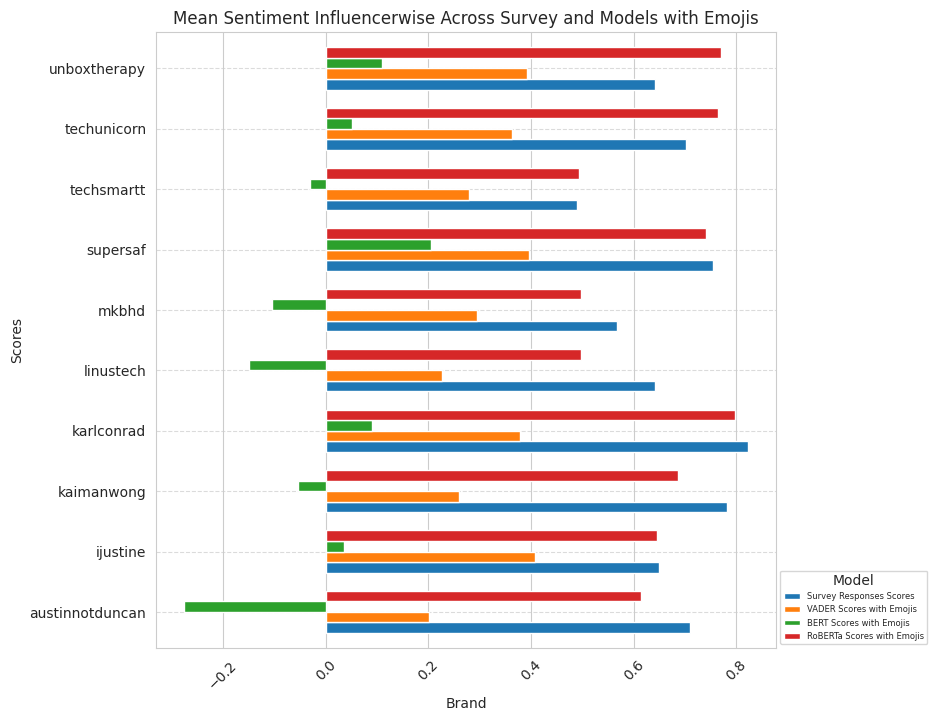

In [ ]:
# Select relevant columns
columns_of_interest = ['Brand', 'Survey Responses Scores', 'VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Create a copy of the DataFrame with selected columns
data_for_plot = survey_df[columns_of_interest].copy()

# Group the scores by brand and calculate the mean
grouped_data = data_for_plot.groupby('Brand').mean()

# Plot the grouped bar plot
grouped_data.plot(kind='barh',width=0.7, figsize=(8,8))
plt.title('Influencerwise Mean Sentiment in Survey and Models with Emojis')
plt.xlabel('Brand')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Model', prop={'size': 6},loc='lower left', bbox_to_anchor=(1, 0))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




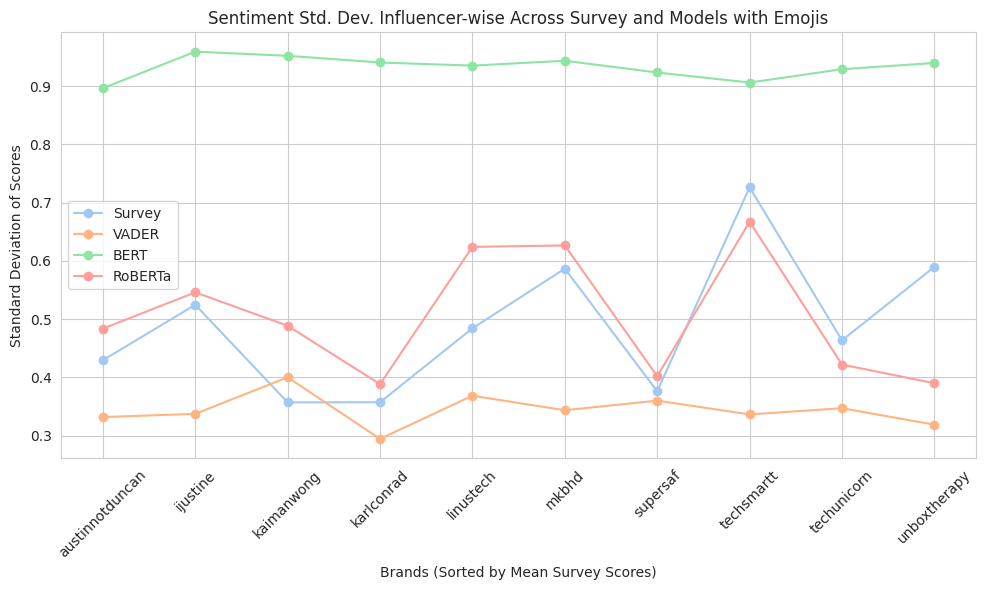

In [ ]:
# Select relevant columns
columns_of_interest = ['Brand', 'Survey Responses Scores', 'VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Create a copy of the DataFrame with selected columns
data_for_plot = survey_df[columns_of_interest].copy()

# Group the scores by brand and calculate the standard deviation
grouped_data = data_for_plot.groupby('Brand').std()

# Sort the grouped data by survey scores
sorted_grouped_data = grouped_data.loc[grouped_data.index.intersection(sorted_brands_ranked.index)]

# Set Seaborn style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Data for the line chart
brands = sorted_grouped_data.index.tolist()  # Brands sorted by survey scores
survey_std_dev = sorted_grouped_data['Survey Responses Scores'].tolist()
vader_std_dev = sorted_grouped_data['VADER Scores with Emojis'].tolist()
bert_std_dev = sorted_grouped_data['BERT Scores with Emojis'].tolist()
roberta_std_dev = sorted_grouped_data['RoBERTa Scores with Emojis'].tolist()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(brands, survey_std_dev, marker='o', label='Survey', color=palette[0])
plt.plot(brands, vader_std_dev, marker='o', label='VADER', color=palette[1])
plt.plot(brands, bert_std_dev, marker='o', label='BERT', color=palette[2])
plt.plot(brands, roberta_std_dev, marker='o', label='RoBERTa', color=palette[3])

# Adding labels and title
plt.xlabel('Brands (Sorted by Mean Survey Scores)')
plt.ylabel('Standard Deviation of Scores')
plt.title('Sentiment Std. Dev. Influencer-wise Across Survey and Models with Emojis')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()



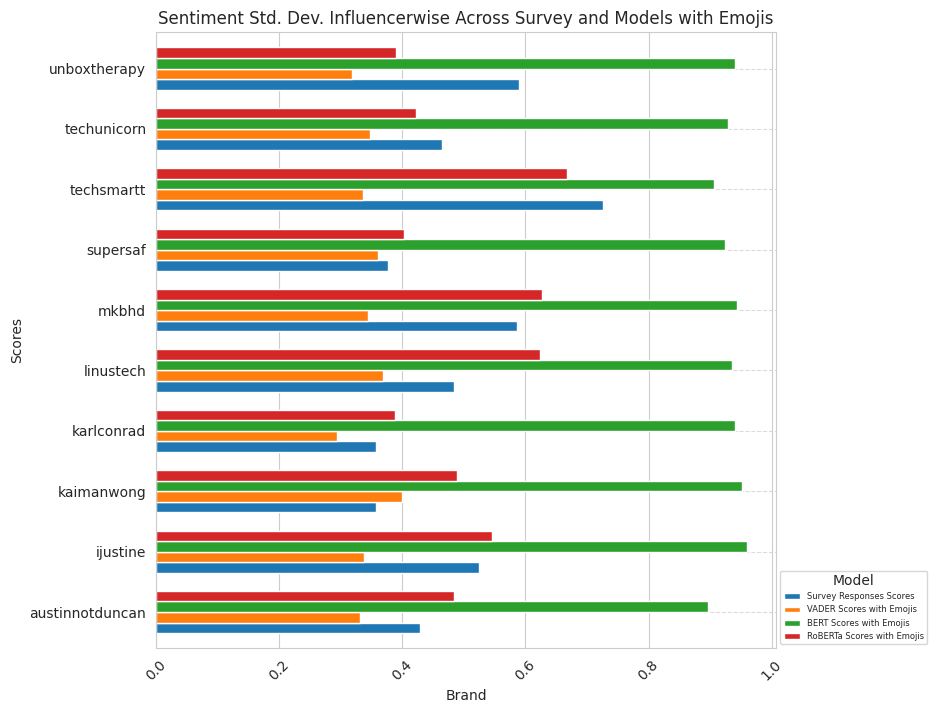

In [ ]:
# Select relevant columns
columns_of_interest = ['Brand', 'Survey Responses Scores', 'VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Create a copy of the DataFrame with selected columns
data_for_plot = survey_df[columns_of_interest].copy()

# Group the scores by brand and calculate the mean
grouped_data = data_for_plot.groupby('Brand').std()

# Plot the grouped bar plot
grouped_data.plot(kind='barh',width=0.7, figsize=(8,8))
plt.title('Sentiment Std. Dev. Influencerwise Across Survey and Models with Emojis')
plt.xlabel('Brand')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Model', prop={'size': 6},loc='lower left', bbox_to_anchor=(1, 0))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

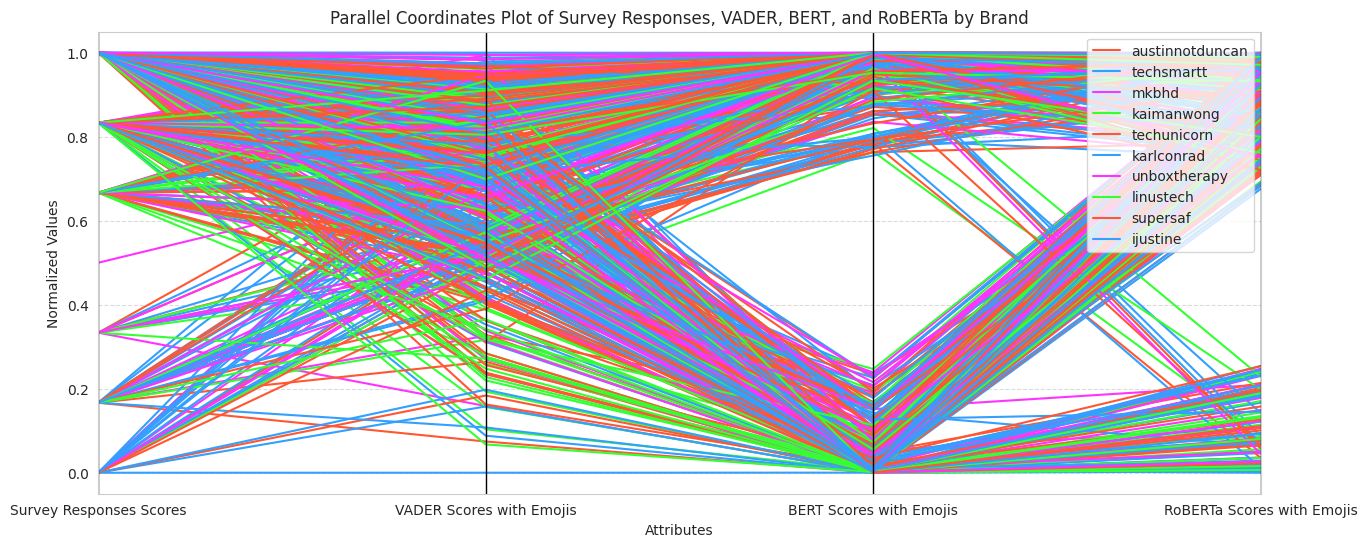

In [ ]:
# Select the columns of interest
columns_of_interest = ['Brand', 'Survey Responses Scores', 'VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Create a copy of the DataFrame with selected columns
data_for_plot = survey_df[columns_of_interest].copy()

# Normalize the data for better visualization (excluding the 'Brand' column)
data_for_plot_normalized = (data_for_plot.iloc[:, 1:] - data_for_plot.iloc[:, 1:].min()) / (data_for_plot.iloc[:, 1:].max() - data_for_plot.iloc[:, 1:].min())

# Merge the normalized data with the 'Brand' column
data_for_plot_normalized['Brand'] = data_for_plot['Brand']

# Plot the Parallel Coordinates Plot
plt.figure(figsize=(15, 6))
pd.plotting.parallel_coordinates(data_for_plot_normalized, 'Brand', color=('#FF5733', '#339FFF', '#FF33FF', '#33FF33'))
plt.title('Parallel Coordinates Plot of Survey Responses, VADER, BERT, and RoBERTa by Brand')
plt.xlabel('Attributes')
plt.ylabel('Normalized Values')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The purpose of this visualisation is to see how each model distributed scores. BERT tends to have high polarity in its distribution, while Roberta has positive skewness, VADER being the most balanced

#Influencer analysis using Model results

The dataset is cleaned and preprocessed

##Data Cleaning and Preperation

In [ ]:
comments_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Analysis/VADER_BERT_roBERTA.csv')
comments_df.columns

Index(['Unnamed: 0', 'Comment', 'Brand', 'Simple_Text', 'Emoji_Count',
       'Prep_Text', 'Bert_Label', 'Bert_Score', 'Simple_Bert_Label',
       'Simple_Bert_Score', 'roberta_Label', 'roberta_Score',
       'Simple_roBerta_Label', 'Simple_roBerta_Score', 'VADER_compound',
       'VADER_Score_emoji'],
      dtype='object')

In [ ]:
#Normalizing VADER scores
def normalize(score, alpha=15):
    """
    Normalize the score to be between -1 and 1 using an alpha that
    approximates the max expected value
    """
    norm_score = score / math.sqrt((score * score) + alpha)
    if norm_score < -1.0:
        return -1.0
    elif norm_score > 1.0:
        return 1.0
    else:
        return norm_score

# Apply the normalize function to the 'VADER_Score_emoji' column in sampled_df
comments_df['norm_VADER_Score_emoji'] = comments_df['VADER_Score_emoji'].apply(normalize)

In [ ]:
#make VADER_sentiment_emoji (Labels column for VADER score)
#make VADER_sentiment (Labels column for VADER score)

# For VADER_sentiment_emoji
comments_df['VADER_sentiment_emoji'] = comments_df['VADER_Score_emoji'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# For VADER_sentiment
comments_df['VADER_sentiment'] = comments_df['VADER_compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


In [ ]:
#remove empty/null rows from comments column
comments_df = comments_df.dropna(subset=['Comment'])

In [ ]:
# Rename columns in comments_df
comments_df = comments_df.rename(columns={

    'norm_VADER_Score_emoji': 'VADER Scores with Emojis',
    'Bert_Score': 'BERT Scores with Emojis',
    'roberta_Score': 'RoBERTa Scores with Emojis',

    'VADER_compound': 'VADER Scores without Emojis',
    'Simple_Bert_Score': 'BERT Scores without Emojis',
    'Simple_roBerta_Score': 'RoBERTa Scores without Emojis',

    'VADER_sentiment_emoji': 'VADER Labels with Emojis',
    'Bert_Label': 'BERT Labels with Emojis',
    'roberta_Label': 'RoBERTa Labels with Emojis',

    'VADER_sentiment': 'VADER Labels without Emojis',
    'Simple_Bert_Label': 'BERT Labels without Emojis',
    'Simple_roBerta_Label': 'RoBERTa Labels without Emojis'

})

comments_df.columns

Index(['Unnamed: 0', 'Comment', 'Brand', 'Simple_Text', 'Emoji_Count',
       'Prep_Text', 'BERT Labels with Emojis', 'BERT Scores with Emojis',
       'BERT Labels without Emojis', 'BERT Scores without Emojis',
       'RoBERTa Labels with Emojis', 'RoBERTa Scores with Emojis',
       'RoBERTa Labels without Emojis', 'RoBERTa Scores without Emojis',
       'VADER Scores without Emojis', 'VADER_Score_emoji',
       'VADER Scores with Emojis', 'VADER Labels with Emojis',
       'VADER Labels without Emojis'],
      dtype='object')

In [ ]:
comments_df

Unnamed: 0                                            Comment  \
1               1                                                  😬   
3               3                             Kool soundtrack there.   
4               4  @mkbhd You also added stereo to the reel. nice...   
5               5  his hairline has receded tho…not balding but h...   
6               6                                                🔥🔥🔥   
...           ...                                                ...   
9996         9996                         🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖   
9997         9997  Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...   
9998         9998              To broke but would get if u had money   
9999         9999                                                 *i   
10000       10000                              I like that merch man   

             Brand                                        Simple_Text  \
1            mkbhd                                                NaN   
3            mkbhd                             Kool soundtrack there.   
4            mkbhd  @mkbhd You also added stereo to the reel. nice...   
5            mkbhd  his hairline has receded tho…not balding but h...   
6            mkbhd                                                NaN   
...            ...                                                ...   
9996   techunicorn                                                NaN   
9997   techunicorn    Hi !! I LOVE youu  aku suka kamu , ndut gendut    
9998   techunicorn              To broke but would get if u had money   
9999   techunicorn                                                 *i   
10000  techunicorn                              I like that merch man   

       Emoji_Count                                          Prep_Text  \
1                1                                                      
3                0                             kool soundtrack there.   
4                0  @mkbhd you also added stereo to the reel. nice...   
5                0   his hairline has receded tho…not balding but ...   
6                3                                                NaN   
...            ...                                                ...   
9996            26                                                NaN   
9997             7  @techsmartt hi !! i love youu  aku suka kamu ,...   
9998             0              to broke but would get if u had money   
9999             0                                                 *i   
10000            0                              i like that merch man   

      BERT Labels with Emojis  BERT Scores with Emojis  \
1                    NEGATIVE                -0.697057   
3                    POSITIVE                 0.997034   
4                    POSITIVE                 0.998168   
5                    NEGATIVE                -0.940507   
6                    NEGATIVE                -0.697057   
...                       ...                      ...   
9996                 NEGATIVE                -0.697057   
9997                 POSITIVE                 0.998805   
9998                 NEGATIVE                -0.997196   
9999                 POSITIVE                 0.986794   
10000                POSITIVE                 0.999544   

      BERT Labels without Emojis  BERT Scores without Emojis  \
1                            NaN                         NaN   
3                       POSITIVE                    0.997034   
4                       POSITIVE                    0.998168   
5                       NEGATIVE                   -0.940507   
6                            NaN                         NaN   
...                          ...                         ...   
9996                         NaN                         NaN   
9997                    POSITIVE                    0.999005   
9998                    NEGATIVE                   -0.997196   
9999                    POSITIVE                   

##Data preprocessing

Check of dataset to analyse brand skewness and number of comments with emoji using Pie Charts: Emoji and Brand dist

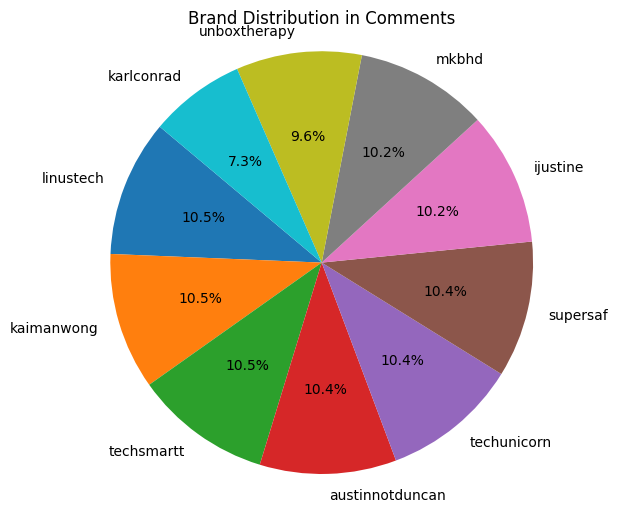

In [ ]:
# Count the occurrences of each brand
brand_counts = comments_df['Brand'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand Distribution in Comments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 2.9 MB/s eta 0:00:00


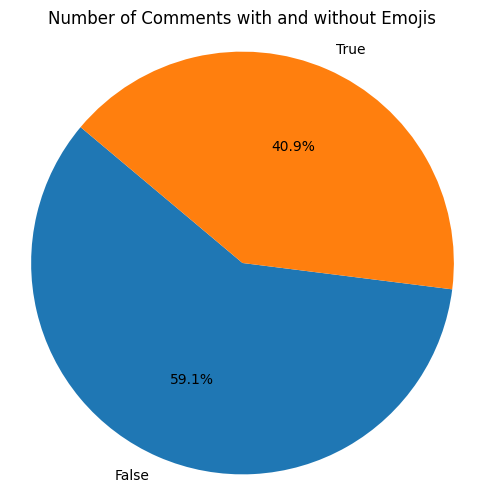

In [ ]:
# Function to check if a string contains emojis
def contains_emojis(text):
    return any(emoji.is_emoji(char) for char in text)

# Apply the function to each value in the "Comment" column
comments_df['Has_Emojis'] = comments_df['Comment'].apply(contains_emojis)

# Count the occurrences of comments with and without emojis
emojis_counts = comments_df['Has_Emojis'].value_counts()

# Plot the results in a pie chart
plt.figure(figsize=(6, 6))
plt.pie(emojis_counts, labels=emojis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Comments with and without Emojis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Analysing influencer performance based on models results with emojis

####Boxplots

In [ ]:
# Grouping by 'brands' column and calculating mean and standard deviation for VADER
brands_grouped_vader = comments_df.groupby('Brand')['VADER Scores with Emojis'].agg(['mean', 'std'])

# Sort brands based on highest mean value for VADER
brands_sorted_vader = brands_grouped_vader.sort_values(by=('mean'), ascending=False)

# Rename the index (brand) column
brands_sorted_vader = brands_sorted_vader.rename_axis('Influencer performance (VADER with Emojis)').reset_index()

In [ ]:
# Grouping by 'brands' column and calculating mean and standard deviation for BERT
brands_grouped_bert = comments_df.groupby('Brand')['BERT Scores with Emojis'].agg(['mean', 'std'])

# Sort brands based on highest mean value for VADER
brands_sorted_bert = brands_grouped_bert.sort_values(by=('mean'), ascending=False)

# Rename the index (brand) column
brands_sorted_bert = brands_sorted_bert.rename_axis('Influencer performance (BERT with Emojis)').reset_index()

In [ ]:
# Grouping by 'brands' column and calculating mean and standard deviation for BERT
brands_grouped_rob = comments_df.groupby('Brand')['RoBERTa Scores with Emojis'].agg(['mean', 'std'])

# Sort brands based on highest mean value for VADER
brands_sorted_rob = brands_grouped_rob.sort_values(by=('mean'), ascending=False)

# Rename the index (brand) column
brands_sorted_rob = brands_sorted_rob.rename_axis('Influencer performance (RoBERTa with Emojis)').reset_index()

In [ ]:
brands_sorted_df = pd.concat([brands_sorted_vader, brands_sorted_bert, brands_sorted_rob], axis=1)

brands_sorted_df

Influencer performance (VADER with Emojis)      mean       std  \
0                                   supersaf  0.330415  0.353857   
1                                 kaimanwong  0.280654  0.383731   
2                                   ijustine  0.277610  0.373223   
3                                techunicorn  0.261741  0.332133   
4                                 karlconrad  0.251223  0.312771   
5                               unboxtherapy  0.220298  0.335950   
6                                      mkbhd  0.172846  0.338384   
7                                 techsmartt  0.135107  0.314404   
8                            austinnotduncan  0.113537  0.324338   
9                                  linustech  0.091893  0.346313   

  Influencer performance (BERT with Emojis)      mean       std  \
0                                karlconrad  0.100765  0.918286   
1                                kaimanwong  0.062268  0.939593   
2                               techunicorn  0.033713  0.920909   
3                                  ijustine -0.073423  0.925621   
4                                  supersaf -0.077273  0.911572   
5                              unboxtherapy -0.138194  0.902999   
6                           austinnotduncan -0.185699  0.925302   
7                                techsmartt -0.188287  0.889405   
8                                     mkbhd -0.292335  0.879115   
9                                 linustech -0.325978  0.892342   

  Influencer performance (RoBERTa with Emojis)      mean       std  
0                                   karlconrad  0.740768  0.352442  
1                                   kaimanwong  0.675087  0.465144  
2                                     supersaf  0.639494  0.477782  
3                                  techunicorn  0.625027  0.482014  
4                                     ijustine  0.601859  0.572440  
5                                 unboxtherapy  0.573953  0.540521  
6                              austinnotduncan  0.537694  0.533134  
7                                   techsmartt  0.501565  0.599792  
8                                    linustech  0.467133  0.597173  
9                                        mkbhd  0.452369  0.597809

In [ ]:
# Reset index to move 'Brand' column back to regular column
brands_sorted_vader.reset_index(inplace=True)
brands_sorted_bert.reset_index(inplace=True)
brands_sorted_rob.reset_index(inplace=True)

brands_sorted_df = pd.concat([brands_sorted_vader, brands_sorted_bert, brands_sorted_rob], axis=1)

brands_sorted_df

index Influencer performance (VADER with Emojis)      mean       std  \
0      0                                   supersaf  0.330415  0.353857   
1      1                                 kaimanwong  0.280654  0.383731   
2      2                                   ijustine  0.277610  0.373223   
3      3                                techunicorn  0.261741  0.332133   
4      4                                 karlconrad  0.251223  0.312771   
5      5                               unboxtherapy  0.220298  0.335950   
6      6                                      mkbhd  0.172846  0.338384   
7      7                                 techsmartt  0.135107  0.314404   
8      8                            austinnotduncan  0.113537  0.324338   
9      9                                  linustech  0.091893  0.346313   

   index Influencer performance (BERT with Emojis)      mean       std  index  \
0      0                                karlconrad  0.100765  0.918286      0   
1      1                                kaimanwong  0.062268  0.939593      1   
2      2                               techunicorn  0.033713  0.920909      2   
3      3                                  ijustine -0.073423  0.925621      3   
4      4                                  supersaf -0.077273  0.911572      4   
5      5                              unboxtherapy -0.138194  0.902999      5   
6      6                           austinnotduncan -0.185699  0.925302      6   
7      7                                techsmartt -0.188287  0.889405      7   
8      8                                     mkbhd -0.292335  0.879115      8   
9      9                                 linustech -0.325978  0.892342      9   

  Influencer performance (RoBERTa with Emojis)      mean       std  
0                                   karlconrad  0.740768  0.352442  
1                                   kaimanwong  0.675087  0.465144  
2                                     supersaf  0.639494  0.477782  
3                                  techunicorn  0.625027  0.482014  
4                                     ijustine  0.601859  0.572440  
5                                 unboxtherapy  0.573953  0.540521  
6                              austinnotduncan  0.537694  0.533134  
7                                   techsmartt  0.501565  0.599792  
8                                    linustech  0.467133  0.597173  
9                                        mkbhd  0.452369  0.597809

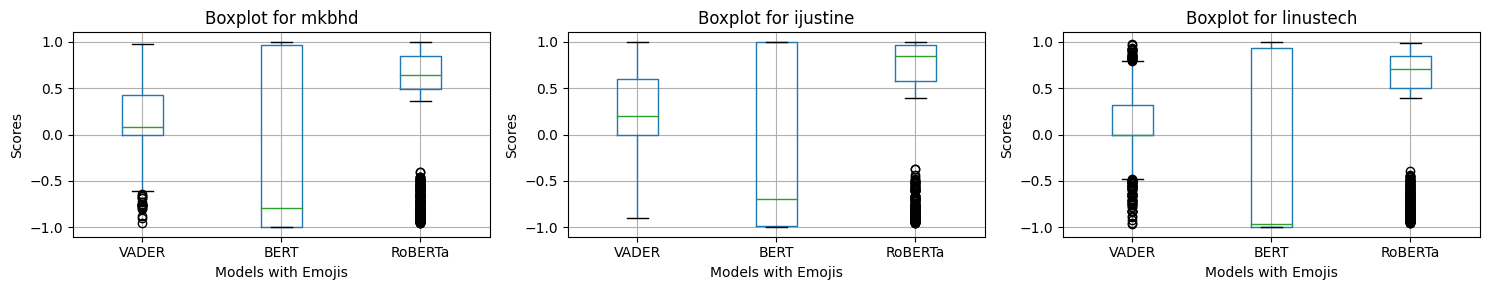

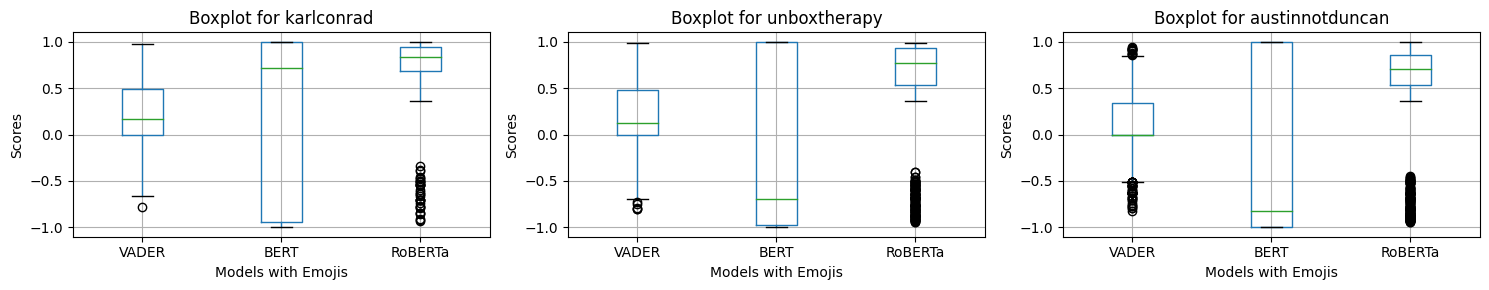

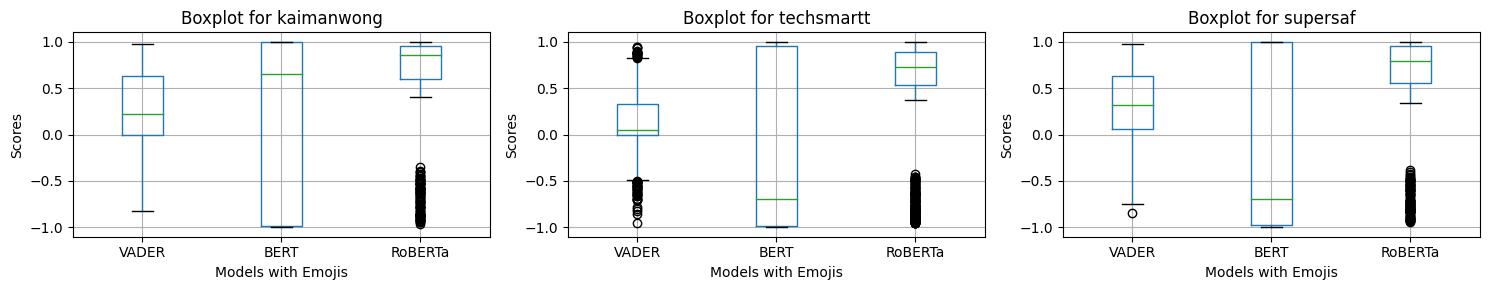

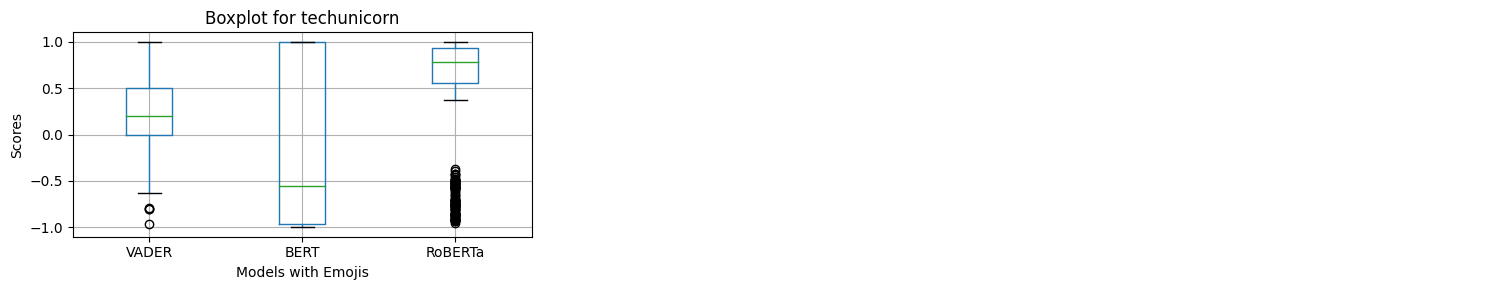

In [ ]:
# Define the columns for the boxplots
columns = ['VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Define the new labels for the x-axis
new_labels = ['VADER', 'BERT', 'RoBERTa']

# Get the unique brands
unique_brands = comments_df['Brand'].unique()

# Define the number of subplots for each layout
num_subplots = [3, 3, 3, 1]

# Initialize the index for accessing unique_brands
idx = 0

# Iterate over each set of subplots
for num in num_subplots:
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))

    # Iterate over each subplot
    for j in range(3):
        # Check if there are brands left to plot
        if idx < len(unique_brands):
            # Filter the dataframe for the current brand
            brand_data = comments_df[comments_df['Brand'] == unique_brands[idx]]

            # Create boxplots for the current brand
            ax = brand_data[columns].boxplot(ax=axes[j])

            # Set title and labels
            ax.set_title(f"Boxplot for {unique_brands[idx]}")
            ax.set_ylabel("Scores")
            ax.set_xlabel("Models with Emojis")

            # Rename the x-axis labels
            ax.set_xticklabels(new_labels)

            # Increment the index
            idx += 1
        else:
            # Hide the empty subplot
            axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()

    plt.show()


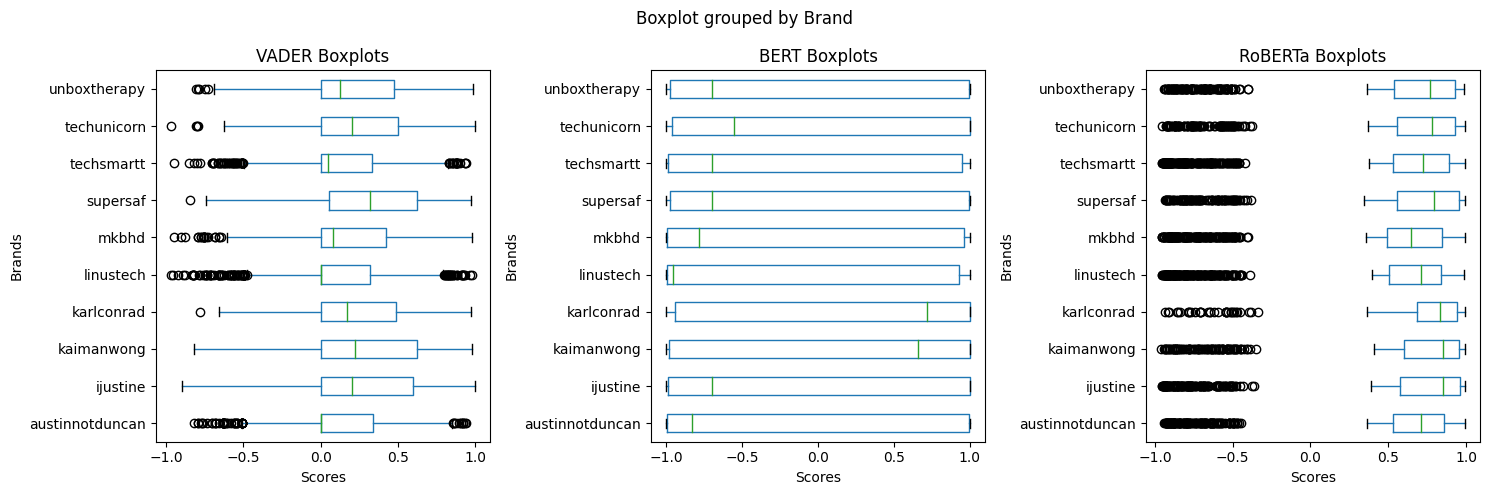

In [ ]:
# Define the columns for the boxplots
columns = ['VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Define the models
models = ['VADER', 'BERT', 'RoBERTa']

# Create subplots for each model
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

# Iterate over each model
for i, model in enumerate(models):
    # Filter the dataframe for the current model's scores
    model_scores = comments_df[columns[i]]

    # Create a DataFrame with model scores and brand names
    df = pd.DataFrame({'Brand': comments_df['Brand'], 'Score': model_scores})

    # Create boxplots for the current model
    df.boxplot(column='Score', by='Brand', ax=axes[i], grid=False, vert=False)

    # Set title and labels
    axes[i].set_title(f"{model} Boxplots")
    axes[i].set_xlabel("Scores")
    axes[i].set_ylabel("Brands")

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='y', rotation=0)

# Adjust layout
plt.tight_layout()

plt.show()

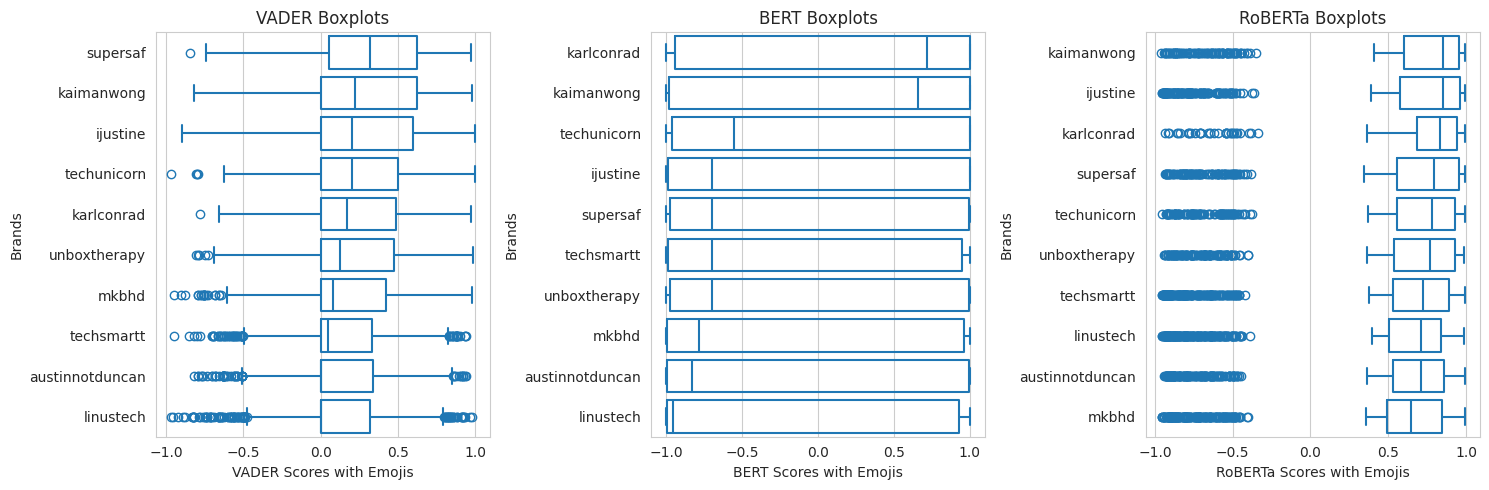

In [ ]:
# Define the columns for the boxplots
columns = ['VADER Scores with Emojis', 'BERT Scores with Emojis', 'RoBERTa Scores with Emojis']

# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots for each model
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

# Iterate over each column
for i, column in enumerate(columns):
    # Calculate the median values for each brand and column
    median_values = comments_df.groupby('Brand')[column].median()

    # Sort the dataframe based on the median values for the specified column
    median_values_sorted = median_values.sort_values(ascending=False)
    comments_df_sorted = comments_df.set_index('Brand').loc[median_values_sorted.index]

    # Create the boxplot with explicitly setting the order of y-axis labels
    sns.boxplot(y=comments_df_sorted.index, x=column, data=comments_df_sorted, orient='h', order=comments_df_sorted.index, fill=None, ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"{column.split()[0]} Boxplots")
    axes[i].set_xlabel(f"{column}")
    axes[i].set_ylabel("Brands")

    # Rotate y-axis labels for better readability
    axes[i].tick_params(axis='y', rotation=0)

# Adjust layout
plt.tight_layout()

plt.show()


#### Barcharts

In [ ]:
comments_df.columns

Index(['Unnamed: 0', 'Comment', 'Brand', 'Simple_Text', 'Emoji_Count',
       'Prep_Text', 'Bert_Label', 'Bert_Score', 'Simple_Bert_Label',
       'Simple_Bert_Score', 'roberta_Label', 'roberta_Score',
       'Simple_roBerta_Label', 'Simple_roBerta_Score', 'VADER_compound',
       'VADER_Score_emoji'],
      dtype='object')

<ipython-input-19-b4fd1cd81bd5>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = comments_df.groupby('Brand').mean()


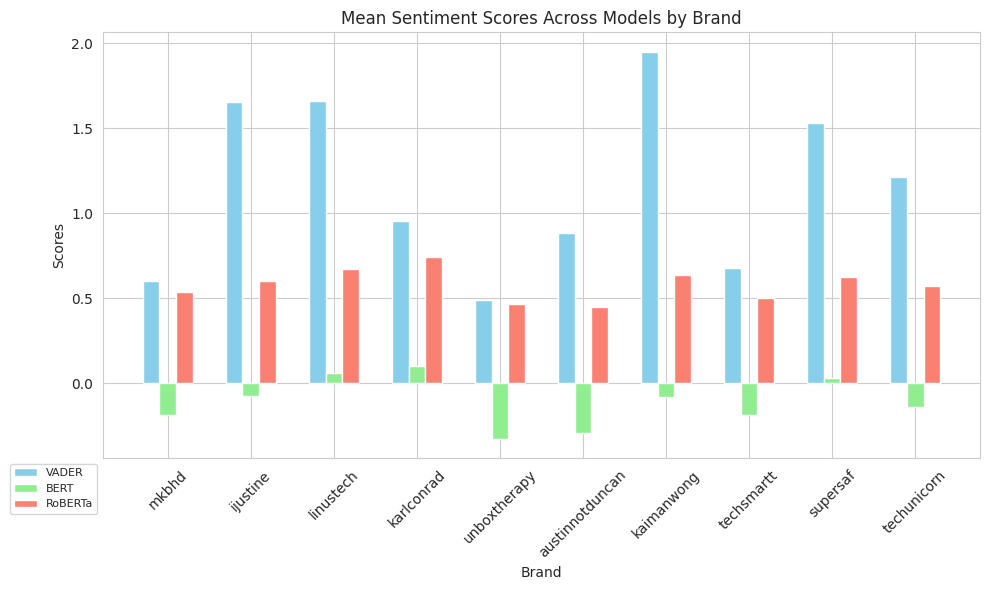

In [ ]:
# Set the colors for each model
colors = ['skyblue', 'lightgreen', 'salmon']

# Set the width of the bars
bar_width = 0.2

# Get unique brand values
brands = comments_df['Brand'].unique()

# Calculate the mean scores for each brand
mean_scores = comments_df.groupby('Brand').mean()

# Set the positions of the bars on the x-axis
r = range(len(brands))

plt.figure(figsize=(10, 6))

# Plot the bars for each model and brand
for i, model in enumerate(['VADER_Score_emoji', 'Bert_Score', 'roberta_Score']):
    plt.bar([x + bar_width * i for x in r], mean_scores[model],
            width=bar_width, color=colors[i], label=model)

# Add labels and title
plt.xlabel('Brand', fontweight='light')
plt.ylabel('Scores', fontweight='light')
plt.title('Mean Sentiment Scores Across Models by Brand', fontweight='light')
plt.xticks([r + bar_width for r in range(len(brands))], brands, rotation=45)
plt.legend(labels=['VADER', 'BERT', 'RoBERTa'], bbox_to_anchor=(0, 0), prop={'size': 8})
plt.tight_layout()
plt.show()

In [ ]:
mean_scores

Unnamed: 0  Emoji_Count  Bert_Score  Simple_Bert_Score  \
Brand                                                                     
austinnotduncan      5499.5     0.458000   -0.185699          -0.116094   
ijustine             1499.5     1.156000   -0.073423           0.132006   
kaimanwong           6499.5     0.719000    0.062268           0.184544   
karlconrad           3499.5     0.575000    0.100765           0.251469   
linustech            2499.5     0.394000   -0.325978          -0.286242   
mkbhd                 499.5     0.797000   -0.292335          -0.183782   
supersaf             8499.5     1.649000   -0.077273           0.160667   
techsmartt           7499.5     1.076000   -0.188287          -0.013648   
techunicorn          9500.0     1.015984    0.033713           0.208703   
unboxtherapy         4499.5     0.865000   -0.138194           0.030465   

                 roberta_Score  Simple_roBerta_Score  VADER_compound  \
Brand                                                                  
austinnotduncan       0.537694              0.536041        0.087669   
ijustine              0.601859              0.554706        0.194320   
kaimanwong            0.675087              0.650055        0.235684   
karlconrad            0.740768              0.688148        0.132751   
linustech             0.467133              0.470597        0.068734   
mkbhd                 0.452369              0.456084        0.122044   
supersaf              0.639494              0.601163        0.225819   
techsmartt            0.501565              0.462310        0.067298   
techunicorn           0.625027              0.575800        0.201542   
unboxtherapy          0.573953              0.538409        0.146913   

                 VADER_Score_emoji  
Brand                               
austinnotduncan           0.603596  
ijustine                  1.655030  
kaimanwong                1.663649  
karlconrad                0.955203  
linustech                 0.488902  
mkbhd                     0.884261  
supersaf                  1.950634  
techsmartt                0.678324  
techunicorn               1.533796  
unboxtherapy              1.212012

<ipython-input-9-c4c5629bb9dc>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = comments_df.groupby('Brand').mean()


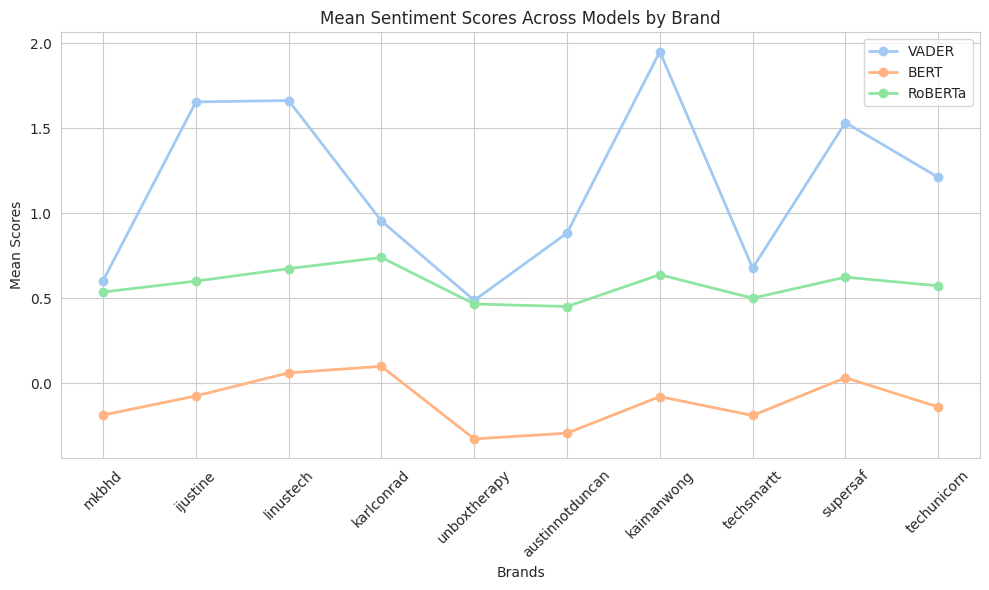

In [ ]:
# Set the colors for each model
colors = [palette[0], palette[1], palette[2]]

# Set the width of the lines
line_width = 2

# Get unique brand values
brands = comments_df['Brand'].unique()

# Calculate the mean scores for each brand
mean_scores = comments_df.groupby('Brand').mean()

# Data for the line chart
vader_scores = mean_scores['VADER_Score_emoji'].tolist()
bert_scores = mean_scores['Bert_Score'].tolist()
roberta_scores = mean_scores['roberta_Score'].tolist()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(brands, vader_scores, marker='o', label='VADER', color=colors[0], linewidth=line_width)
plt.plot(brands, bert_scores, marker='o', label='BERT', color=colors[1], linewidth=line_width)
plt.plot(brands, roberta_scores, marker='o', label='RoBERTa', color=colors[2], linewidth=line_width)

# Adding labels and title
plt.xlabel('Brands')
plt.ylabel('Mean Scores')
plt.title('Mean Sentiment Scores Across Models by Brand')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()


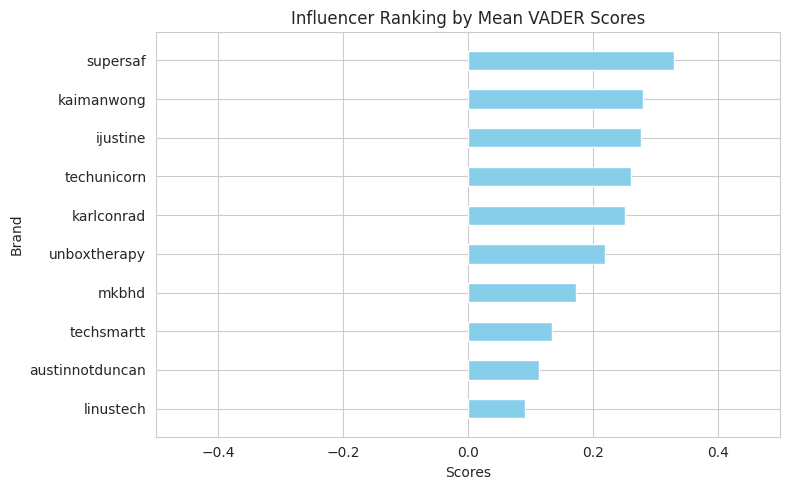

In [ ]:
# Get unique brand values and calculate mean scores for each brand
mean_scores = comments_df.groupby('Brand')['VADER Scores with Emojis'].mean().sort_values(ascending=True)

# Plot the horizontal bars
plt.figure(figsize=(8, len(mean_scores) * 0.5))  # Adjust figure size based on the number of brands
plt.barh(mean_scores.index, mean_scores, color='skyblue', height=0.5)
plt.xlim(-0.5,0.5)
# Add labels and title
plt.xlabel('Scores', fontweight='light')
plt.ylabel('Brand', fontweight='light')
plt.title('Influencer Ranking by Mean VADER Scores', fontweight='light')
plt.tight_layout()
plt.show()


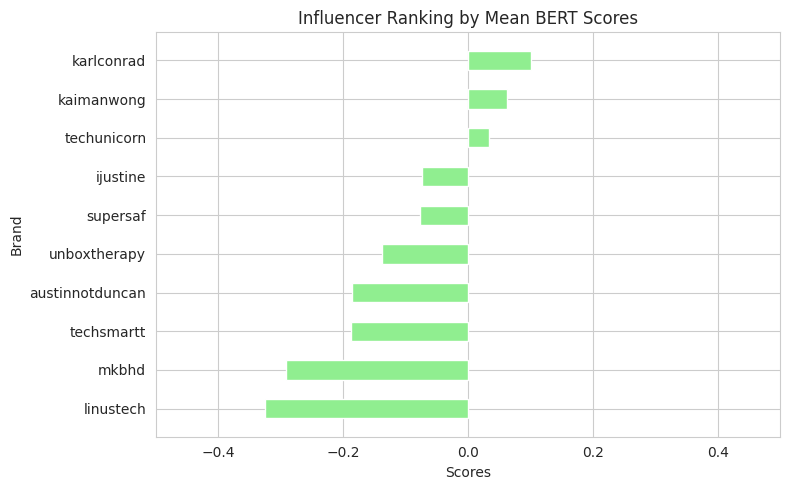

In [ ]:
# Get unique brand values and calculate mean scores for each brand
mean_scores = comments_df.groupby('Brand')['BERT Scores with Emojis'].mean().sort_values(ascending=True)

# Plot the horizontal bars
plt.figure(figsize=(8, len(mean_scores) * 0.5))  # Adjust figure size based on the number of brands
plt.barh(mean_scores.index, mean_scores, color='lightgreen', height=0.5)
plt.xlim(-0.5,0.5)
# Add labels and title
plt.xlabel('Scores', fontweight='light')
plt.ylabel('Brand', fontweight='light')
plt.title('Influencer Ranking by Mean BERT Scores', fontweight='light')

plt.tight_layout()
plt.show()


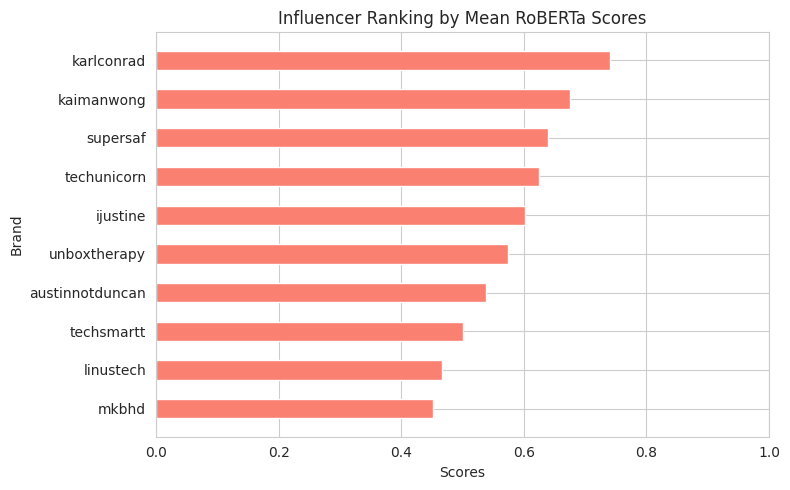

In [ ]:
# Get unique brand values and calculate mean scores for each brand
mean_scores = comments_df.groupby('Brand')['RoBERTa Scores with Emojis'].mean().sort_values(ascending=True)

# Plot the horizontal bars
plt.figure(figsize=(8, len(mean_scores) * 0.5))  # Adjust figure size based on the number of brands
plt.barh(mean_scores.index, mean_scores, color='salmon', height=0.5)
plt.xlim(0,1)
# Add labels and title
plt.xlabel('Scores', fontweight='light')
plt.ylabel('Brand', fontweight='light')
plt.title('Influencer Ranking by Mean RoBERTa Scores', fontweight='light')

plt.tight_layout()
plt.show()

In [ ]:
# Group the data by 'Brand' and calculate the standard deviation for each group
brand_std_dev = comments_df.groupby('Brand').std()

# Display the standard deviation of sentiment scores for each brand
brand_std_dev.head()

<ipython-input-20-b67a78fdafc6>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brand_std_dev = comments_df.groupby('Brand').std()


Unnamed: 0  Emoji_Count  Bert_Score  Simple_Bert_Score  \
Brand                                                                     
austinnotduncan  288.819436     1.013540    0.925302           0.951792   
ijustine         288.819436     3.136160    0.925621           0.965384   
kaimanwong       288.819436     1.174486    0.939593           0.945709   
karlconrad       288.819436     1.173777    0.918286           0.925879   
linustech        288.819436     1.020689    0.892342           0.917874   

                 roberta_Score  Simple_roBerta_Score  VADER_compound  \
Brand                                                                  
austinnotduncan       0.533134              0.537428        0.318660   
ijustine              0.572440              0.590534        0.361190   
kaimanwong            0.465144              0.481813        0.386783   
karlconrad            0.352442              0.368105        0.274973   
linustech             0.597173              0.594902        0.340367   

                 VADER_Score_emoji  
Brand                               
austinnotduncan           1.829190  
ijustine                  3.370873  
kaimanwong                2.646951  
karlconrad                1.891668  
linustech                 2.166009

<ipython-input-22-7c0d4fc58563>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brand_std_dev = comments_df.groupby('Brand').std()


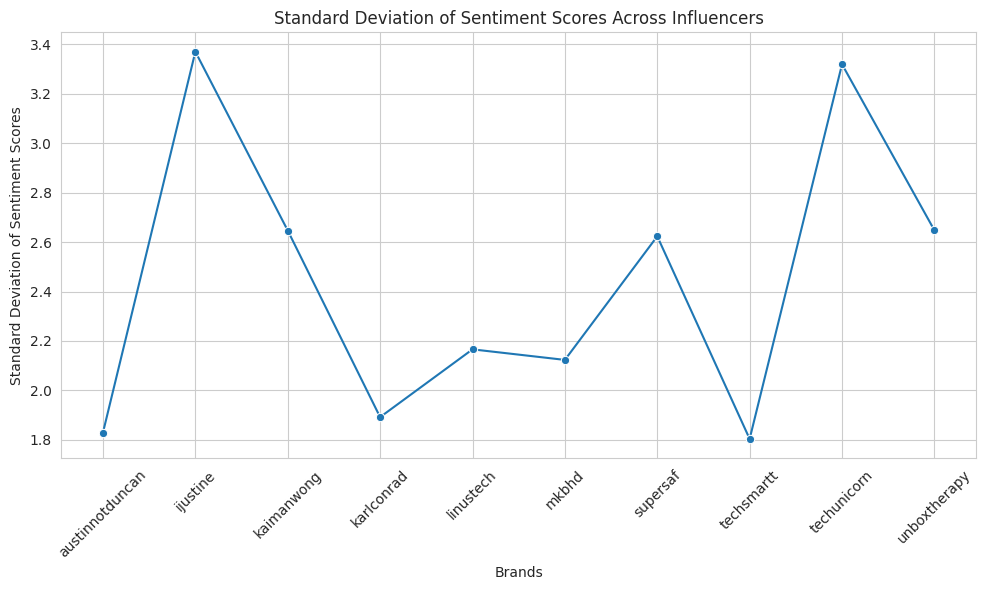

In [ ]:
# Group the data by 'Brand' and calculate the standard deviation for each group
brand_std_dev = comments_df.groupby('Brand').std()

# Reset the index to make 'Brand' a column instead of an index
brand_std_dev = brand_std_dev.reset_index()

# Set Seaborn style
sns.set_style("whitegrid")

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=brand_std_dev, x='Brand', y='VADER_Score_emoji', marker='o')

# Adding labels and title
plt.xlabel('Brands')
plt.ylabel('Standard Deviation of Sentiment Scores')
plt.title('Standard Deviation of Sentiment Scores Across Influencers')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-28-84bbd13d69be>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brand_std_dev = comments_df.groupby('Brand').std()
<ipython-input-28-84bbd13d69be>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=brand_std_dev, x='Brand', y=column, marker='o', label=column, palette=palette)
<ipython-input-28-84bbd13d69be>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=brand_std_dev, x='Brand', y=column, marker='o', label=column, palette=palette)
<ipython-input-28-84bbd13d69be>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=brand_std_dev, x='Brand', y=column, marker='o', label=column, palette=palette)


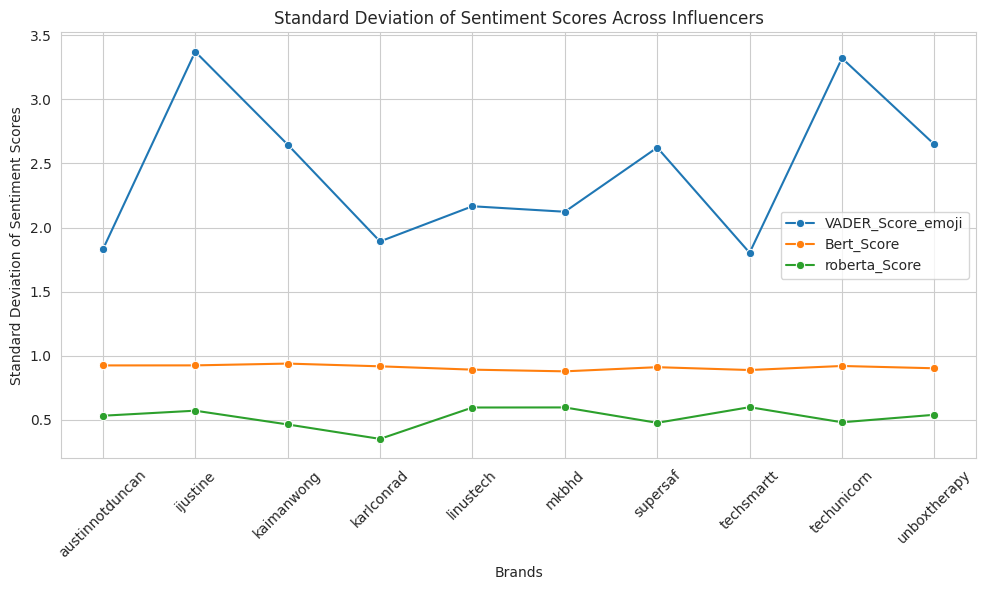

In [ ]:
# Group the data by 'Brand' and calculate the standard deviation for each group
brand_std_dev = comments_df.groupby('Brand').std()

# Reset the index to make 'Brand' a column instead of an index
brand_std_dev = brand_std_dev.reset_index()

# Set Seaborn style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Specify the columns you want to plot
columns_to_plot = ['VADER_Score_emoji', 'Bert_Score', 'roberta_Score']

# Loop through each column and plot it
for column in columns_to_plot:
    sns.lineplot(data=brand_std_dev, x='Brand', y=column, marker='o', label=column, palette=palette)

# Adding labels and title
plt.xlabel('Brands')
plt.ylabel('Standard Deviation of Sentiment Scores')
plt.title('Standard Deviation of Sentiment Scores Across Influencers')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.legend()
plt.show()


###Analysing influencer performance model results without emojis

####Boxplots

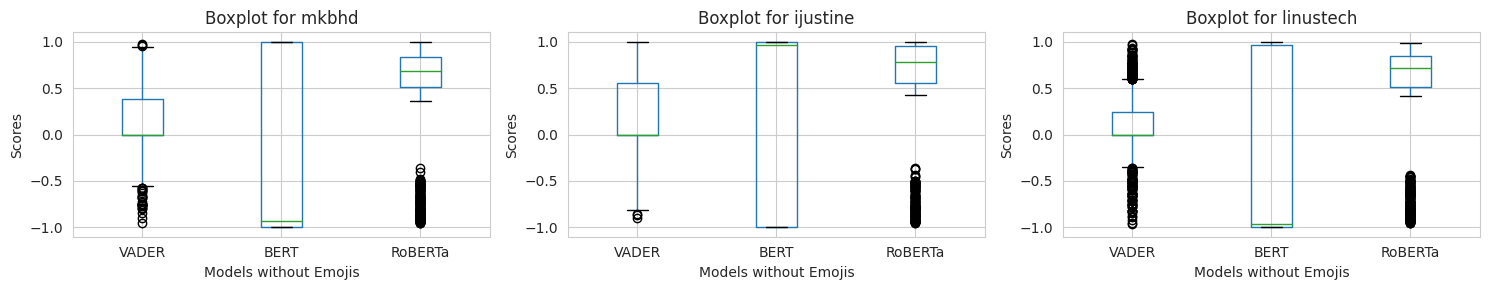

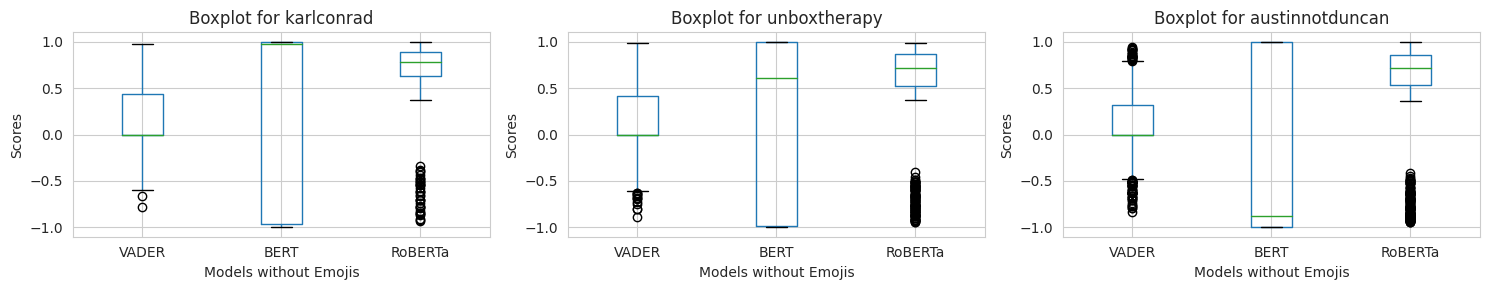

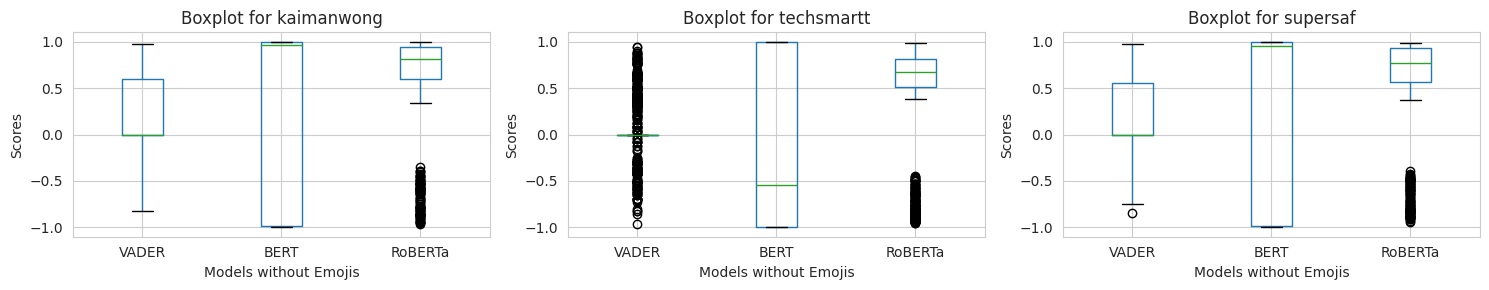

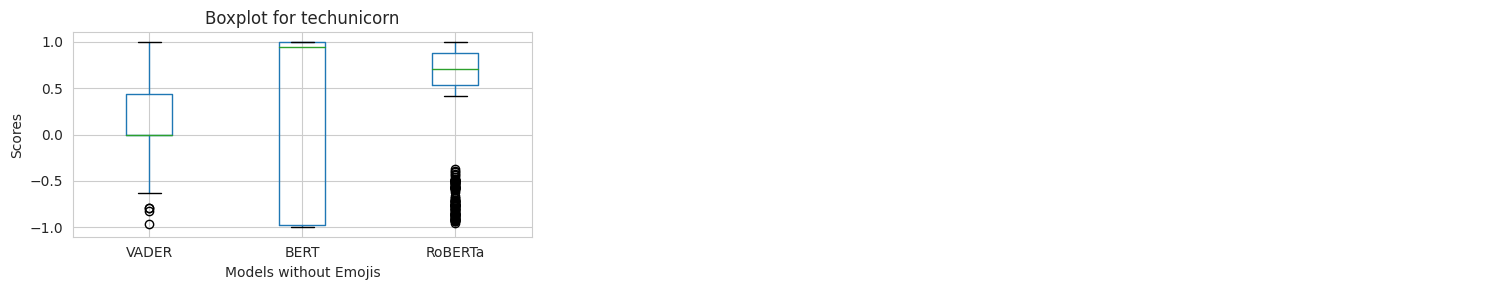

In [ ]:
# Define the columns for the boxplots
columns = ['VADER Scores without Emojis', 'BERT Scores without Emojis', 'RoBERTa Scores without Emojis']

# Define the new labels for the x-axis
new_labels = ['VADER', 'BERT', 'RoBERTa']

# Get the unique brands
unique_brands = comments_df['Brand'].unique()

# Define the number of subplots for each layout
num_subplots = [3, 3, 3, 1]

# Initialize the index for accessing unique_brands
idx = 0

# Iterate over each set of subplots
for num in num_subplots:
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))

    # Iterate over each subplot
    for j in range(3):
        # Check if there are brands left to plot
        if idx < len(unique_brands):
            # Filter the dataframe for the current brand
            brand_data = comments_df[comments_df['Brand'] == unique_brands[idx]]

            # Create boxplots for the current brand
            ax = brand_data[columns].boxplot(ax=axes[j])

            # Set title and labels
            ax.set_title(f"Boxplot for {unique_brands[idx]}")
            ax.set_ylabel("Scores")
            ax.set_xlabel("Models without Emojis")

            # Rename the x-axis labels
            ax.set_xticklabels(new_labels)

            # Increment the index
            idx += 1
        else:
            # Hide the empty subplot
            axes[j].axis('off')


    plt.tight_layout()
    plt.show()

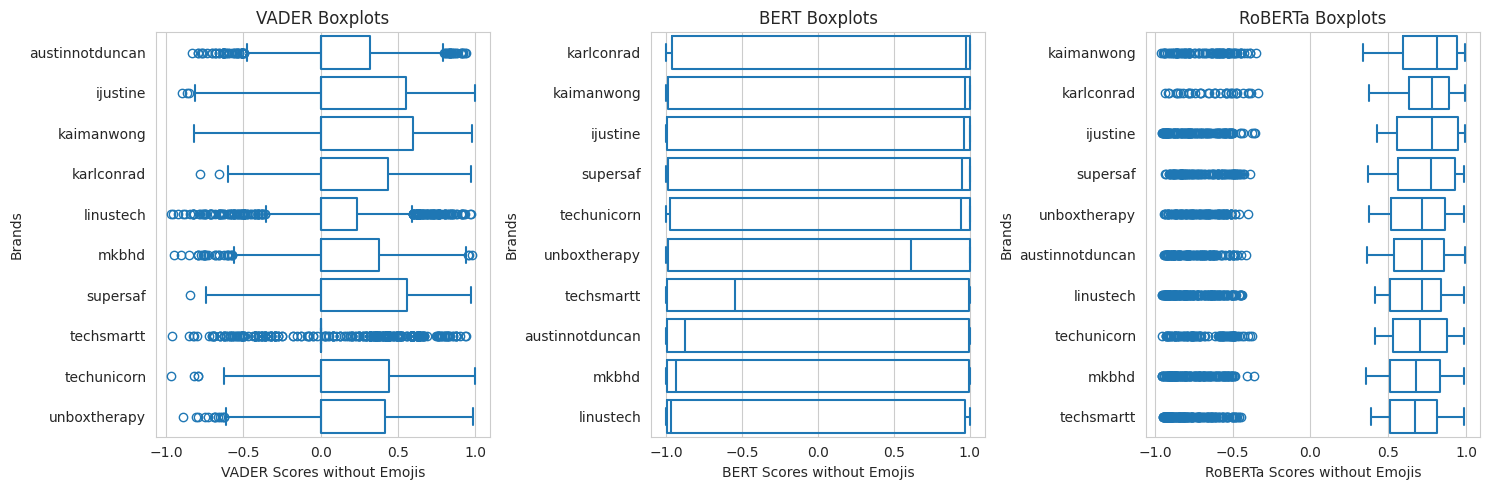

In [ ]:
# Define the columns for the boxplots
columns = ['VADER Scores without Emojis', 'BERT Scores without Emojis', 'RoBERTa Scores without Emojis']

# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots for each model
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

# Iterate over each column
for i, column in enumerate(columns):
    # Calculate the median values for each brand and column
    median_values = comments_df.groupby('Brand')[column].median()

    # Sort the dataframe based on the median values for the specified column
    median_values_sorted = median_values.sort_values(ascending=False)
    comments_df_sorted = comments_df.set_index('Brand').loc[median_values_sorted.index]

    # Reset the index to default integer index
    comments_df_sorted = comments_df_sorted.reset_index()

    # Add a unique identifier for each brand
    comments_df_sorted['Brand_ID'] = comments_df_sorted.groupby('Brand').ngroup()

    # Create the boxplot with explicitly setting the order of y-axis labels
    sns.boxplot(y='Brand', x=column, data=comments_df_sorted, orient='h', order=comments_df_sorted['Brand'], fill=None, ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"{column.split()[0]} Boxplots")
    axes[i].set_xlabel(f"{column}")
    axes[i].set_ylabel("Brands")

    # Rotate y-axis labels for better readability
    axes[i].tick_params(axis='y', rotation=0)


plt.tight_layout()
plt.show()



#### Barcharts

<ipython-input-42-a3e7d1c3fd7b>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = comments_df.groupby('Brand').mean()


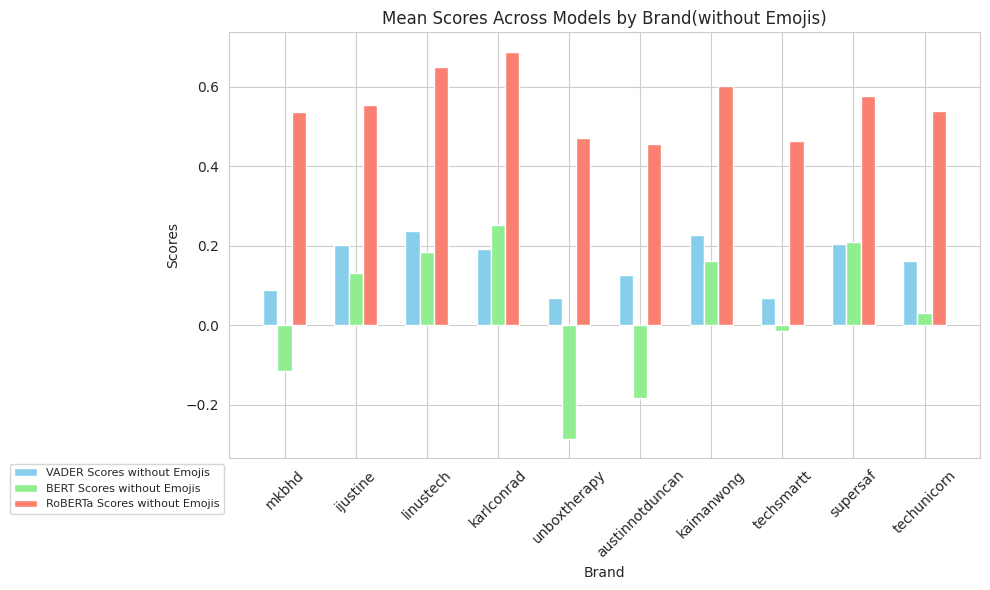

In [ ]:
# Set the colors for each model
colors = ['skyblue', 'lightgreen', 'salmon']

# Set the width of the bars
bar_width = 0.2

# Get unique brand values
brands = comments_df['Brand'].unique()

# Calculate the mean scores for each brand
mean_scores = comments_df.groupby('Brand').mean()

# Set the positions of the bars on the x-axis
r = range(len(brands))

plt.figure(figsize=(10, 6))

# Plot the bars for each model and brand
for i, model in enumerate(['VADER Scores without Emojis', 'BERT Scores without Emojis', 'RoBERTa Scores without Emojis']):
    plt.bar([x + bar_width * i for x in r], mean_scores[model],
            width=bar_width, color=colors[i], label=model,)

# Add labels and title
plt.xlabel('Brand', fontweight='light')
plt.ylabel('Scores', fontweight='light')
plt.title('Mean Scores Across Models by Brand(without Emojis)', fontweight='light')
plt.xticks([r + bar_width for r in range(len(brands))], brands, rotation=45)
plt.legend(bbox_to_anchor=(0, 0), prop={'size': 8})
plt.tight_layout()
plt.show()

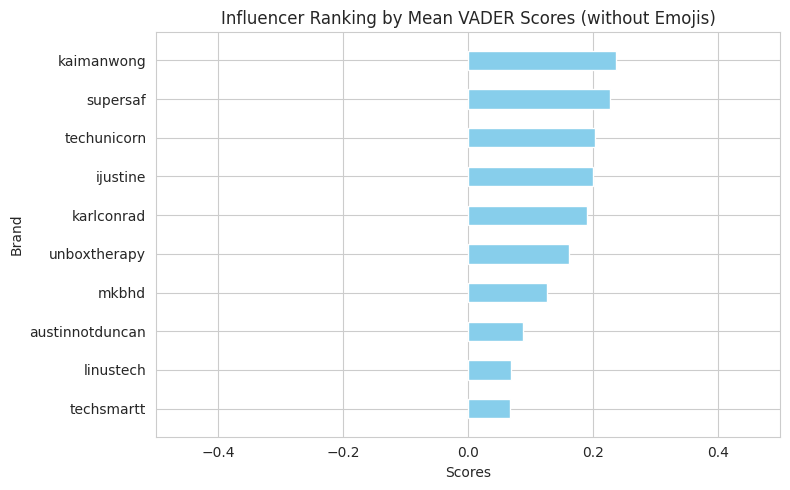

In [ ]:
# Brands ranking VADER Scores

# Get unique brand values and calculate mean scores for each brand
mean_scores = comments_df.groupby('Brand')['VADER Scores without Emojis'].mean().sort_values(ascending=True)

# Plot the horizontal bars
plt.figure(figsize=(8, len(mean_scores) * 0.5))  # Adjust figure size based on the number of brands
plt.barh(mean_scores.index, mean_scores, color='skyblue', height=0.5)
plt.xlim(-0.5,0.5)
# Add labels and title
plt.xlabel('Scores', fontweight='light')
plt.ylabel('Brand', fontweight='light')
plt.title('Influencer Ranking by Mean VADER Scores (without Emojis)', fontweight='light')
plt.tight_layout()
plt.show()


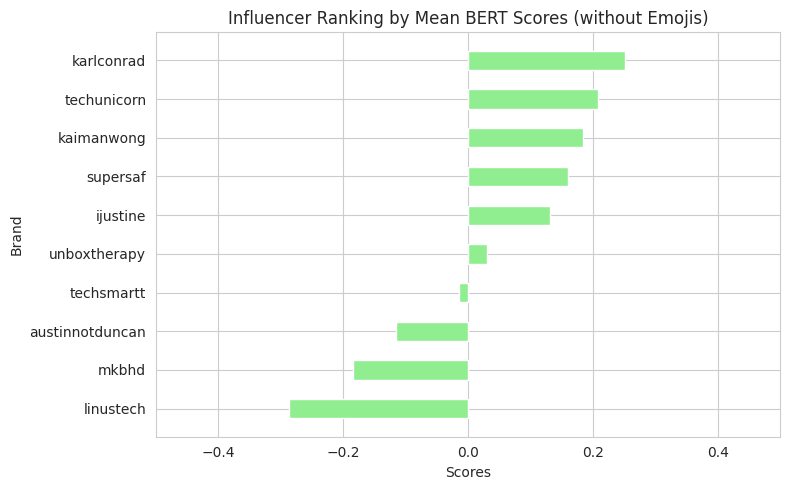

In [ ]:
# Brands ranking VADER Scores
# Get unique brand values and calculate mean scores for each brand
mean_scores = comments_df.groupby('Brand')['BERT Scores without Emojis'].mean().sort_values(ascending=True)

# Plot the horizontal bars
plt.figure(figsize=(8, len(mean_scores) * 0.5))  # Adjust figure size based on the number of brands
plt.barh(mean_scores.index, mean_scores, color='lightgreen', height=0.5)
plt.xlim(-0.5,0.5)
# Add labels and title
plt.xlabel('Scores', fontweight='light')
plt.ylabel('Brand', fontweight='light')
plt.title('Influencer Ranking by Mean BERT Scores (without Emojis)', fontweight='light')

plt.tight_layout()
plt.show()

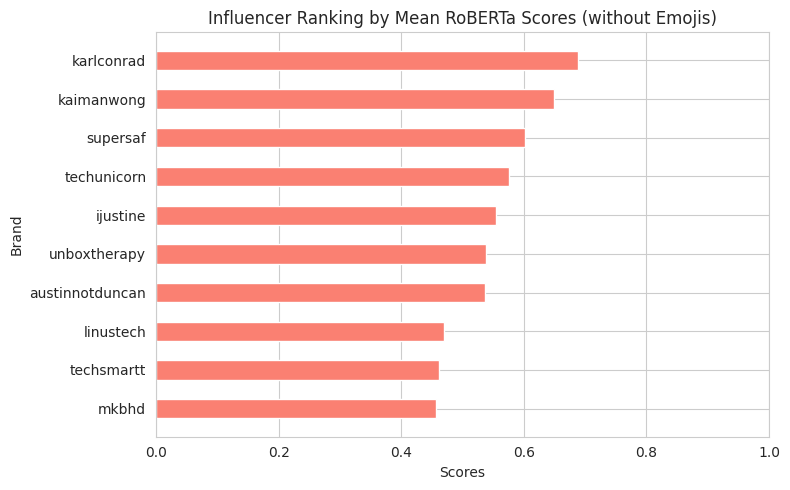

In [ ]:
# Get unique brand values and calculate mean scores for each brand
mean_scores = comments_df.groupby('Brand')['RoBERTa Scores without Emojis'].mean().sort_values(ascending=True)

# Plot the horizontal bars
plt.figure(figsize=(8, len(mean_scores) * 0.5))  # Adjust figure size based on the number of brands
plt.barh(mean_scores.index, mean_scores, color='salmon', height=0.5)
plt.xlim(0,1)
# Add labels and title
plt.xlabel('Scores', fontweight='light')
plt.ylabel('Brand', fontweight='light')
plt.title('Influencer Ranking by Mean RoBERTa Scores (without Emojis)', fontweight='light')

plt.tight_layout()
plt.show()